# Exploratory Data Analysis on Credit Data

## Business Understanding
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample

All other cases: All other cases when the payment is paid on time.

## Business Objective

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

## Goals of the case study

- Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)
- Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

- Identify if there is data imbalance in the data. Find the ratio of data imbalance.
- Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

- Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable).
- Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases. 

### Importing the libraries

In [2]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the datasets

In [4]:
# let's load the application data from csv files

application = pd.read_csv("application_data.csv")

# see first five rows of the dataset using head function

application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
# Let's load the previous application data from csv file

previous_appln = pd.read_csv("previous_application.csv")

# see first five rows of the dataset

previous_appln.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [6]:
# to display all the rows of the datasets

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

### shape of data

In [7]:
# calculate the shape of application data

shape_appln = application.shape
shape_appln

(307511, 122)

In [8]:
# calculate the shape of previous application

shape_previous_appln = previous_appln.shape
shape_previous_appln

(1670214, 37)

### Column Reading

In [9]:

# see the columns of application data

application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

In [10]:
# see the columns of the previous application data

previous_appln.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

### Information of Variables

In [11]:
# print the information of the variables of application datasets
# verbose will show all the variables

application.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [12]:
# calculate the info of the previous application table

previous_appln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Describe

In [13]:
# Calculate the statistical details of application data by describe function

application.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

In [14]:
# calculate the statistical details of previous application data by describe function

previous_appln.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

### Data Types

In [15]:
# print data types of variables in application dataframe

application.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [16]:
# print data types variables in of previous application dataframe

previous_appln.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

## Null_Percentage 

In [17]:
# Calculate null values percentage of application data

percent_null_values = application.isnull().sum()/len(application)*100
percent_null_values

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### Dropping the columns which have null values more than or equal to 40%

In [18]:
#lets get the columns which have null values more than 40 percent

null_cols = percent_null_values.sort_values(ascending = False).head(49)
null_cols

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [19]:
# print number of columns which have more than 40% null values

null_cols.count()

49

In [20]:
# print name of columns which have more than 40% null values
null_cols.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE',
       'EMERGE

In [21]:
# drop the null_cols which have more than 40% null values

application.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE'], axis = 1 , inplace = True)

In [22]:
# check null percentage of remaining columns after dropping

null= application.isnull().sum()/len(application)*100
null.sort_values(ascending = False).head(30)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


Check the columns dropped or not

In [23]:
# check shape after dropping the columns

application.shape

(307511, 73)

## Handling Missing Values

In [23]:
# Null percentage of remaining columns in the dataframe

(application.isnull().sum()/len(application)*100).sort_values(ascending = False).head(70)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

####  OCCUPATION_TYPE

In [24]:
# get the value counts of occupation 

application.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [25]:
# print total null values in occupation

application.OCCUPATION_TYPE.isnull().sum()

96391

as we can't impute missing values with mode and we also can't predict someone's occupation so here lets fill them with "UNKNOWN"

In [26]:
# fill null values with UNKNOWN

application["OCCUPATION_TYPE"] = application.OCCUPATION_TYPE.fillna("Unknown")

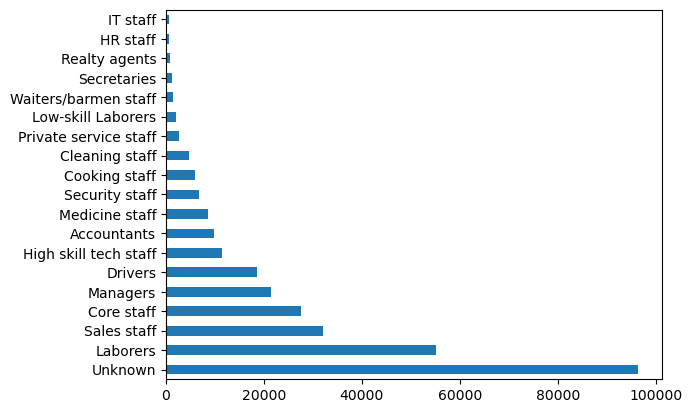

In [27]:
# plot a bar after filling the missing values

application.OCCUPATION_TYPE.value_counts().plot.barh()
plt.show()

In [28]:
# now check null count of the column

application.OCCUPATION_TYPE.isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_YEAR

In [29]:
# get describe of the column

application.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [30]:
# let's calculate the median

median_year = application.AMT_REQ_CREDIT_BUREAU_YEAR.median()
median_year

1.0

Now impute the nulls with median

In [31]:
# fill null values with median of the column

application["AMT_REQ_CREDIT_BUREAU_YEAR"] = application.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(median_year)

In [32]:
# check null count after imputing the values

application.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_QRT 

In [33]:
# get describe of the column

application.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [34]:
# calculate median of the column

median_QRT = application.AMT_REQ_CREDIT_BUREAU_QRT.median()
median_QRT

0.0

impute null values with median

In [35]:
# fill nulls with median

application["AMT_REQ_CREDIT_BUREAU_QRT"] = application.AMT_REQ_CREDIT_BUREAU_QRT.fillna(median_QRT)

In [36]:
# check null counts after filling with median

application.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_MON

In [37]:
# get describe of the AMT_REQ_CREDIT_BUREAU_MON

application.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [38]:
# calculate median of the column

median_MON = application.AMT_REQ_CREDIT_BUREAU_MON.median()
median_MON

0.0

In [39]:
# fill missing values with median

application["AMT_REQ_CREDIT_BUREAU_MON"] = application.AMT_REQ_CREDIT_BUREAU_MON.fillna(median_MON)

In [40]:
# check null counts after imputing


application.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_WEEK 

In [41]:
# get describe

application.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [42]:
# calculate mean 

median_week = application.AMT_REQ_CREDIT_BUREAU_WEEK.median()
median_week

0.0

In [43]:
# impute nulls with median
application["AMT_REQ_CREDIT_BUREAU_WEEK"] = application.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(median_week)

In [44]:
#  null check
application.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_DAY

In [45]:
# get decribe

application.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [46]:
# calculate median
median_day = application.AMT_REQ_CREDIT_BUREAU_DAY.median()
median_day

0.0

In [47]:
# impute the nulls with median

application["AMT_REQ_CREDIT_BUREAU_DAY"] = application.AMT_REQ_CREDIT_BUREAU_DAY.fillna(median_day)

In [48]:
# check nulls

application.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_HOUR

In [49]:
#  get describe

application.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [50]:
#  calculate median

median_hour = application.AMT_REQ_CREDIT_BUREAU_HOUR.median()
median_hour

0.0

In [51]:
# imputing nulls with median

application["AMT_REQ_CREDIT_BUREAU_HOUR"] = application.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(median_hour)

In [52]:
# check nulls 

application.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

#### NAME_TYPE_SUITE 

In [53]:
# get value counts of the column

application.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

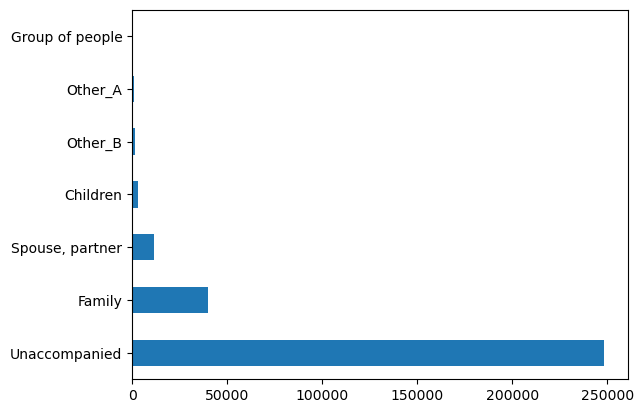

In [54]:
# plot a bar to see distribution

application.NAME_TYPE_SUITE.value_counts().plot.barh()
plt.show()

In [55]:
# calculate mode

mode_name_type = application.NAME_TYPE_SUITE.mode()
mode_name_type

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

as it is categorical column so nulls should be filled with mode of column i.e."UNACCOMPANIED"

In [56]:
# fill nulls with mode "UNACCOMPANIED"

application["NAME_TYPE_SUITE"] = application.NAME_TYPE_SUITE.fillna("mode_name_type")

In [57]:
# check nulls

application.NAME_TYPE_SUITE.isnull().sum()

0

#### OBS_30_CNT_SOCIAL_CIRCLE,       DEF_30_CNT_SOCIAL_CIRCLE,      OBS_60_CNT_SOCIAL_CIRCLE,      DEF_60_CNT_SOCIAL_CIRCLE

As following columns have same null counts so will check meadian and fill them with median value simultaneously 

In [58]:
# Calculate the median of the columns

median_social_circle = application[["OBS_30_CNT_SOCIAL_CIRCLE",       
"DEF_30_CNT_SOCIAL_CIRCLE",      
"OBS_60_CNT_SOCIAL_CIRCLE",      
"DEF_60_CNT_SOCIAL_CIRCLE",]].median()
median_social_circle

OBS_30_CNT_SOCIAL_CIRCLE    0.0
DEF_30_CNT_SOCIAL_CIRCLE    0.0
OBS_60_CNT_SOCIAL_CIRCLE    0.0
DEF_60_CNT_SOCIAL_CIRCLE    0.0
dtype: float64

In [59]:
# Filling the null values with median of columns

application[["OBS_30_CNT_SOCIAL_CIRCLE",       
"DEF_30_CNT_SOCIAL_CIRCLE",      
"OBS_60_CNT_SOCIAL_CIRCLE",      
"DEF_60_CNT_SOCIAL_CIRCLE",]] =  application[["OBS_30_CNT_SOCIAL_CIRCLE",       
"DEF_30_CNT_SOCIAL_CIRCLE",      
"OBS_60_CNT_SOCIAL_CIRCLE",      
"DEF_60_CNT_SOCIAL_CIRCLE",]].fillna(median_social_circle)

In [60]:
# check whether the nulls are filled succesfully or not


application[["OBS_30_CNT_SOCIAL_CIRCLE",       
"DEF_30_CNT_SOCIAL_CIRCLE",      
"OBS_60_CNT_SOCIAL_CIRCLE",      
"DEF_60_CNT_SOCIAL_CIRCLE",]].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

#### AMT_ANNUITY

In [61]:
# get describe

application.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [62]:
# null count

application.AMT_ANNUITY.isnull().sum()

12

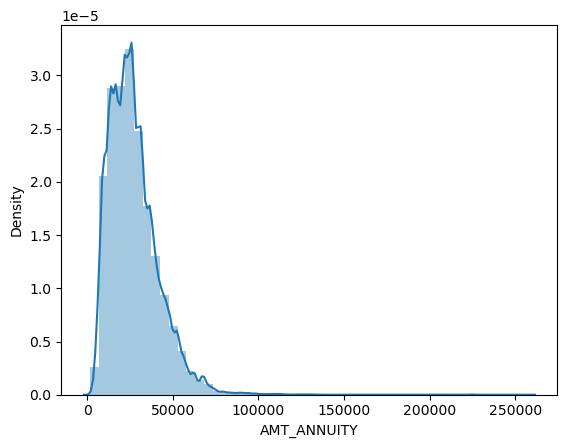

In [63]:
# to check skew of the column plotting the distplot

sns.distplot(application.AMT_ANNUITY)
plt.show()

As it is right skewed we should fill the nulls with mean

In [64]:
# calculate mean

amt_mean = application.AMT_ANNUITY.mean()
amt_mean

27108.573909183444

In [65]:
# filling the null values with mean of column

application["AMT_ANNUITY"] = application.AMT_ANNUITY.fillna(amt_mean)

In [66]:
# check the missing values have filled or nor

application.AMT_ANNUITY.isnull().sum()

0

#### AMT_GOODS_PRICE 

In [67]:
# get describe

application.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

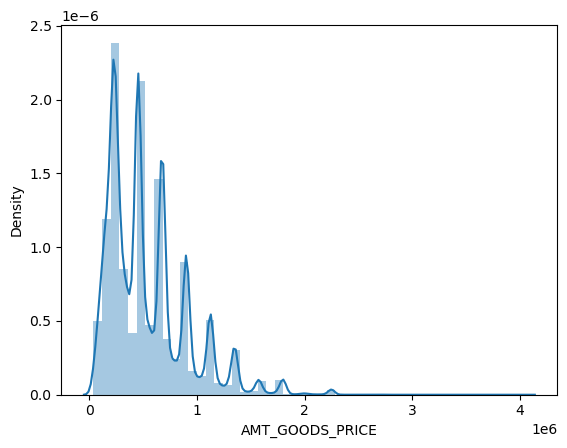

In [68]:
# plot distplot to check skewness in column

sns.distplot(application.AMT_GOODS_PRICE)
plt.show()

As it is positively skewed so filling the nulls in the column with mean value

In [69]:
# calculate mean

goods_price_mean = application.AMT_GOODS_PRICE.mean()
goods_price_mean

538396.2074288895

In [70]:
# fill the null values with mean 
application["AMT_GOODS_PRICE"] = application.AMT_GOODS_PRICE.fillna(goods_price_mean)

In [71]:
# check whether the null values have filled or not

application.AMT_GOODS_PRICE.isnull().sum()

0

#### CNT_FAM_MEMBERS

In [72]:
# calculate describe

application.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [73]:
# null count

application.CNT_FAM_MEMBERS.isnull().sum()

2

drop the missing records in CNT_FAM_MEMBERS

In [74]:
# drop the nulls

application = application[~application.CNT_FAM_MEMBERS.isnull()]

In [75]:
# check the missing values have dropped or not

application.CNT_FAM_MEMBERS.isnull().sum()

0

#### DAYS_LAST_PHONE_CHANGE

In [76]:
# null count of the column

application.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [198]:
# get describe

application.DAYS_LAST_PHONE_CHANGE.describe()

count    307503.000000
mean       -962.854431
std         826.812434
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

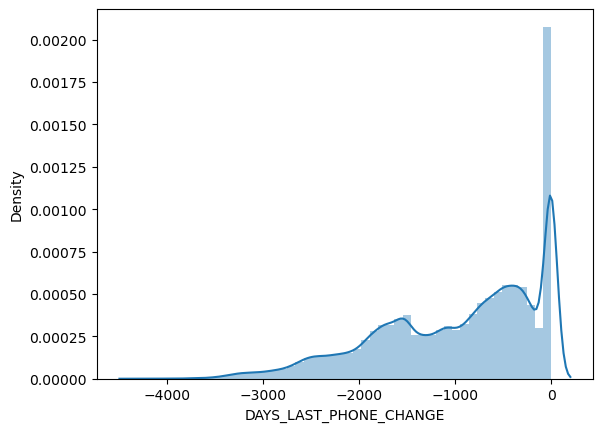

In [78]:
# plot distplot of the column DAYS_LAST_PHONE_CHANGE

sns.distplot(application.DAYS_LAST_PHONE_CHANGE)
plt.show()

it is negatively skewed distribution

In [79]:
# calculate skew

application.DAYS_LAST_PHONE_CHANGE.skew()

-0.7135993754787455

In [80]:
# calculate mode

application.DAYS_LAST_PHONE_CHANGE.mode()

0    0.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [81]:
# impute nulls

application["DAYS_LAST_PHONE_CHANGE"] = application.DAYS_LAST_PHONE_CHANGE.fillna(0.0)

In [200]:
# check null count

application.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

#### EXT_SOURCE_3 & EXT_SOURCE_3

As these columns are not interpretending anything so wanted to drop them 

In [83]:
# drop the columns EXT_SOURCE_2 & EXT_SOURCE_3

application.drop(["EXT_SOURCE_2" , "EXT_SOURCE_3"] , axis = 1 , inplace = True)

Now check the null count of the application dataframe

In [84]:
# null count of the columns after handling the missing values

pd.options.display.max_rows = None
application.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

#### Here application dataframe has been cleaned as there are no null values in the columns 

### Detection and Handling of outliers in application data


To find outliers we have to seperate the numerical and categorical columns of the dataset

In [85]:
# print columns of the dataset

application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FL

In [86]:
# print numerical variables of the dataset

num_cols = application.select_dtypes(exclude= ["object"]).columns.tolist()
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG

In [87]:
# count of numerical columns

len(num_cols)

59

In [88]:
# print categorical variables of the dataset

cat_cols = application.select_dtypes(exclude=["number"]).columns.tolist()
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [89]:
# count of categorical columns

len(cat_cols)

12

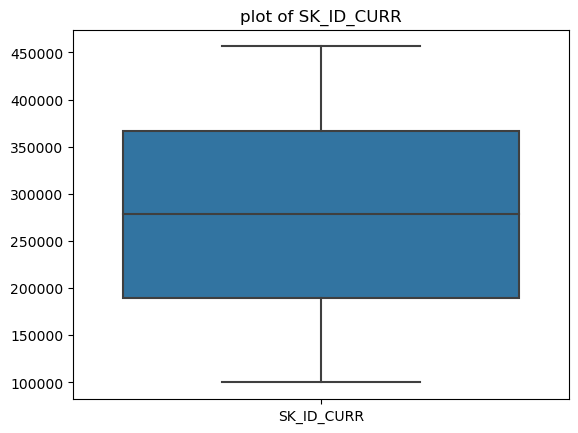

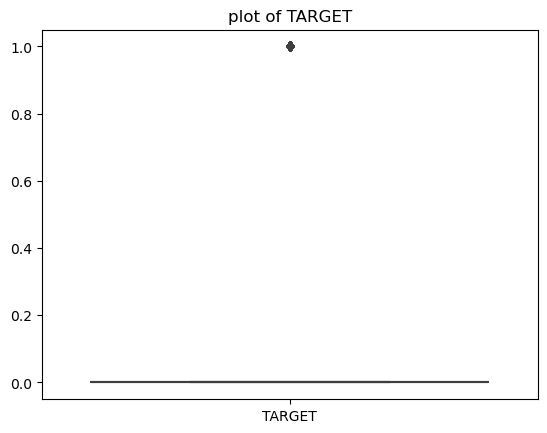

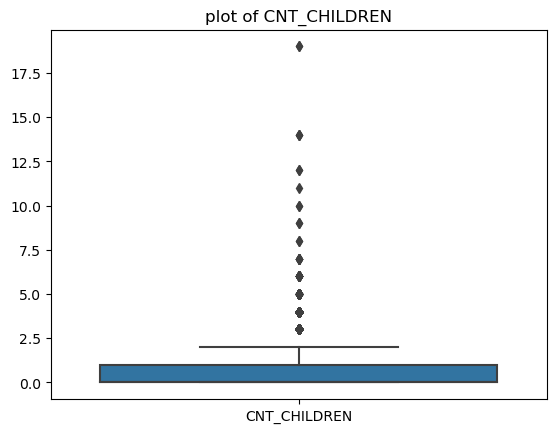

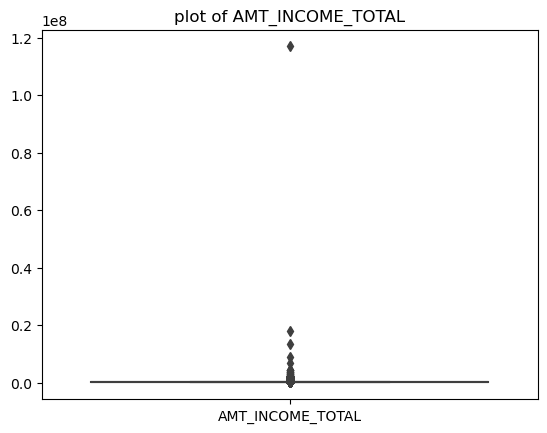

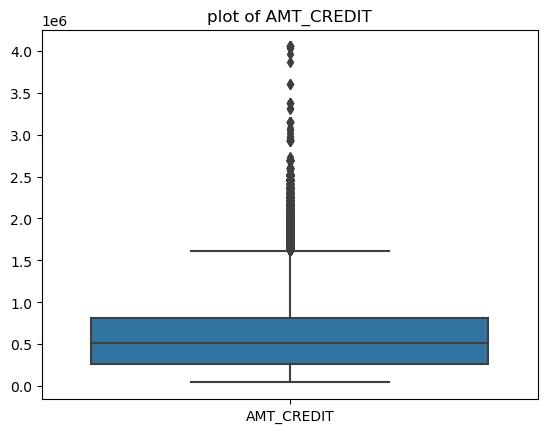

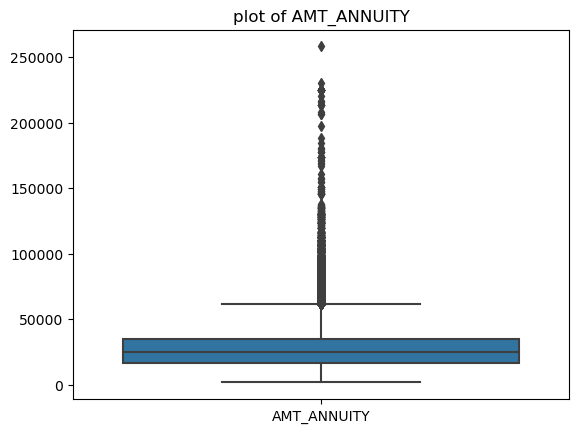

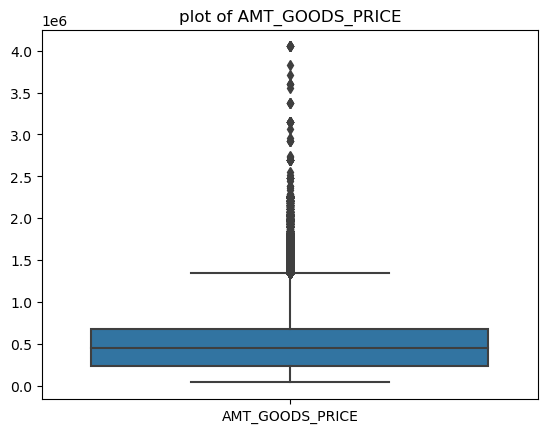

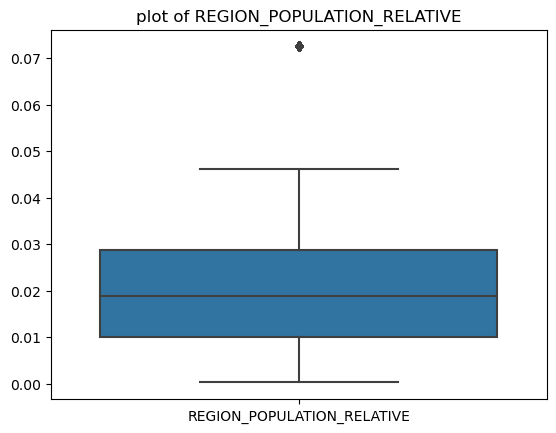

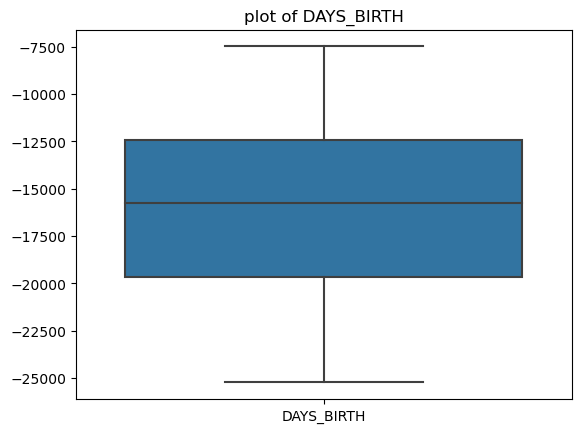

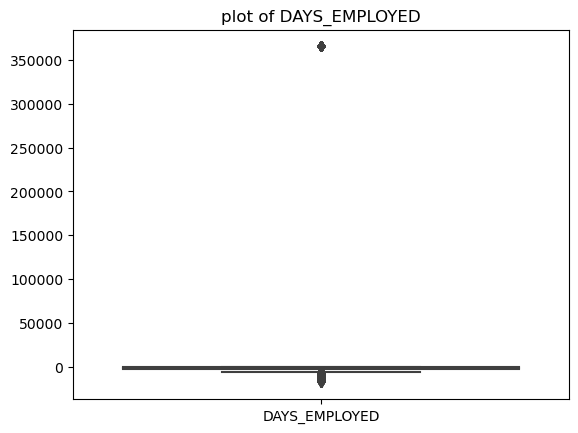

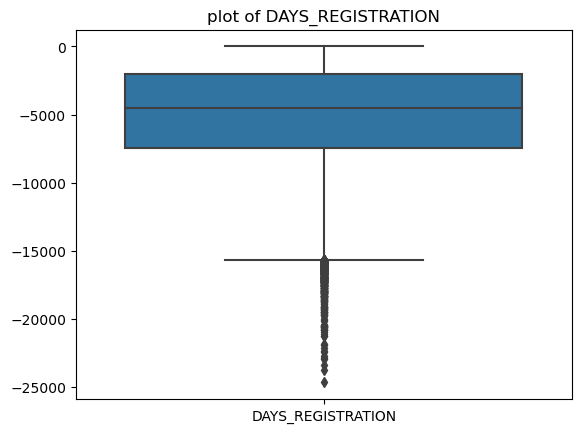

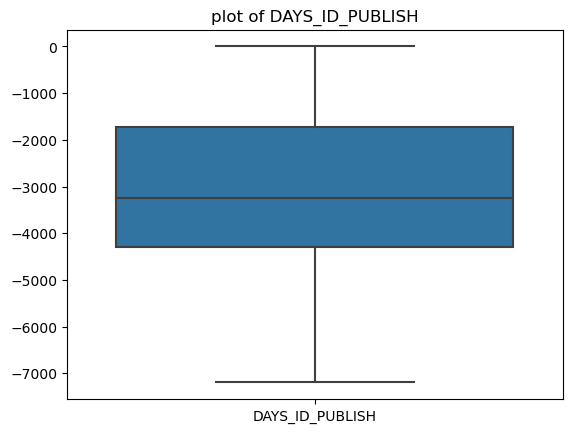

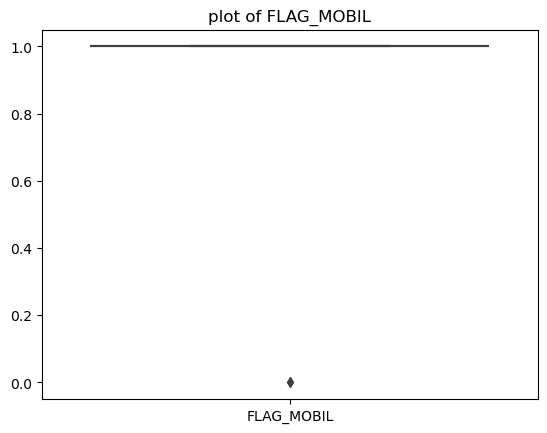

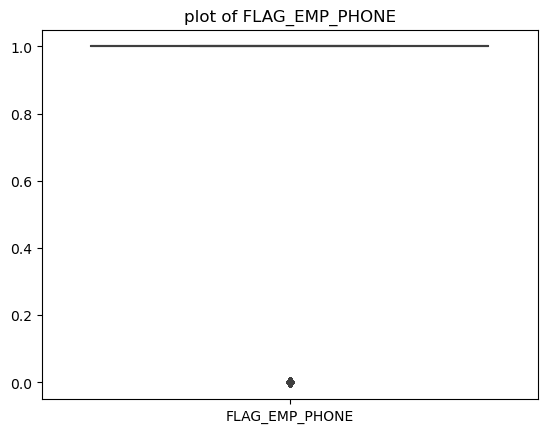

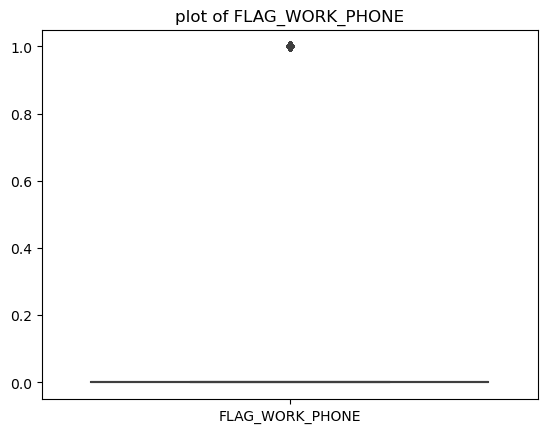

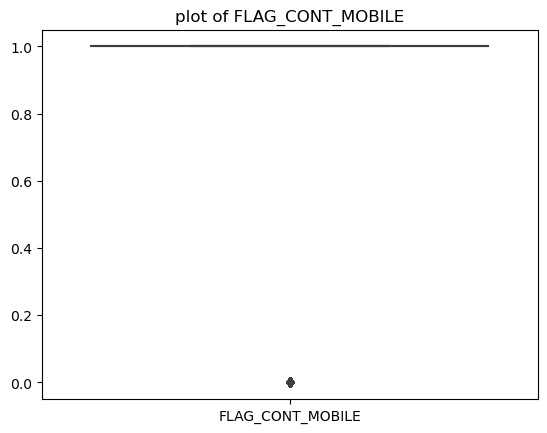

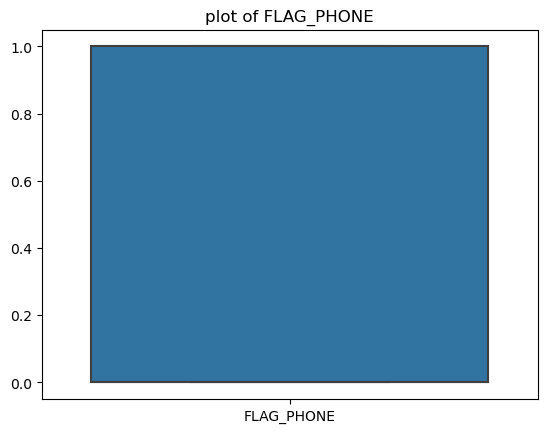

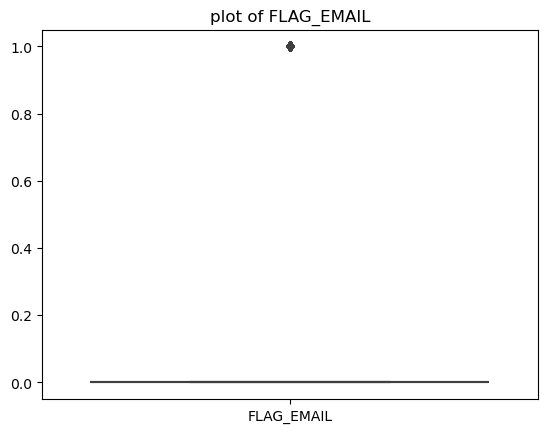

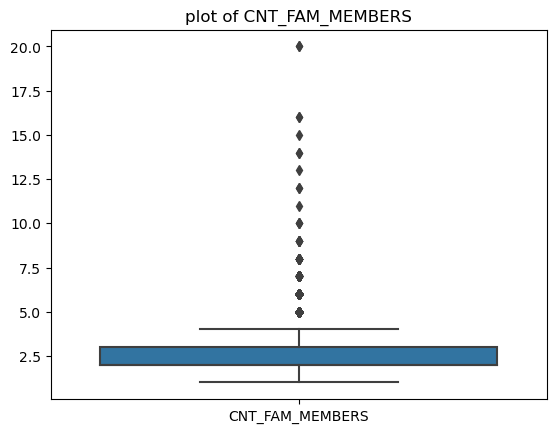

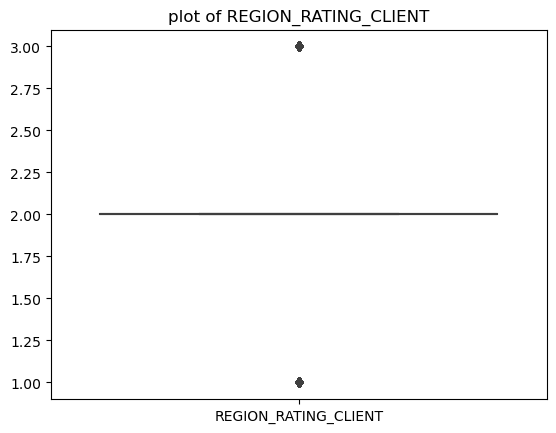

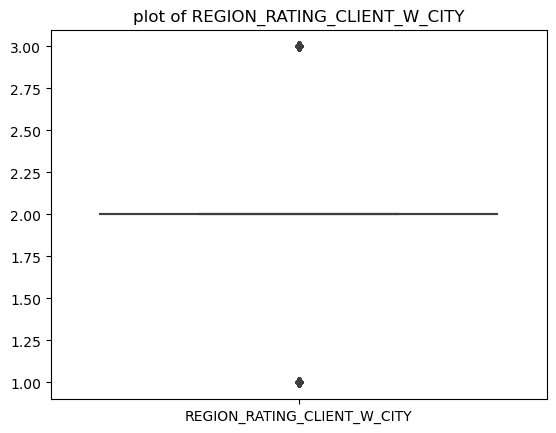

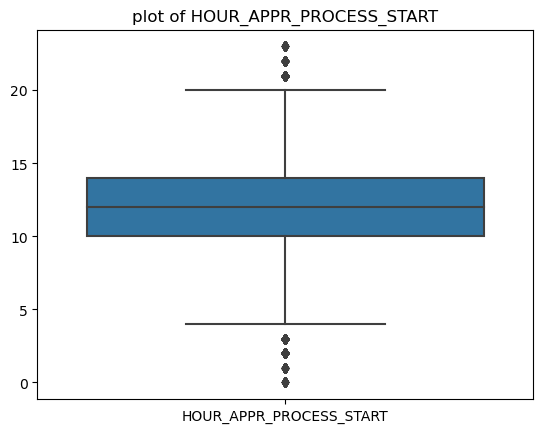

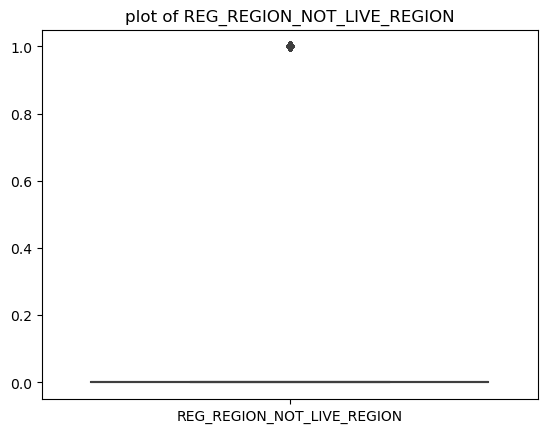

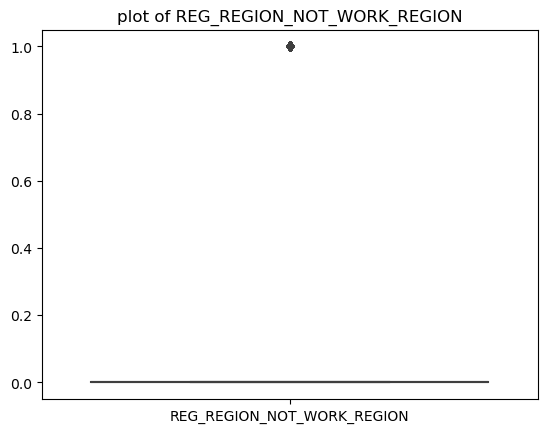

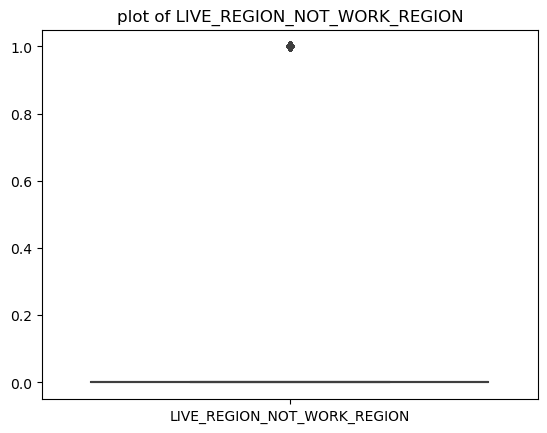

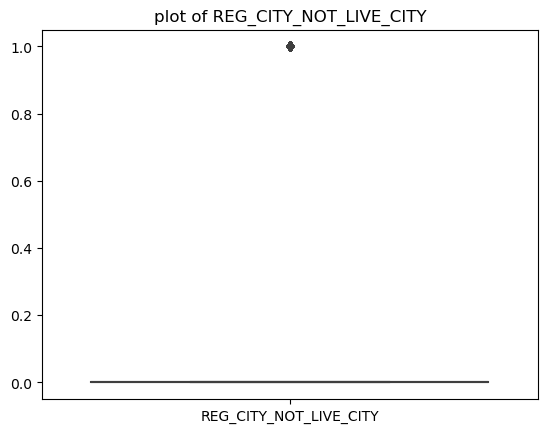

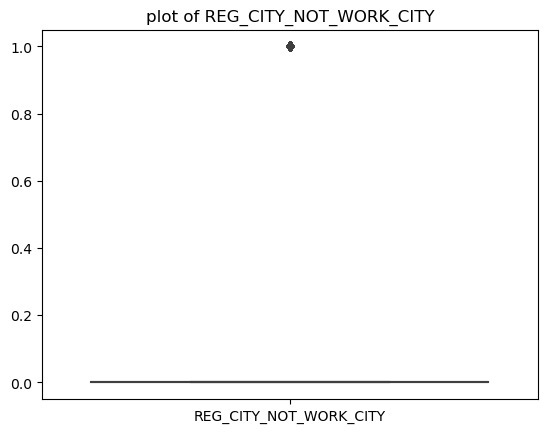

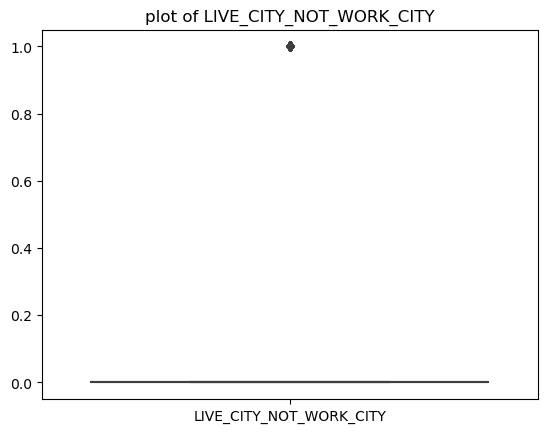

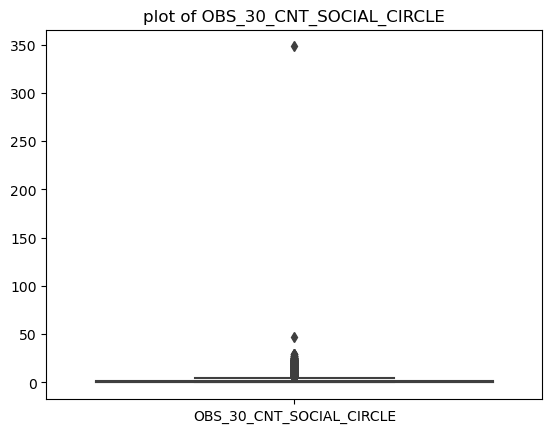

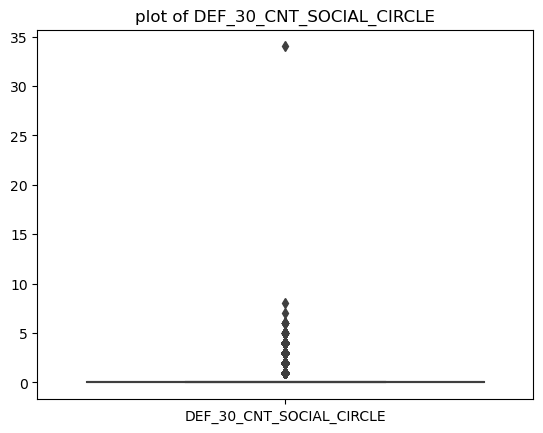

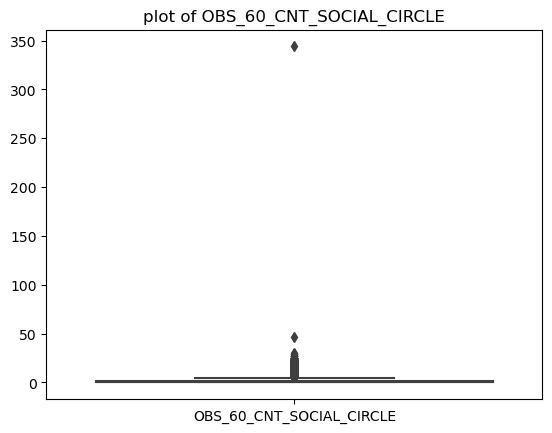

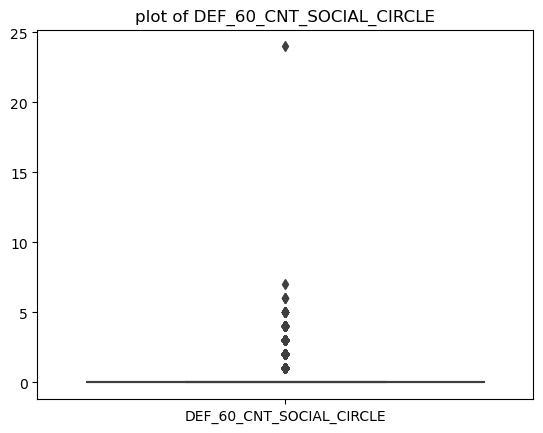

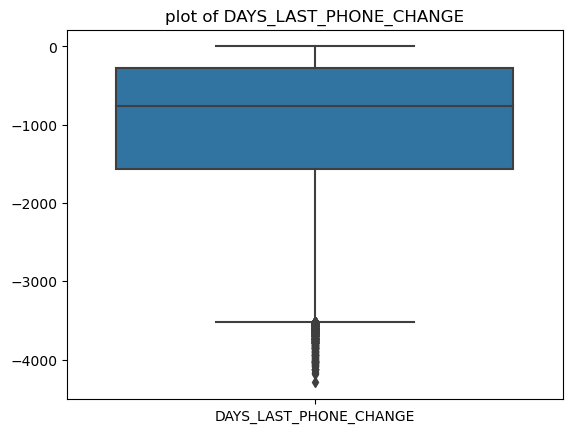

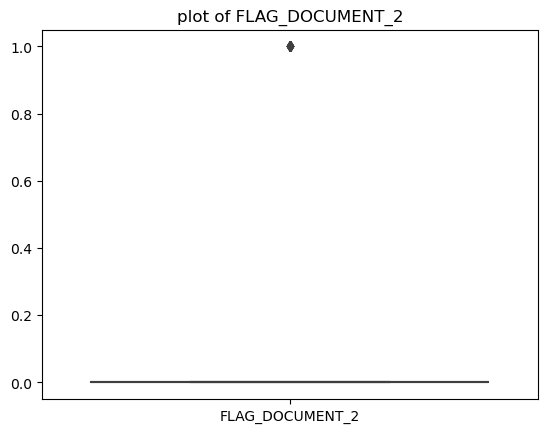

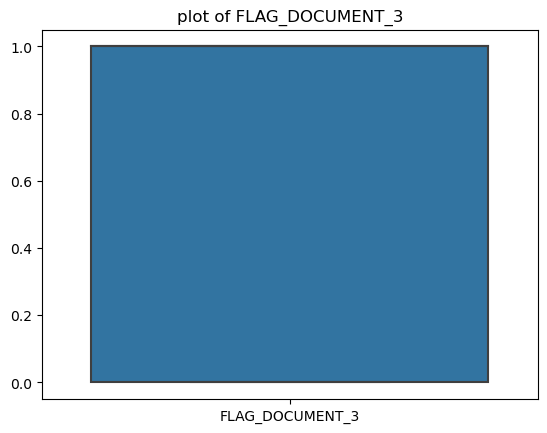

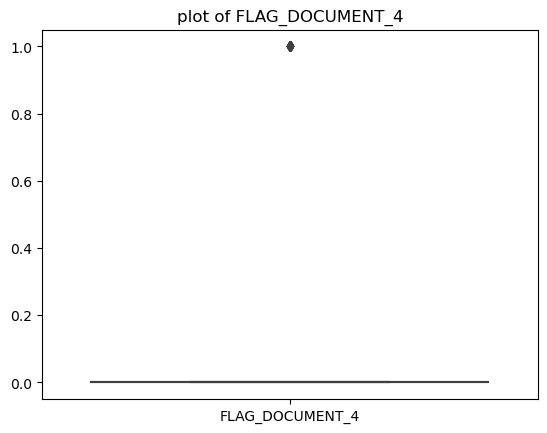

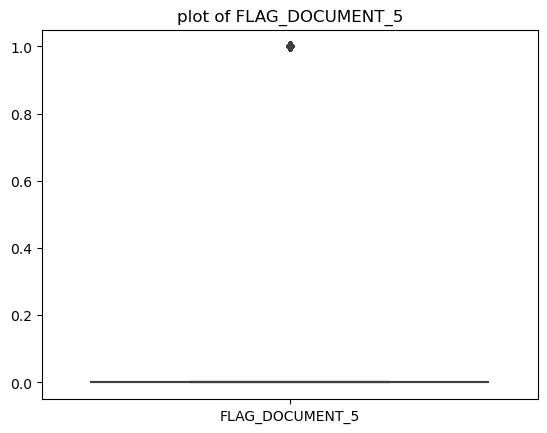

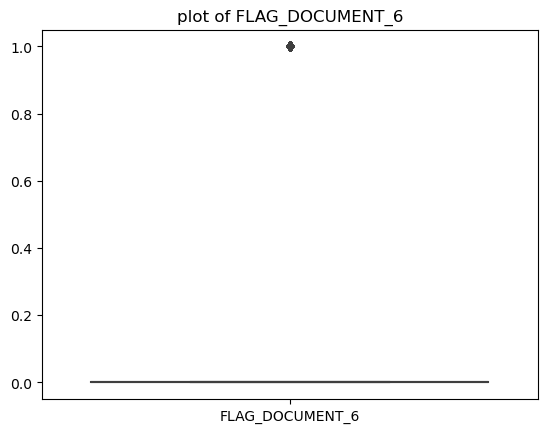

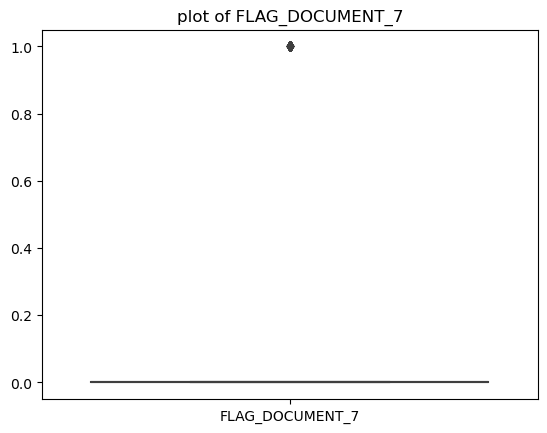

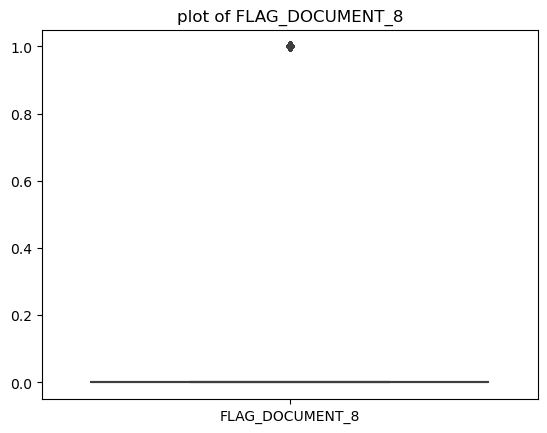

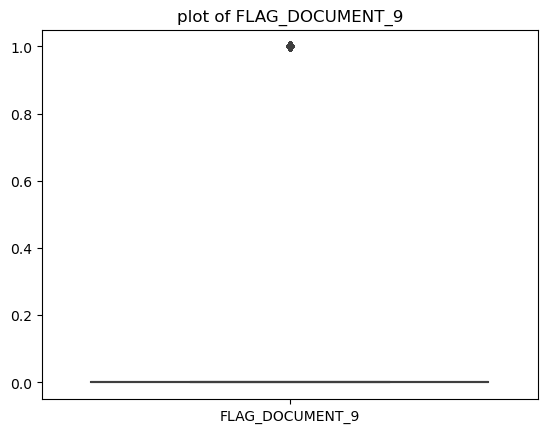

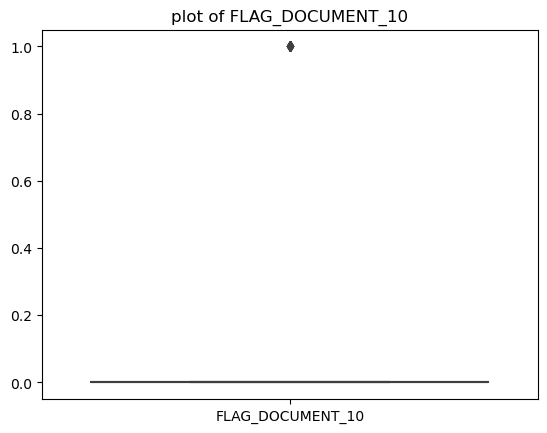

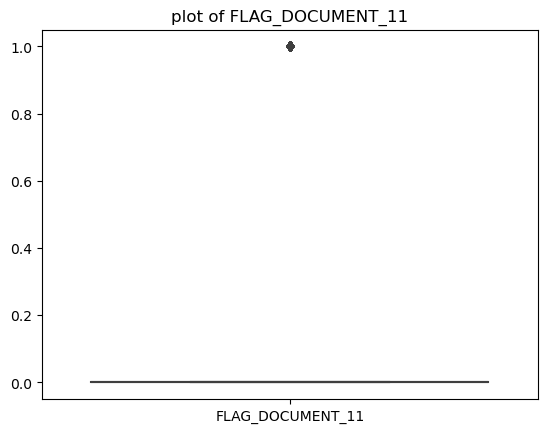

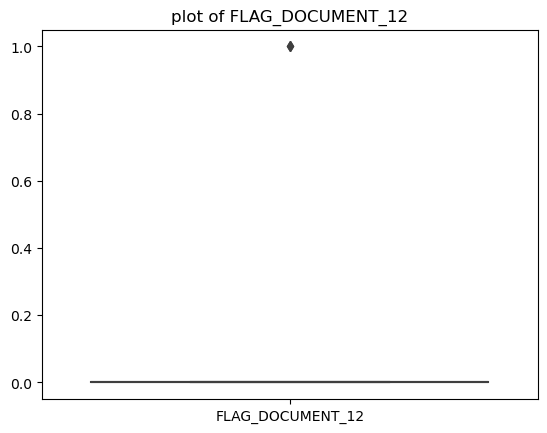

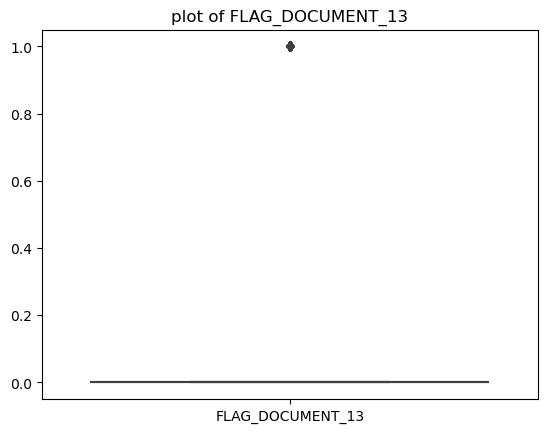

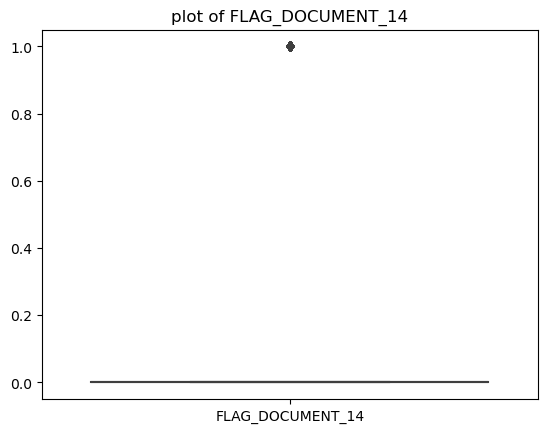

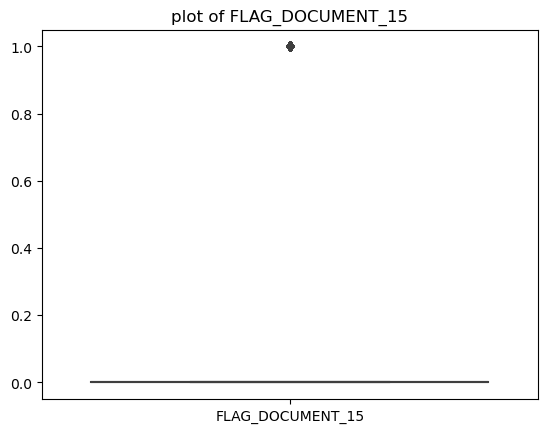

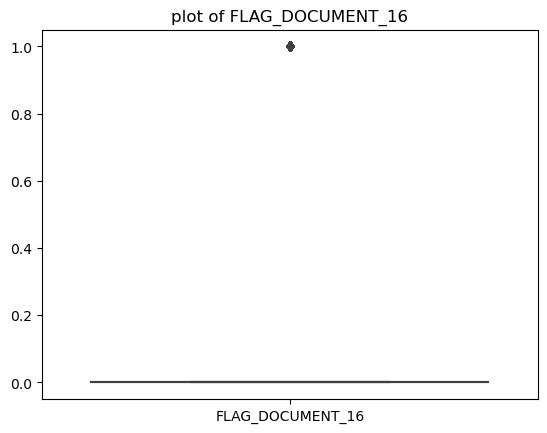

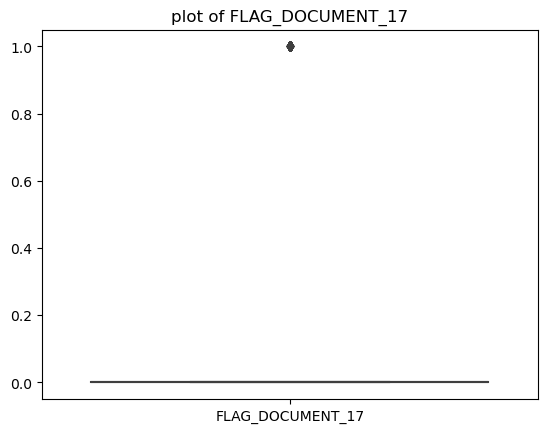

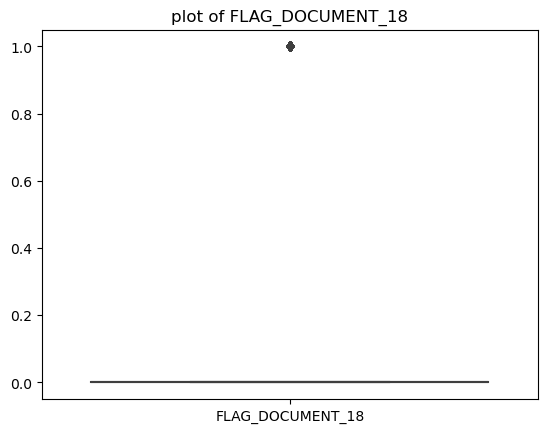

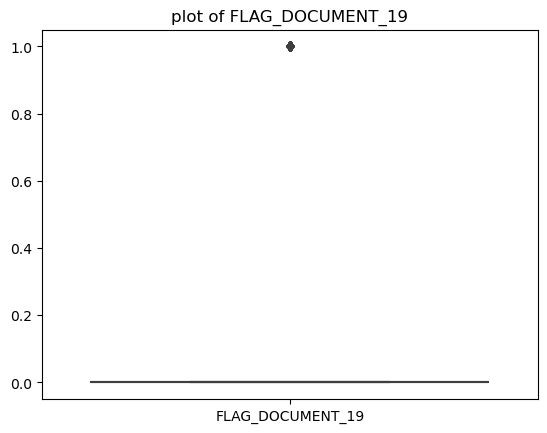

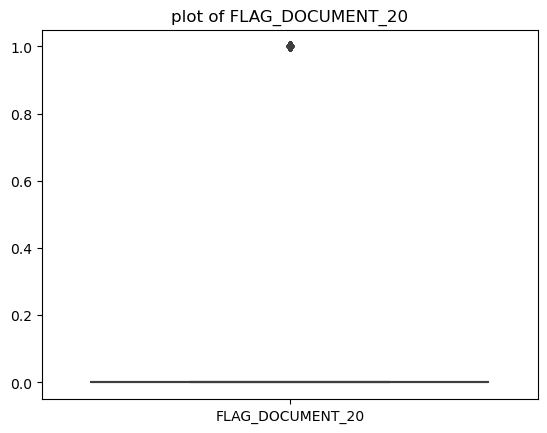

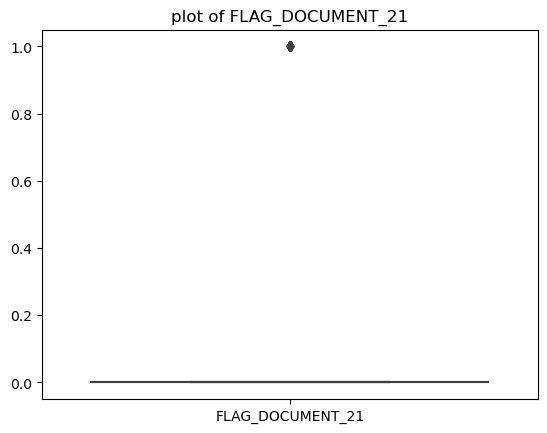

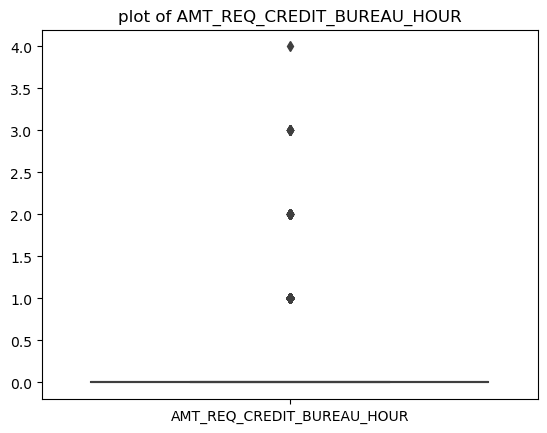

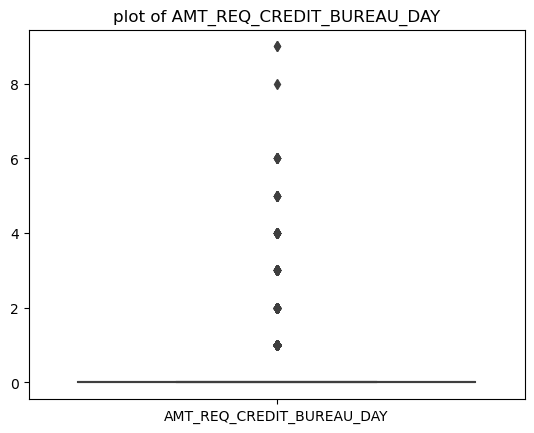

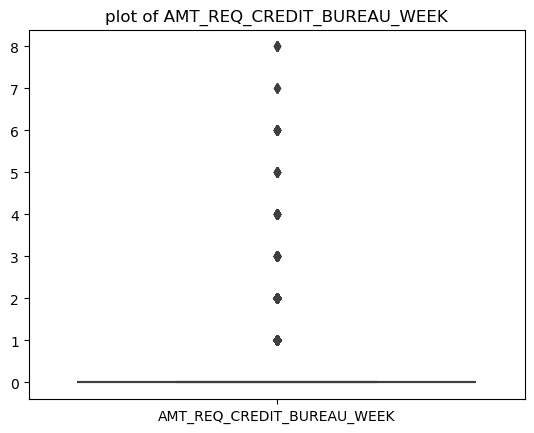

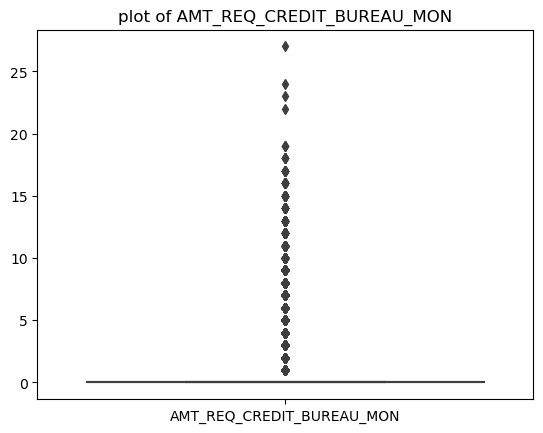

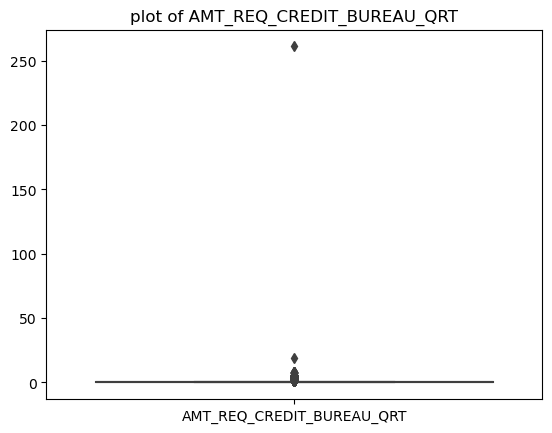

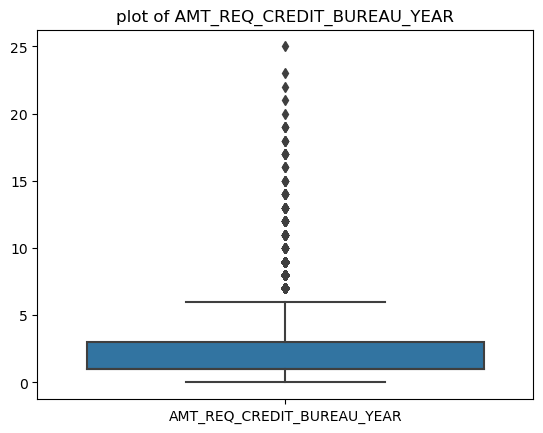

In [90]:
# identify outliers from numerical variables of application data by using box plot

for i in num_cols:
    sns.boxplot(application[[i]])
    plt.title("plot of " + i)
    plt.show()

Here we can easily identify the outliers from numerical variables by plotting box plot 


Handle important variables with outliers

#### CNT_CHILDREN

In [91]:
# value count of column

application.CNT_CHILDREN.value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

here 19 can be outlier so removing it

In [92]:
# dropping outlier

application = application[~(application["CNT_CHILDREN"]==19)]

In [93]:
# check value counts

application.CNT_CHILDREN.value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
11         1
Name: CNT_CHILDREN, dtype: int64

#### AMT_INCOME_TOTAL

In [94]:
# get describe

application.AMT_INCOME_TOTAL.describe()

count    3.075070e+05
mean     1.687973e+05
std      2.371241e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

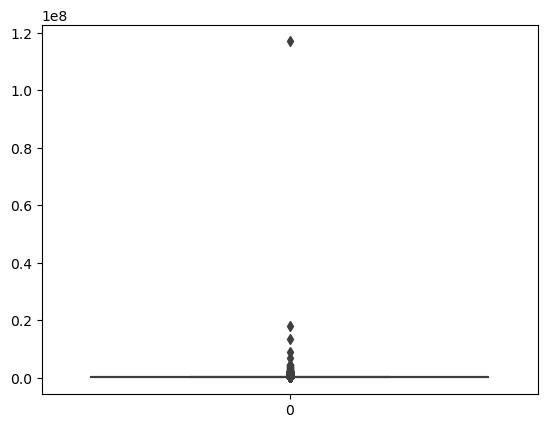

In [95]:
# plot boxplot to identify the outliers in the variable

sns.boxplot(application.AMT_INCOME_TOTAL)
plt.show()

In [96]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_INCOME_TOTAL variable

quantile = application.AMT_INCOME_TOTAL.quantile([0.5 , 0.7 , 0.9 , 0.95 , 0.99])
quantile

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

here we can confirm that outliers are present in the variable

####  AMT_CREDIT

In [97]:
# get describe

application.AMT_CREDIT.describe()

count    3.075070e+05
mean     5.990284e+05
std      4.024921e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

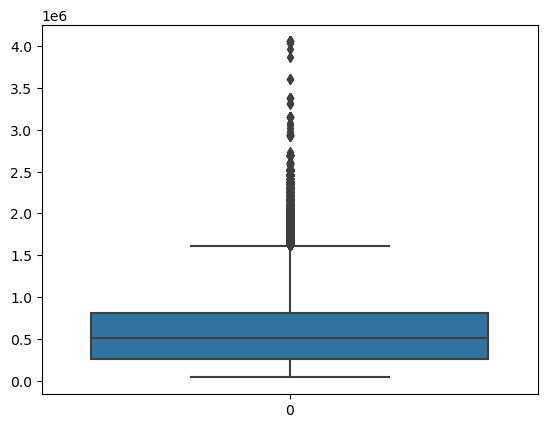

In [202]:
# plot boxplot to identify the outliers in the variable
sns.boxplot(application.AMT_CREDIT)
plt.show()

In [99]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_CREDIT variable

quantile = application.AMT_CREDIT.quantile([0.5 , 0.7 , 0.9 , 0.95 , 0.99])
quantile

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

as quantile values are increasing we can say outliers are present

#### AMT_ANNUITY

In [100]:
# get describe

application.AMT_ANNUITY.describe()

count    307507.000000
mean      27108.647905
std       14493.486067
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

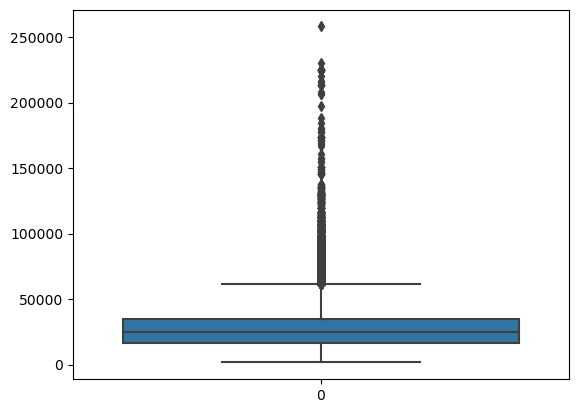

In [101]:
# plot boxplot to identify the outliers in the variable

sns.boxplot(application.AMT_ANNUITY)
plt.show()

In [102]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_ANNUITY variable

quantile = application.AMT_ANNUITY.quantile([0.5 , 0.7 , 0.9 , 0.95 , 0.99])
quantile

0.50    24903.0
0.70    32004.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

here also outlier is present

#### AMT_GOODS_PRICE

In [103]:
# get  describe

application.AMT_GOODS_PRICE.describe()

count    3.075070e+05
mean     5.383985e+05
std      3.692807e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

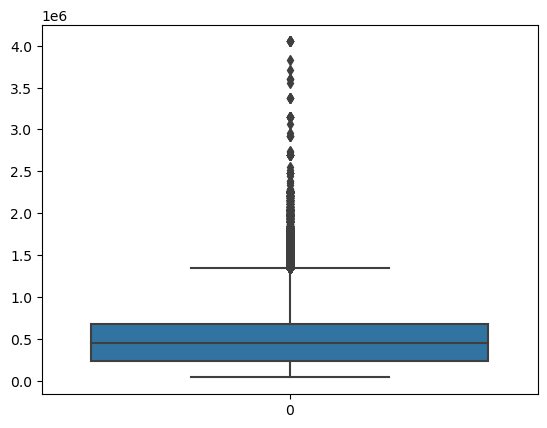

In [104]:
# plot boxplot to identify the outliers in the variable

sns.boxplot(application.AMT_GOODS_PRICE)
plt.show()

In [105]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of AMT_GOODS_PRICE variable

quantile = application.AMT_GOODS_PRICE.quantile([0.5 , 0.7 , 0.9 , 0.95 , 0.99])
quantile

0.50     450000.0
0.70     675000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

# Data Imbalace

#### Check Data Imbalance by analysing the TARGET variable

In [106]:
# get value count of Target variable

application.TARGET.value_counts(normalize = True)

0    0.91927
1    0.08073
Name: TARGET, dtype: float64

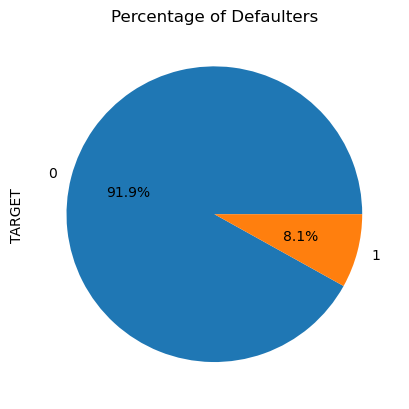

In [107]:
# plot the pie chart of TARGET variable

application.TARGET.value_counts(normalize = True).plot.pie(autopct='%2.1f%%')
plt.title("Percentage of Defaulters")
plt.show()


defaulter percentage is 8.1%

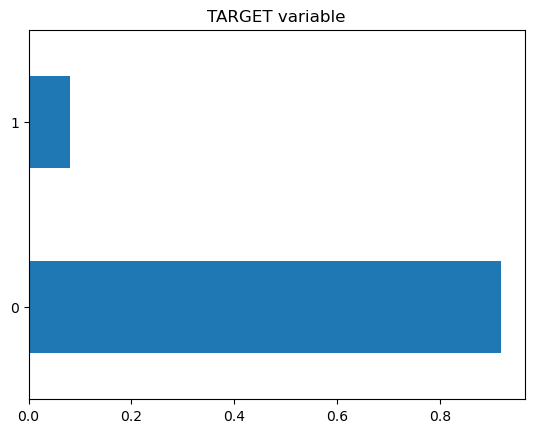

In [108]:
# plot the bar chart of Target Variable
application.TARGET.value_counts(normalize = True).plot.barh()
plt.title("TARGET variable")
plt.show()

here the number of customers who can repay the loan (non-defaulters) are in huge number and the customers who can not repay the loan are in very less so there is a lot of variation between them and data is not distributed well

So we can conclude that data is imbalanced.

### data imbalance by CODE_GENDER

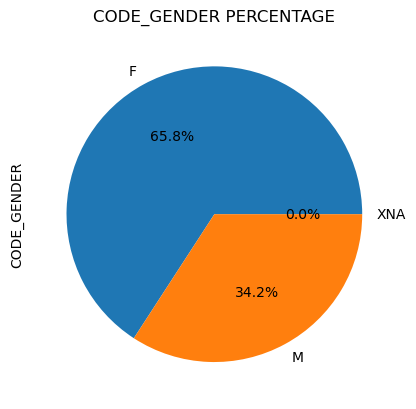

In [109]:
# plot the pie chart of CODE_GENDER variable

application.CODE_GENDER.value_counts(normalize = True).plot.pie(autopct='%2.1f%%')
plt.title("CODE_GENDER PERCENTAGE")
plt.show()


female percentage is 34.2%

# Univariate Analysis of Application Data 

univariate analysis of categorical variables

In [204]:
# print categorical columns
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

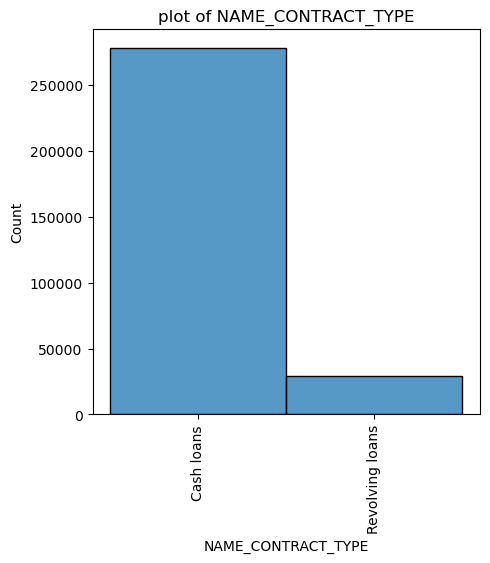

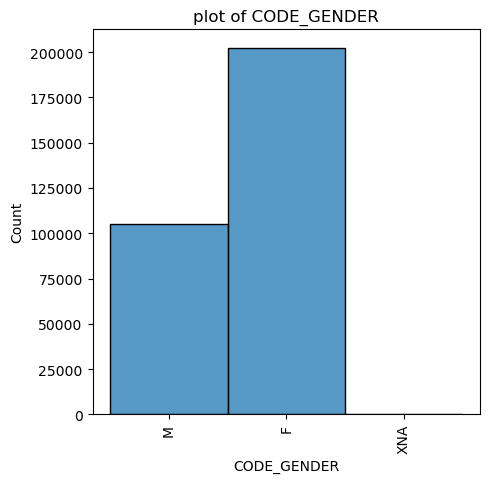

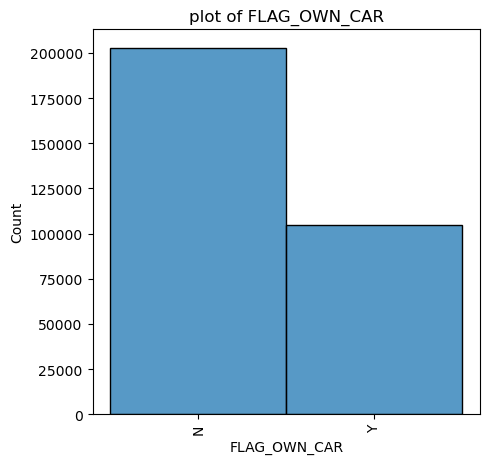

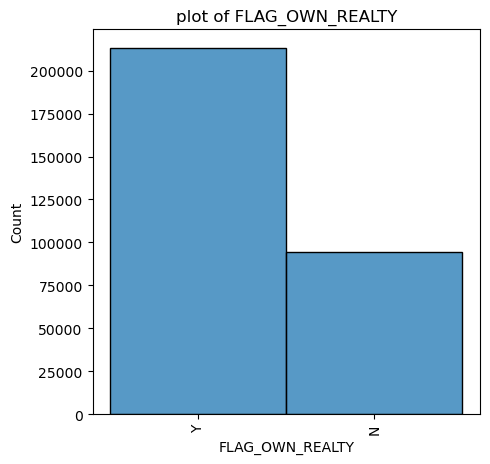

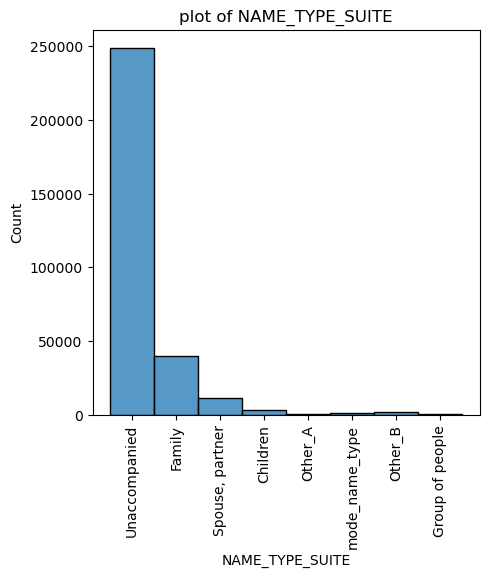

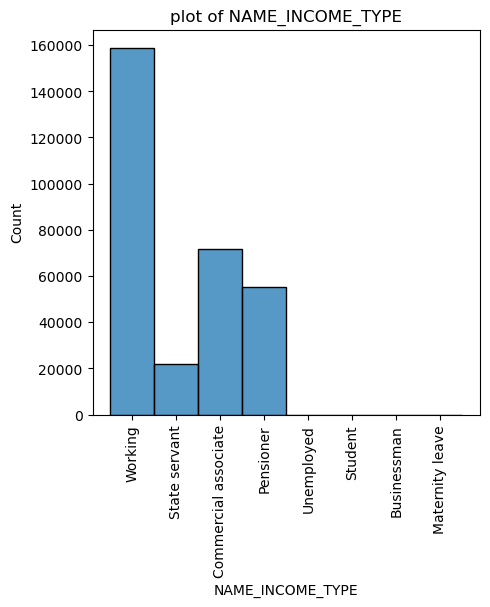

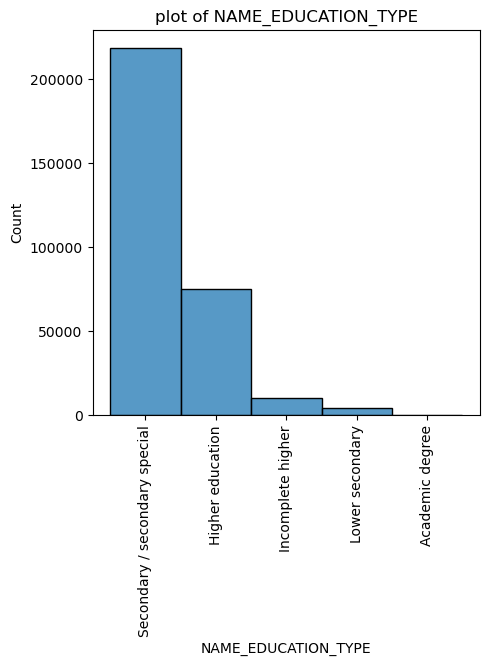

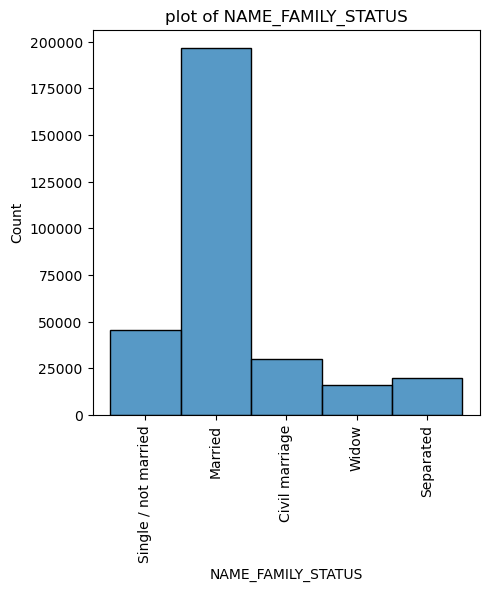

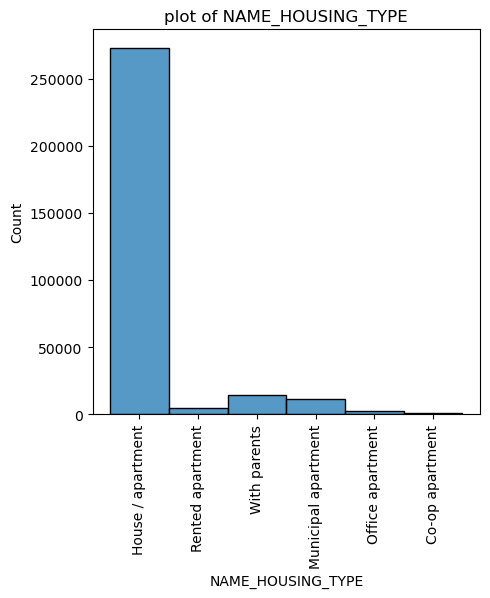

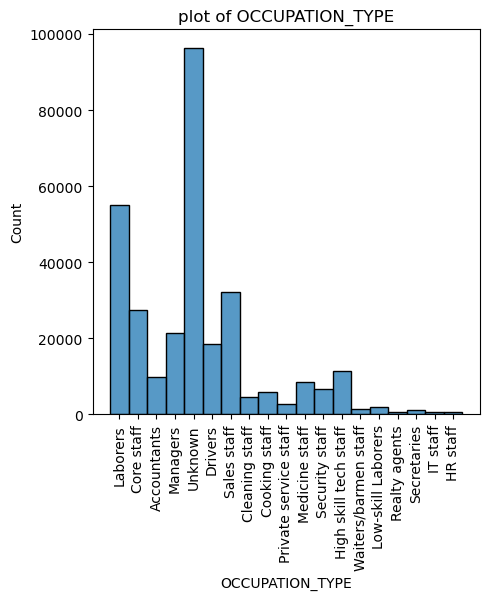

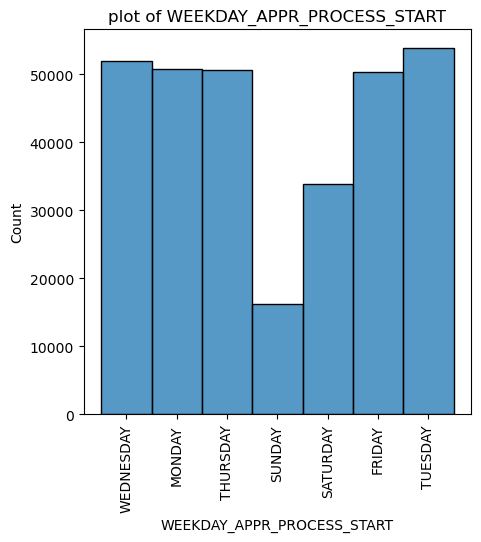

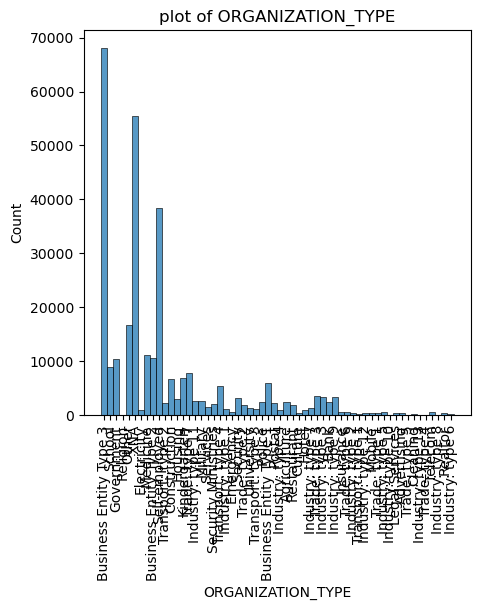

In [115]:
# plot histplot of categorical variables 

for i in cat_cols:
    plt.figure(figsize = (5,5))
    sns.histplot(application[i])
    plt.xticks(rotation = 90)
    plt.title("plot of " + i)
    plt.show()

here we have XNA values in some variables so we can consider them as missing records

In [116]:
#let's see them separately

####  CODE_GENDER

In [117]:
#  value count of the column

application.CODE_GENDER.value_counts()

F      202445
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64

In [118]:
# four missing records are here can drop them

application = application[~(application["CODE_GENDER"] == "XNA")]

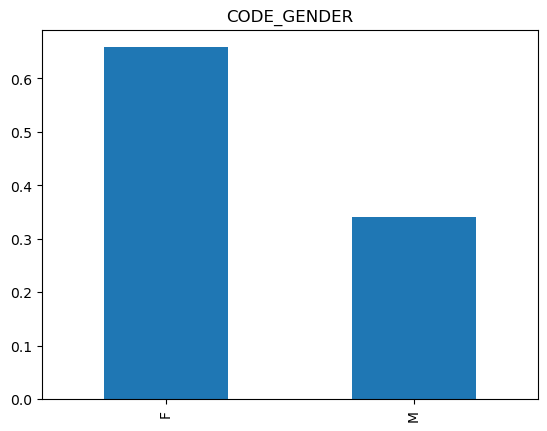

In [119]:
# plot bar graph of CODE_GENDER

application.CODE_GENDER.value_counts(normalize = True).plot.bar()
plt.title("CODE_GENDER")
plt.show()

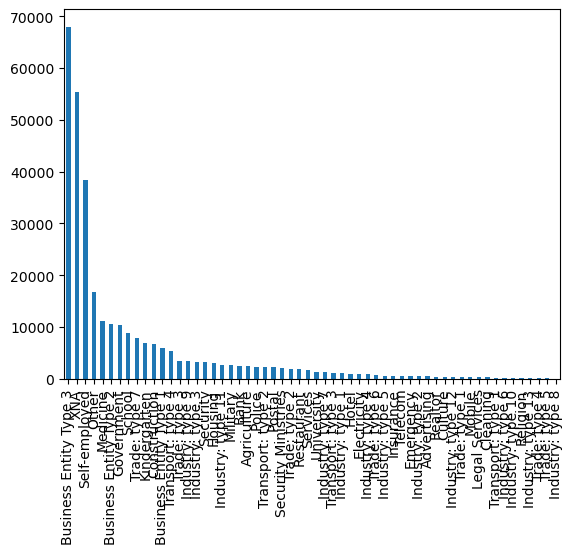

In [120]:
# plot bar of ORGANIZATION_TYPE

application.ORGANIZATION_TYPE.value_counts().plot.bar()
plt.show()

In [121]:
# value count of ORGANIZATION_TYPE

application.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6878
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1810
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

as they are huge in number we are not manipulating them and also some people don't want to tell their organization

## Make two differnt dataframes on the basis of customers who pay on time and the customers who are defaulters to make replayment

In [122]:
application.TARGET.dtype

dtype('int64')

In [123]:
target_0 = application[application["TARGET"]==0]

In [124]:
target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0              

In [125]:
target_1 = application[application["TARGET"]==1]

In [126]:
target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0       100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
26      100031       1         Cash loans           F            N               Y             0          112500.0    979992.0      27076.5         702000.0   Unaccompanied               Working  Secondary / secondary special                 Widow  House / apartment                    0.018029      -18724          -2628            -6573.0            -1827           1               1                0                 1           0           0   Cooking staff              1.0                     3                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0  Business Entity Type 3                      10.0                       1.0                      10.0                       0.0                  -161.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 1                 0                 0

we have created two dataframes target_0 for non-defaulters and target_1 for defaulters

# Bivariate Analysis  

bivariate analysis of numerical columns in application data

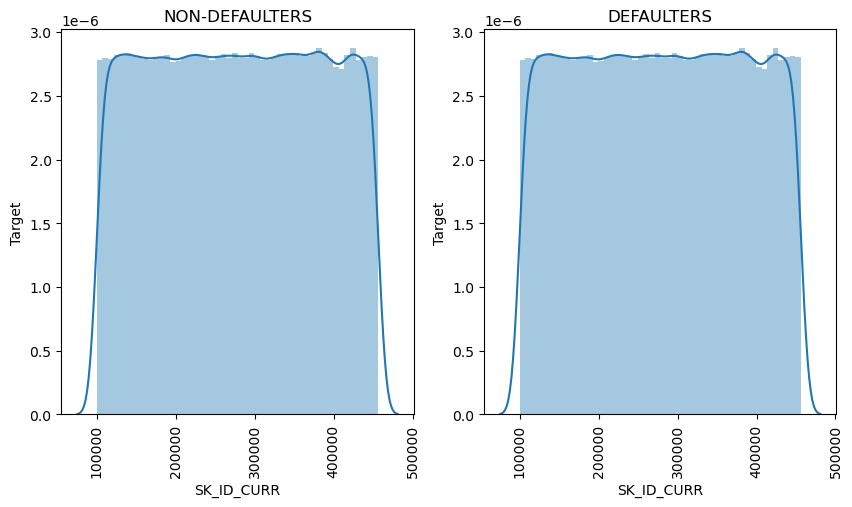

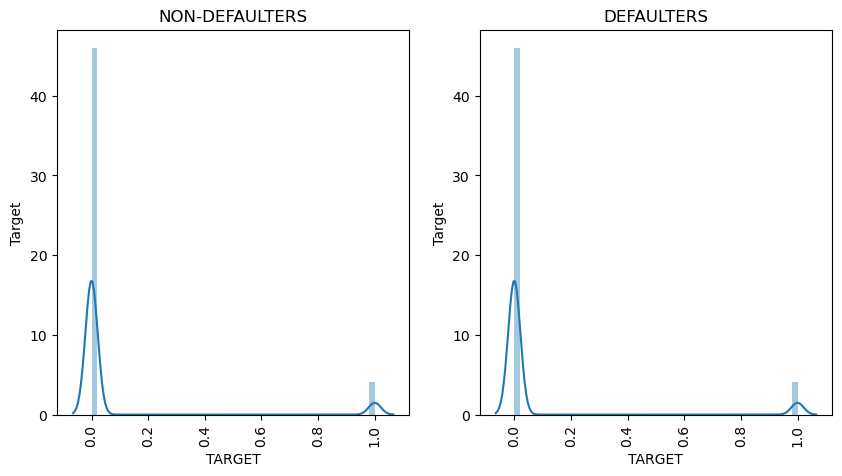

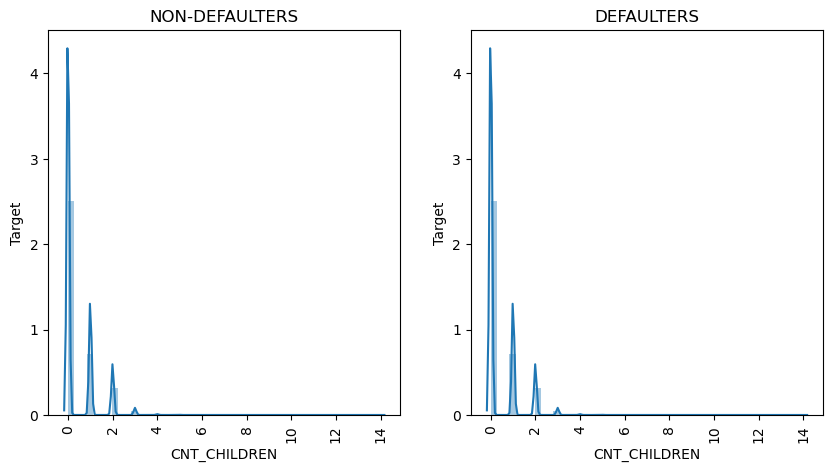

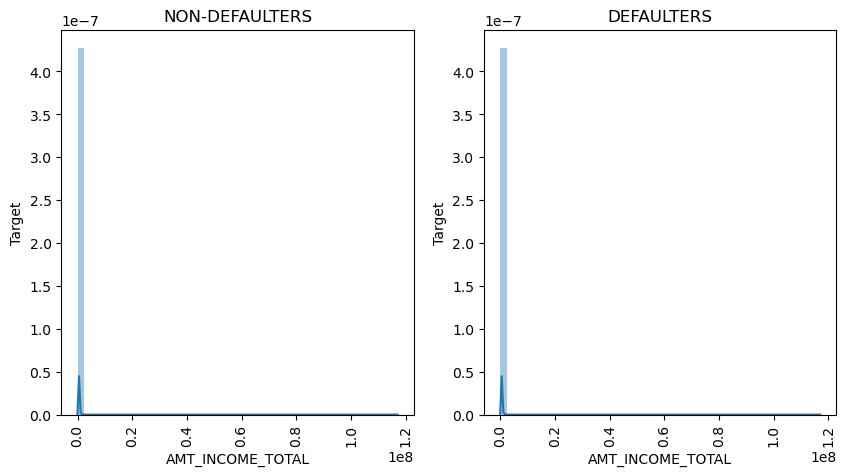

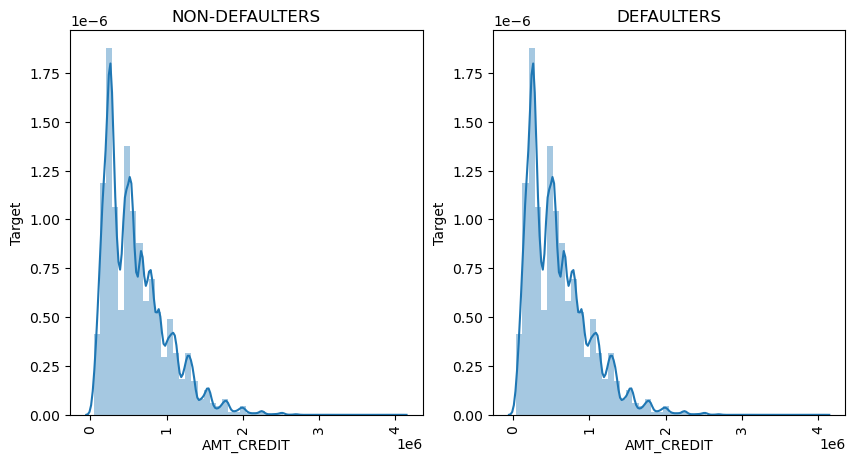

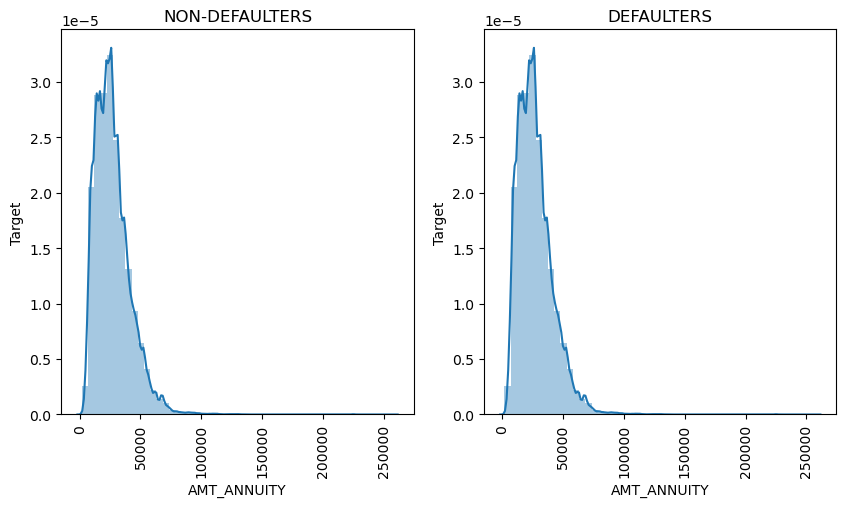

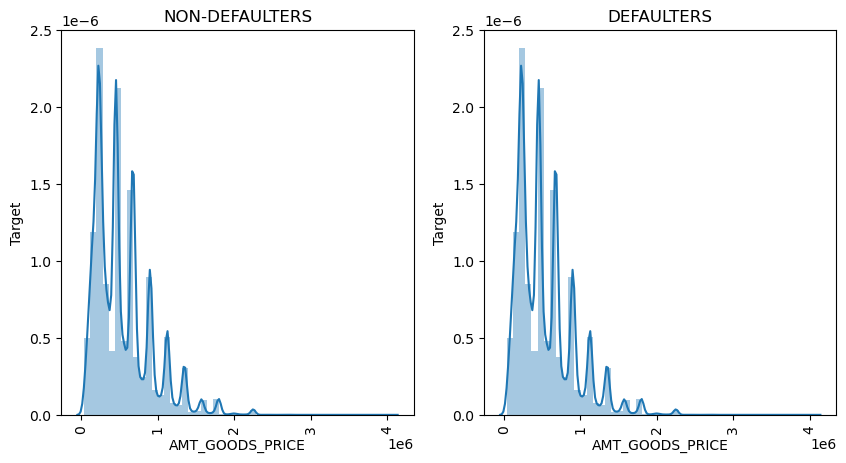

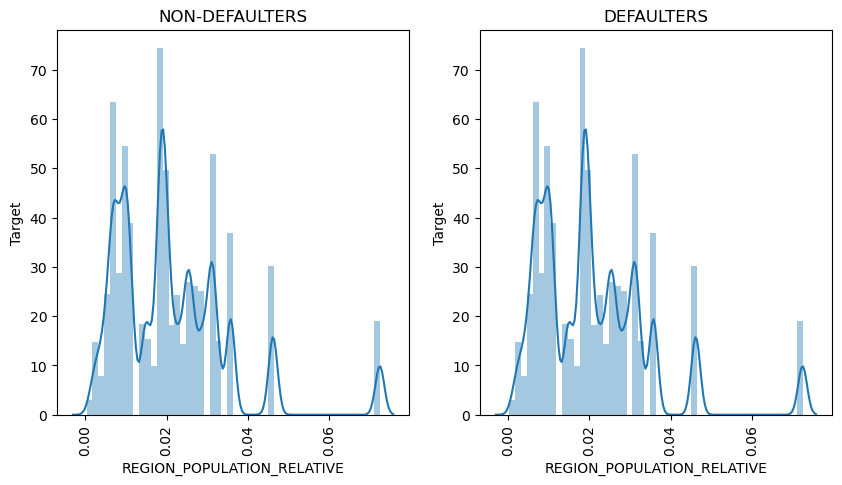

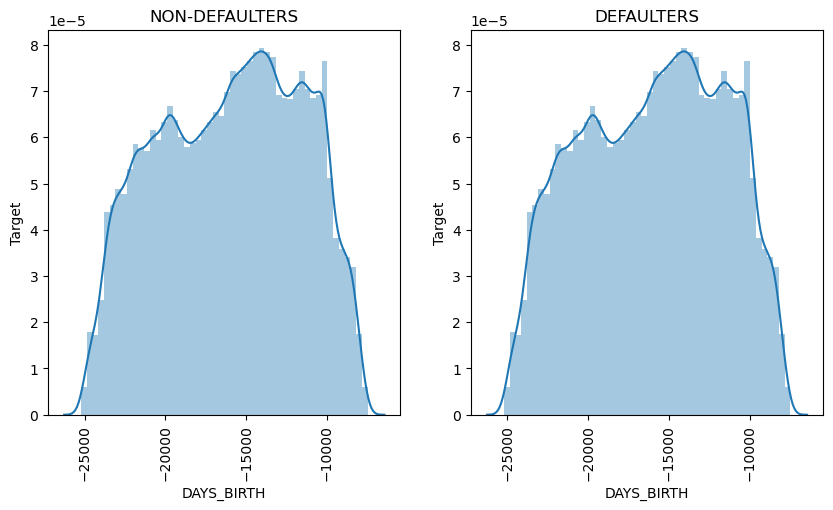

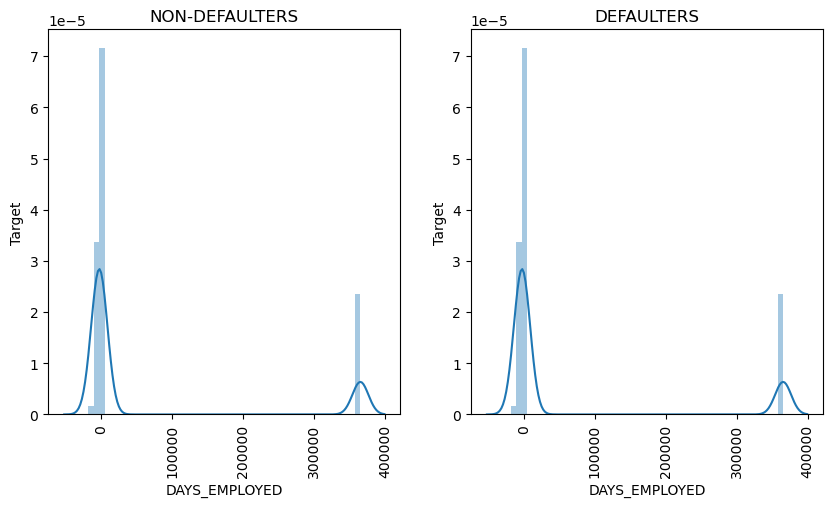

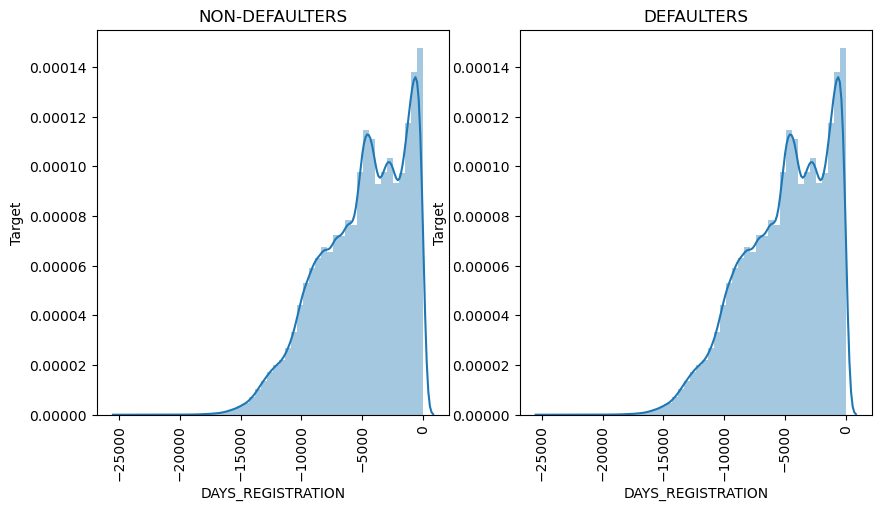

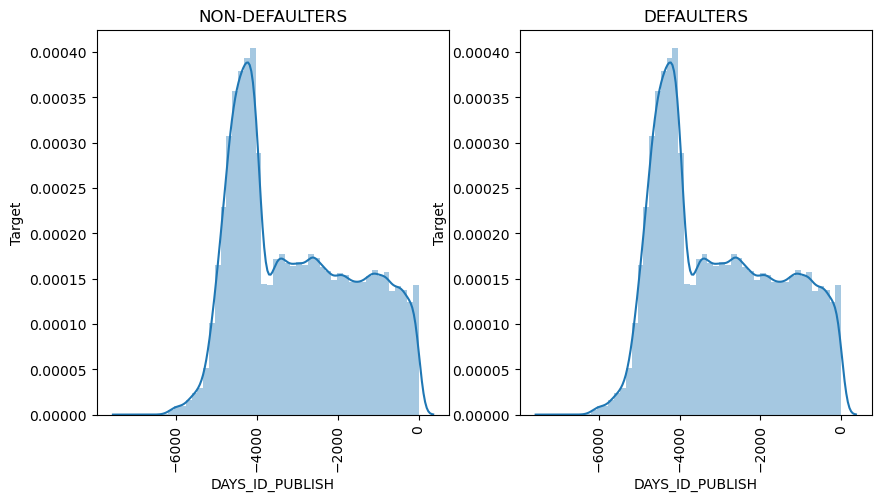

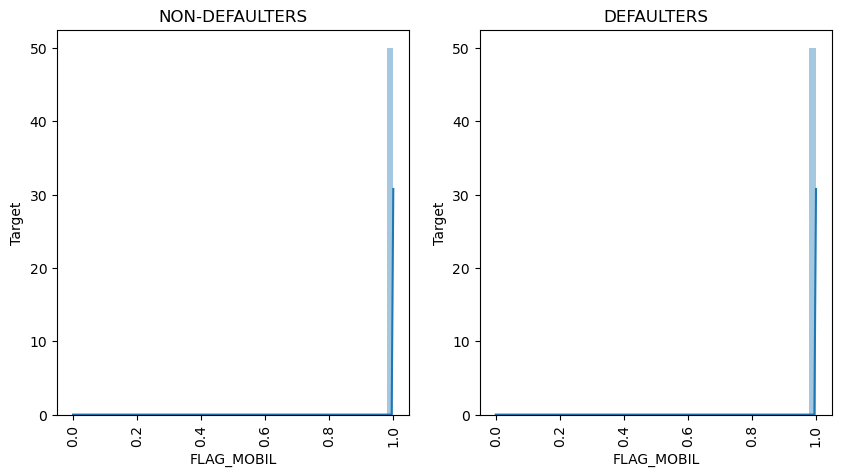

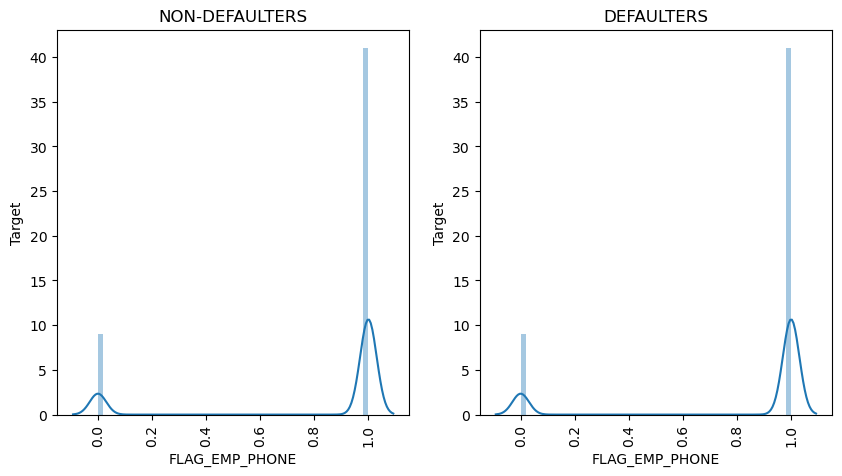

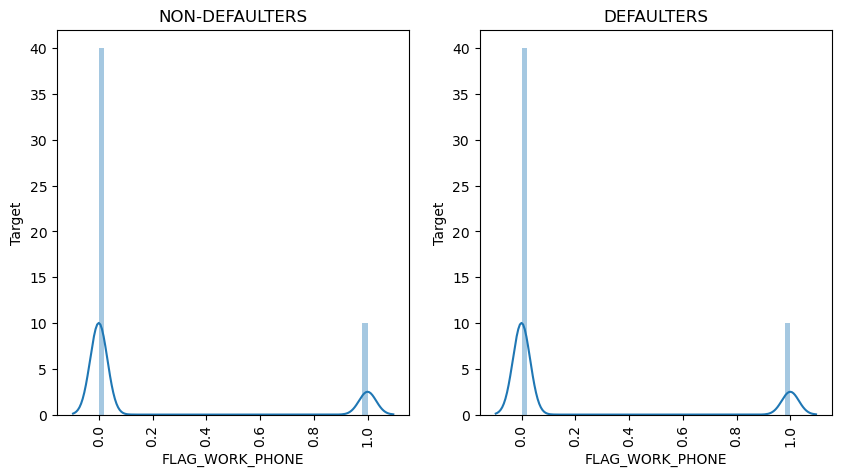

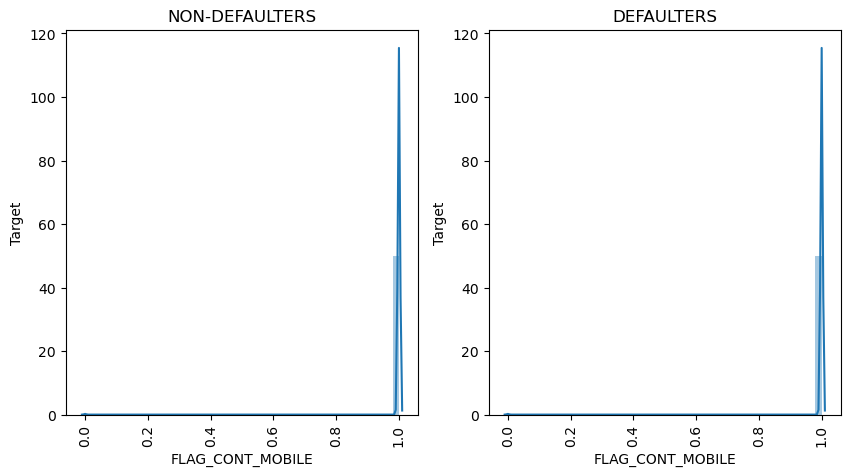

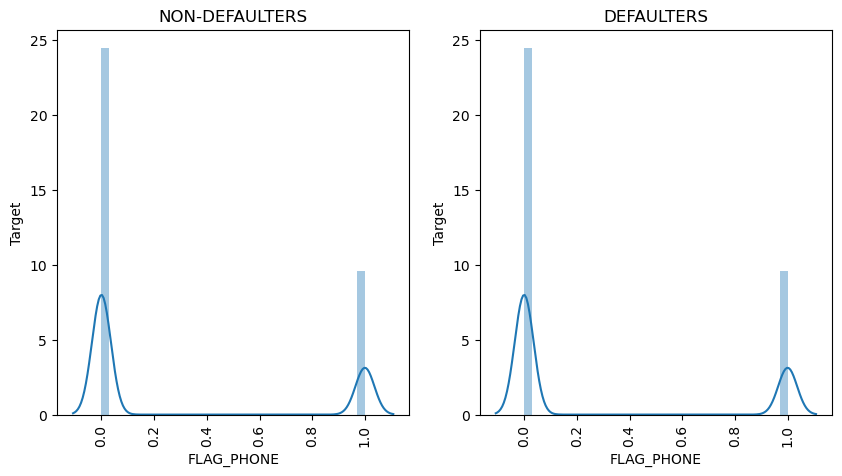

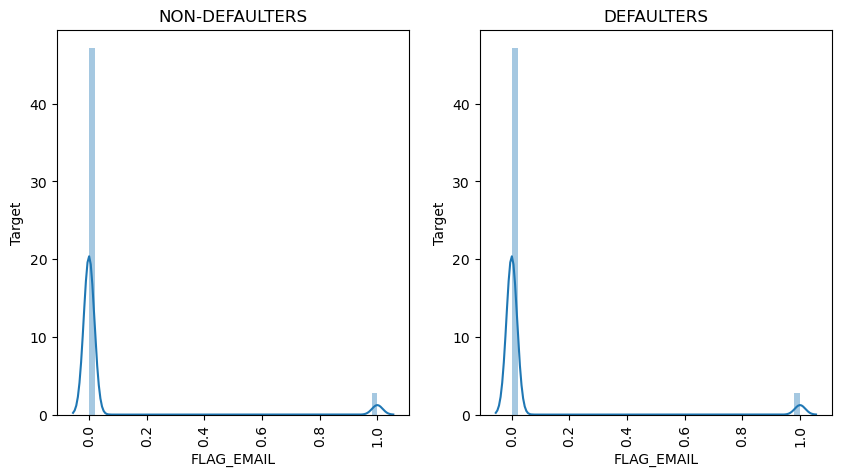

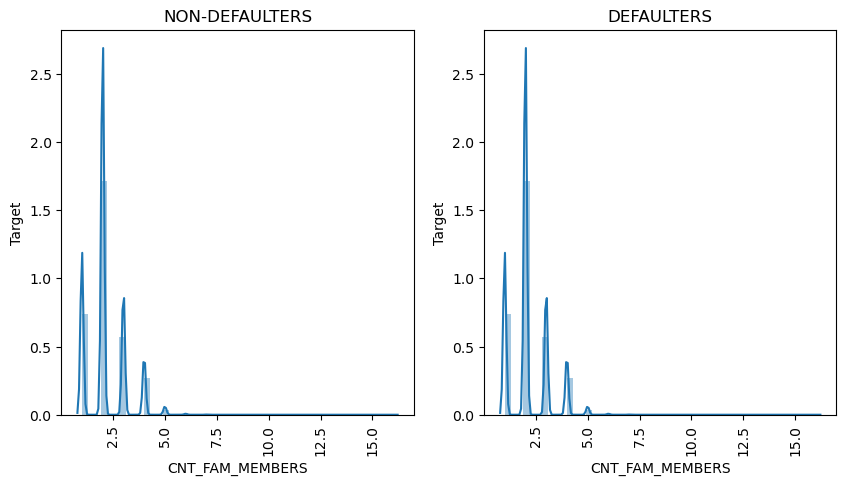

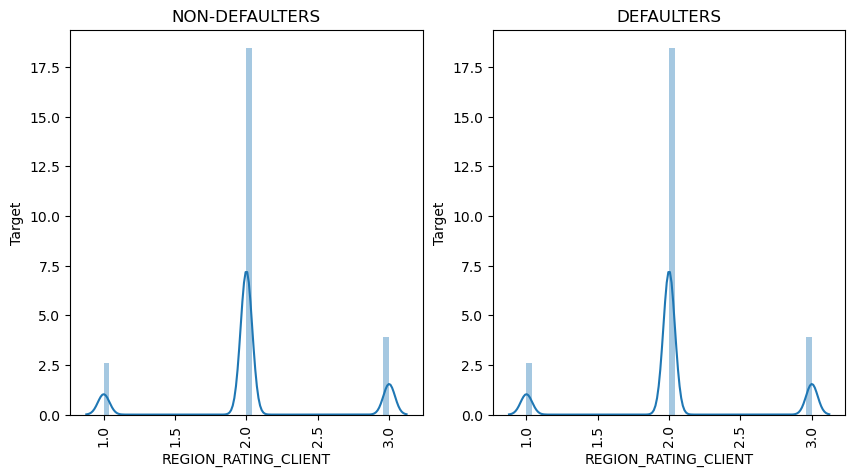

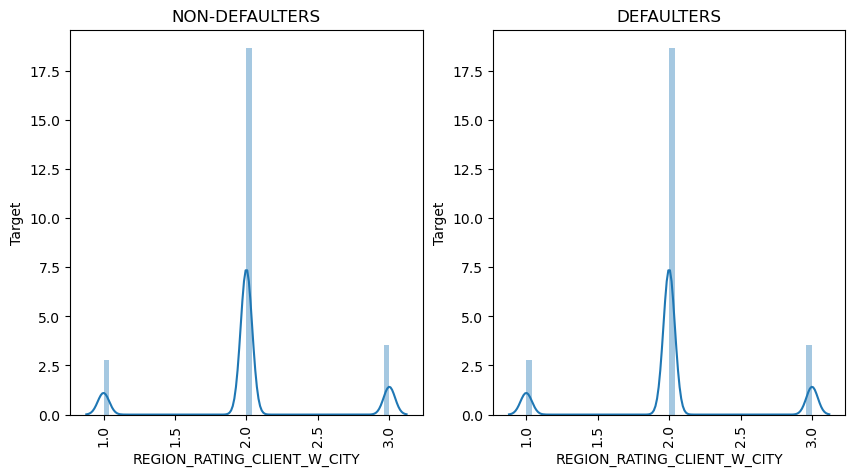

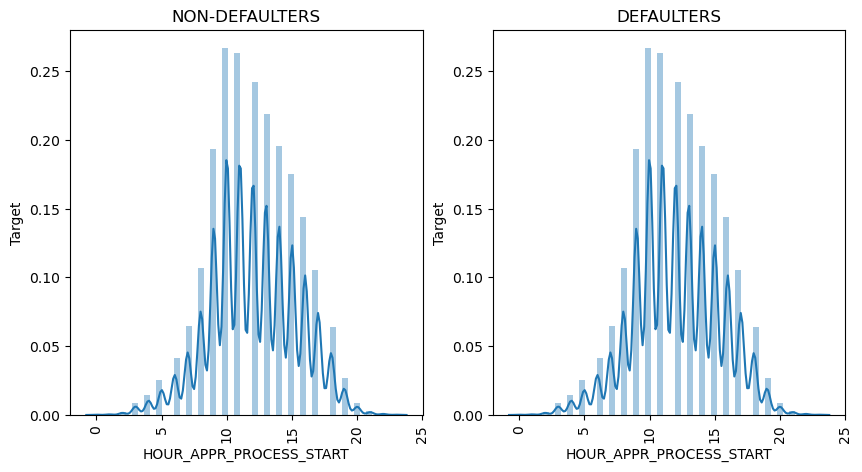

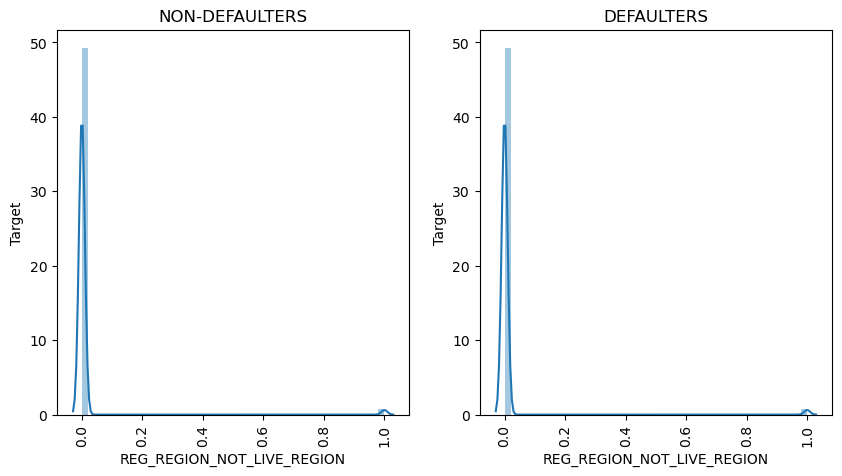

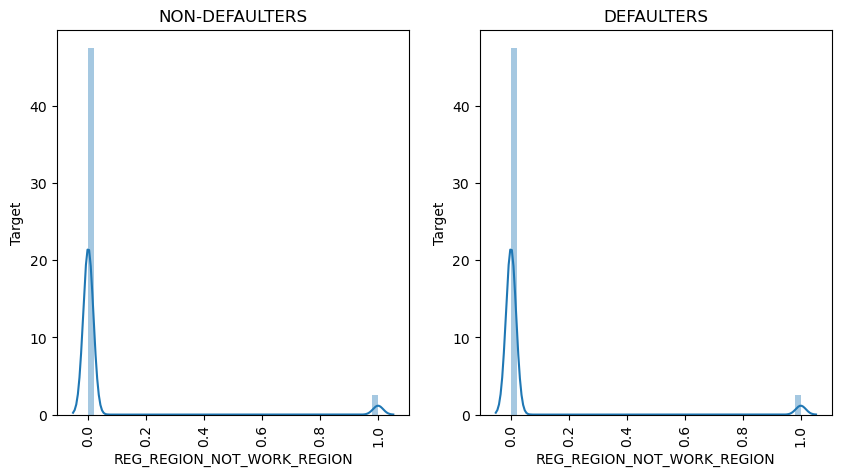

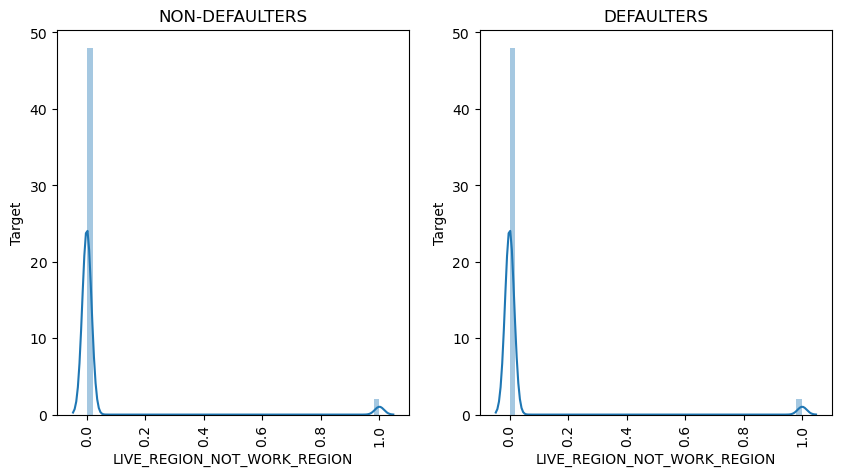

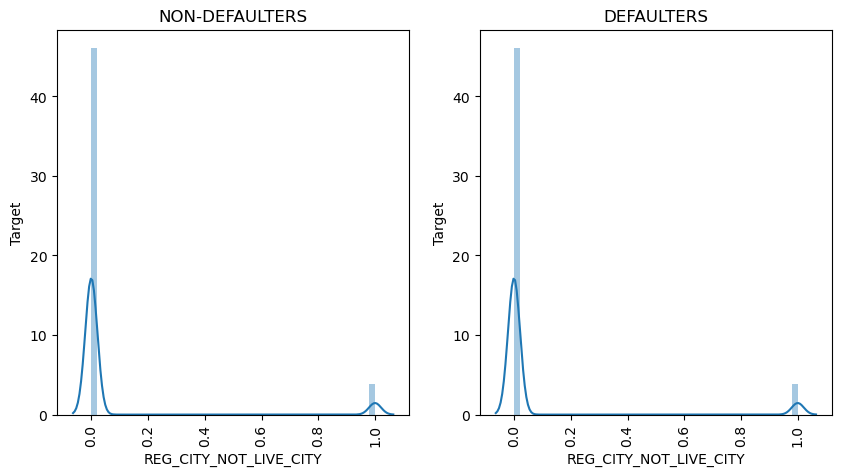

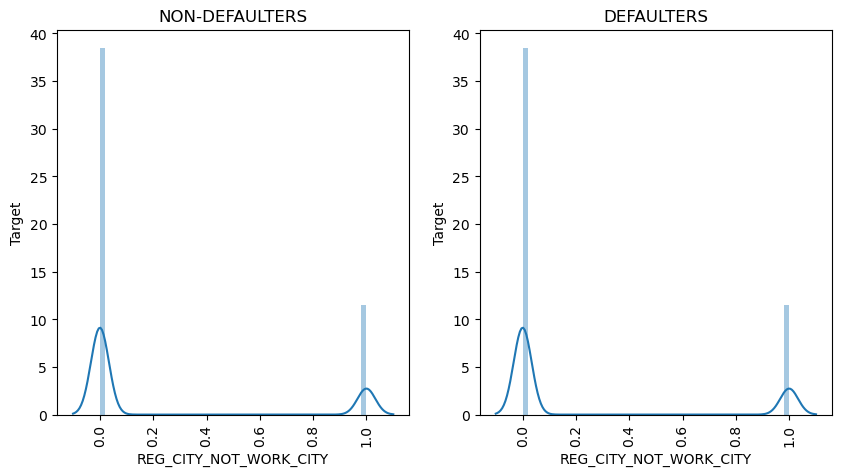

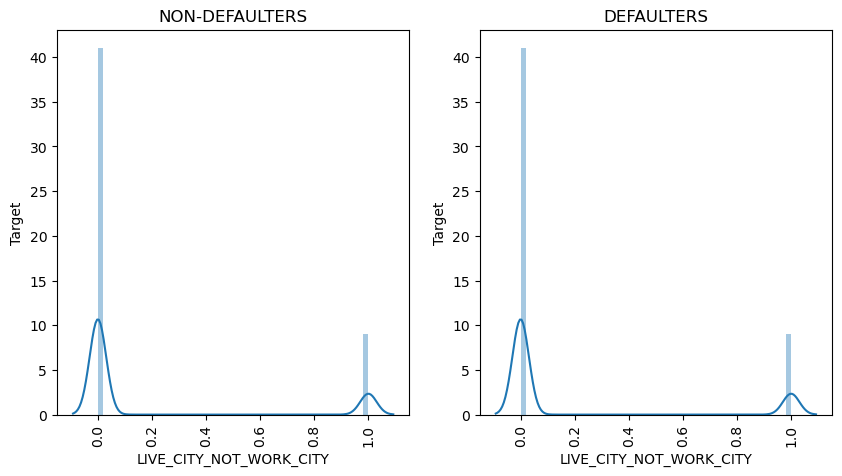

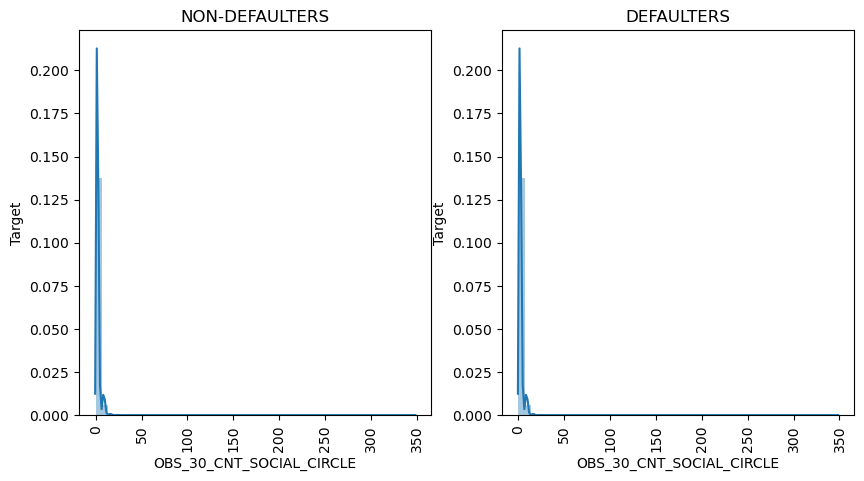

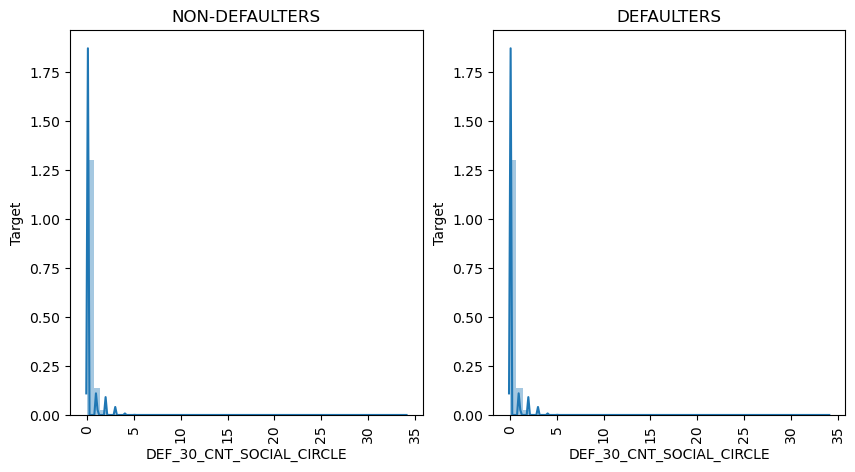

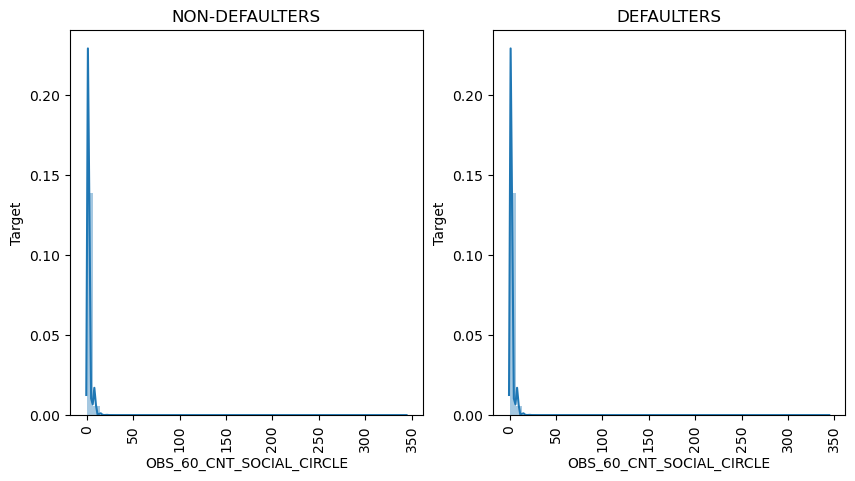

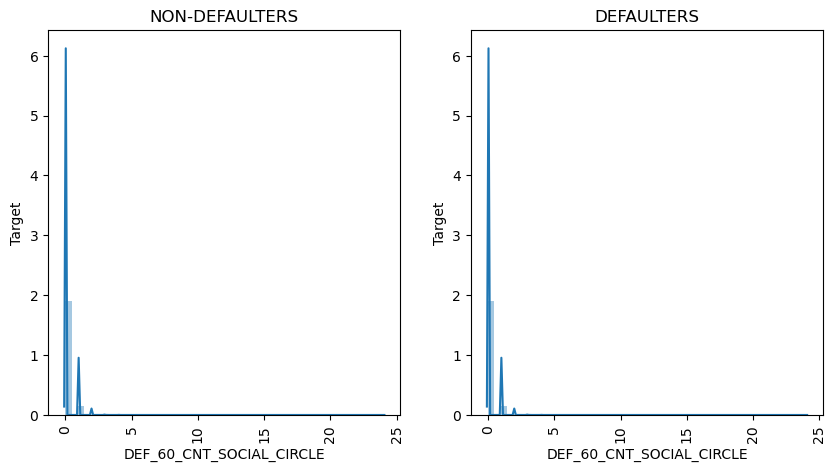

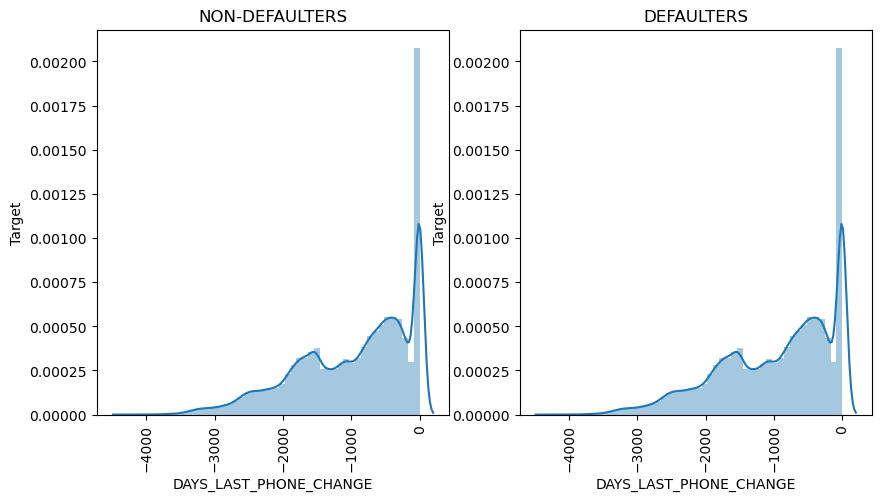

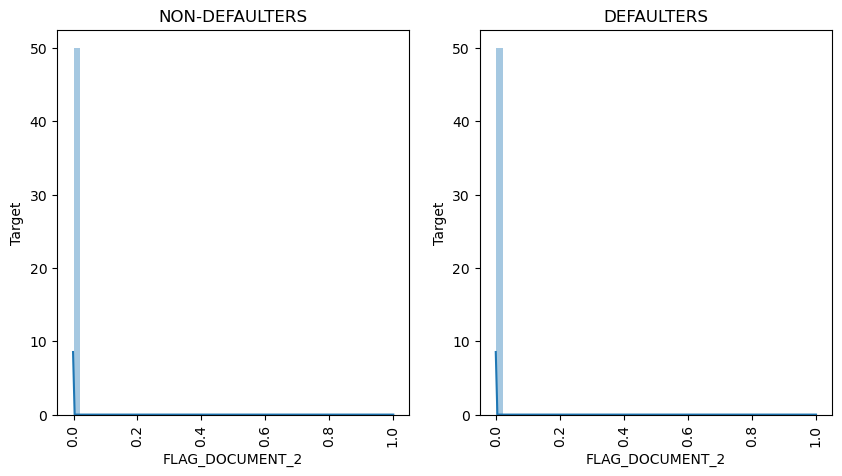

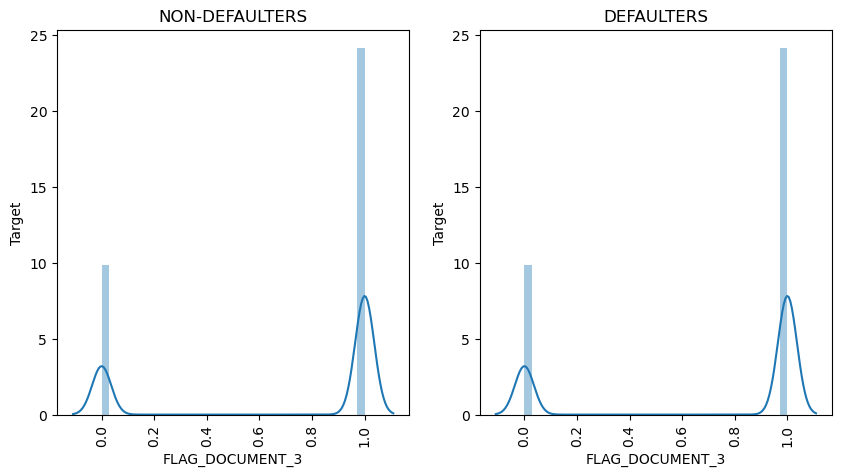

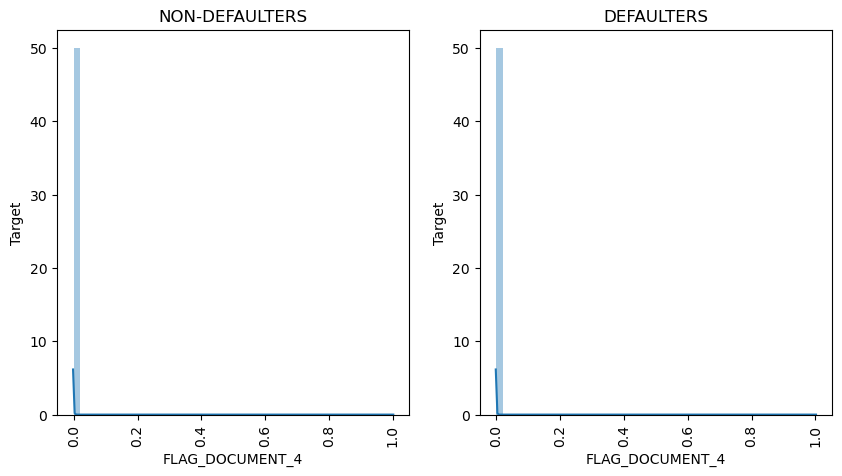

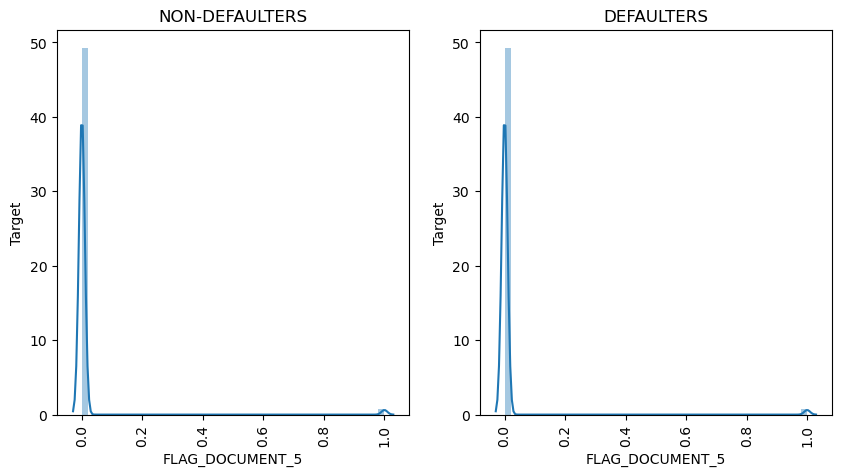

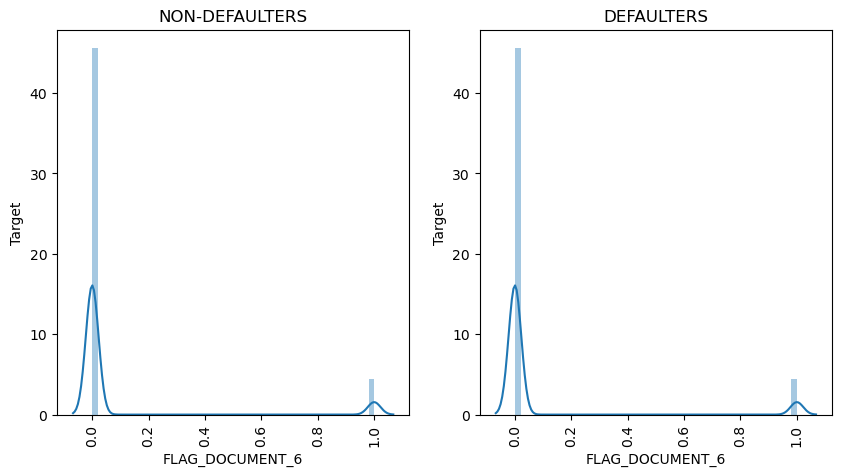

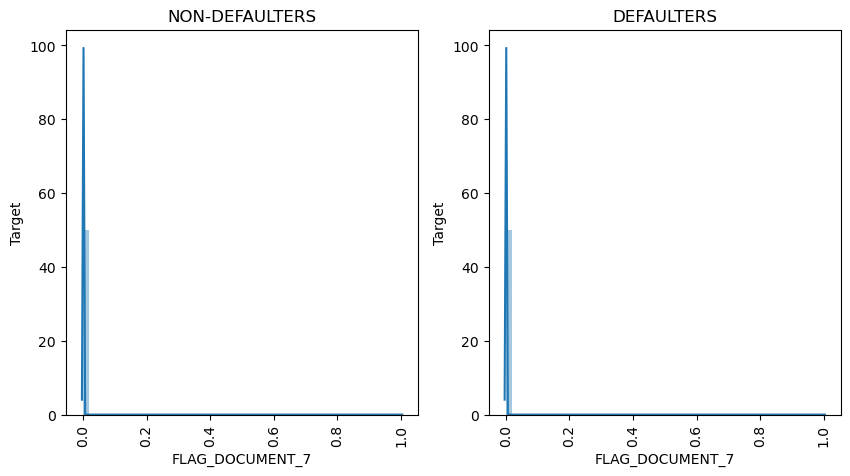

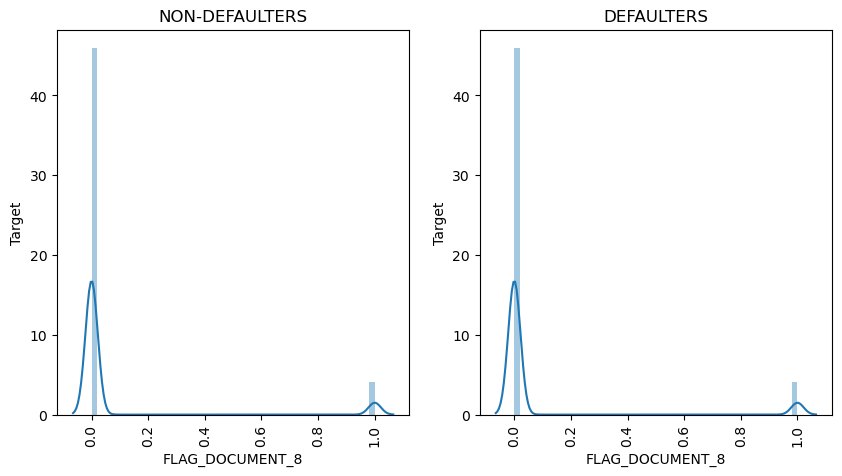

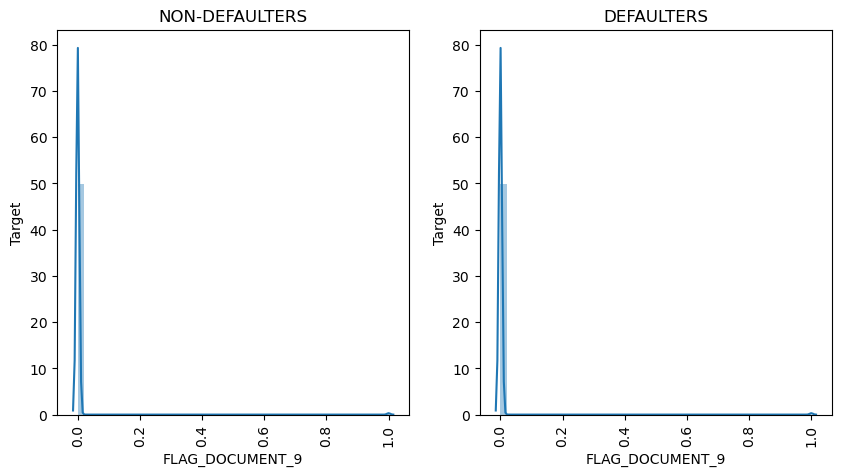

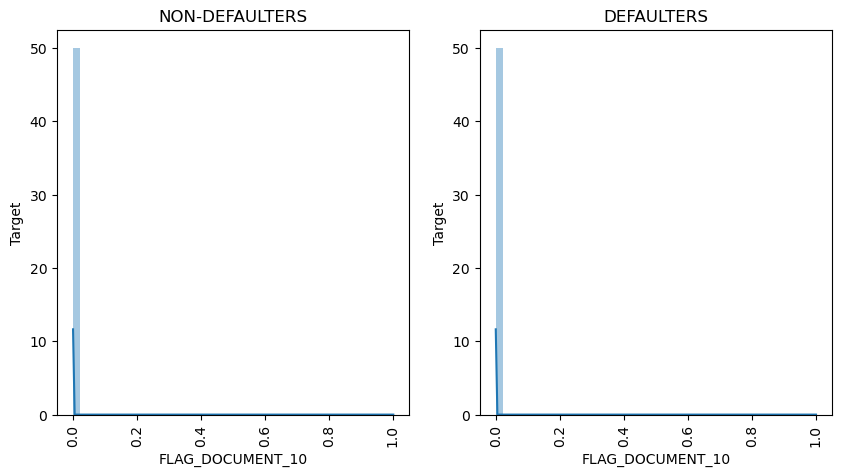

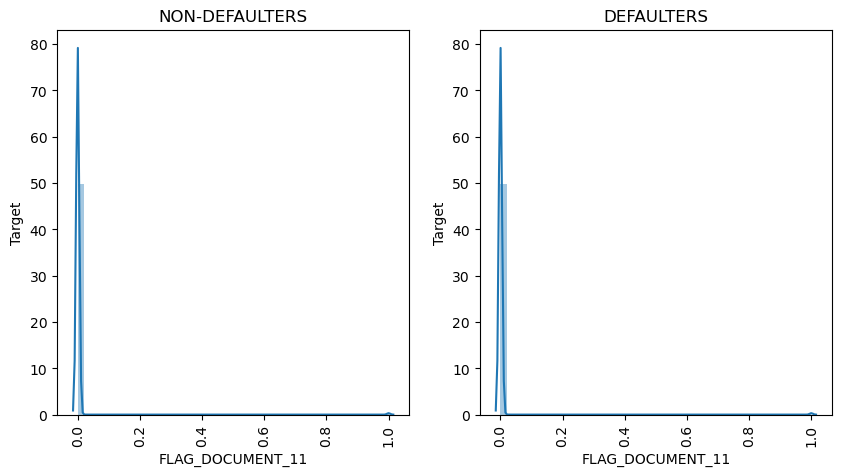

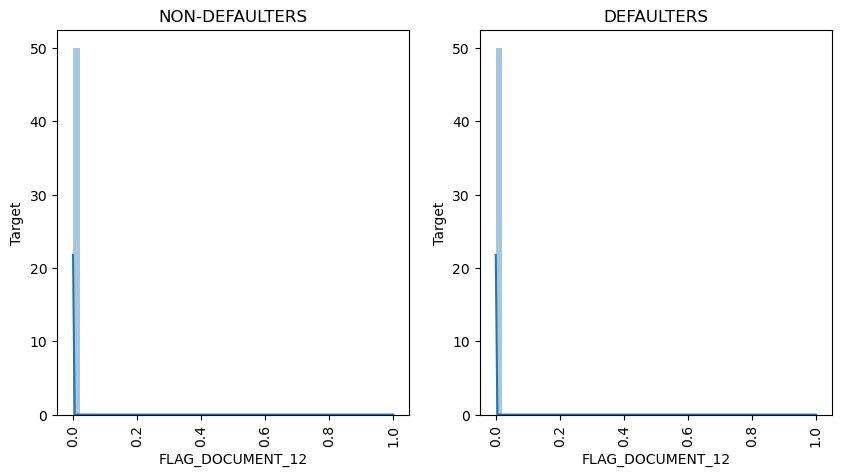

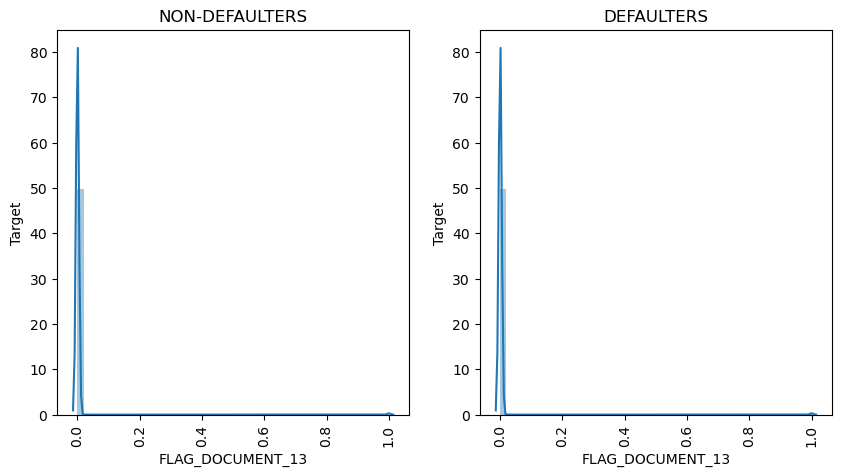

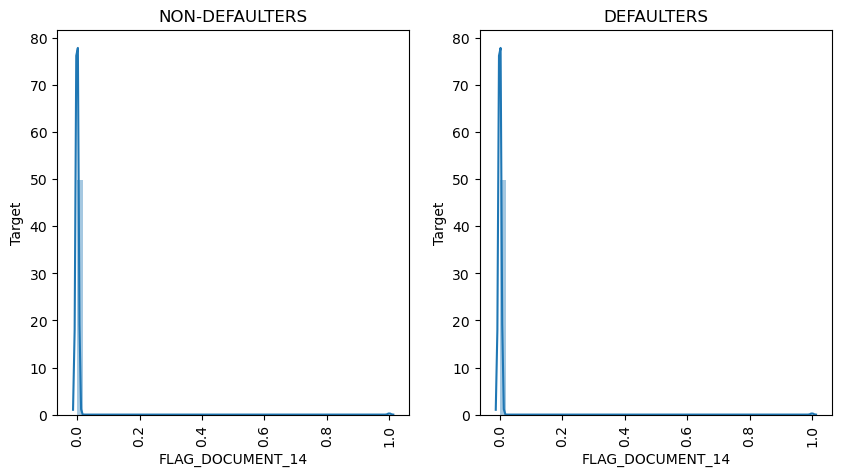

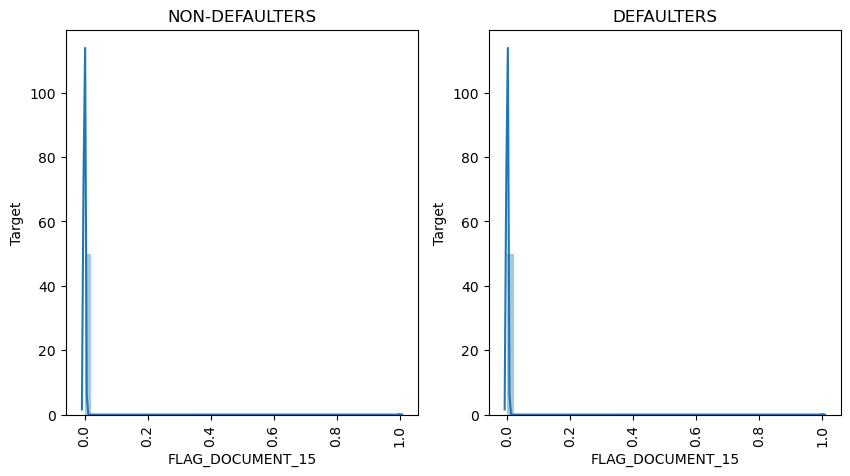

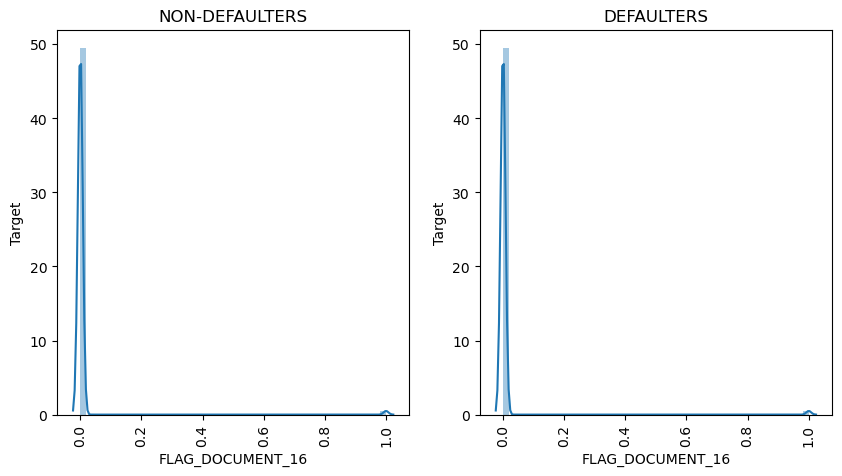

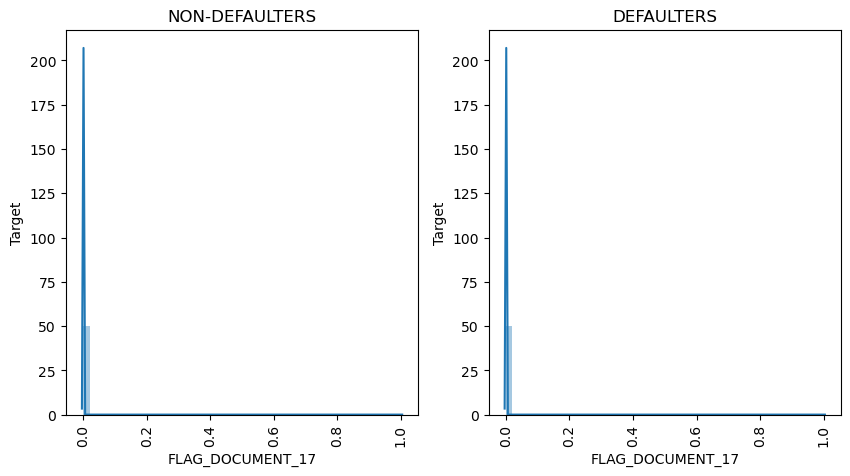

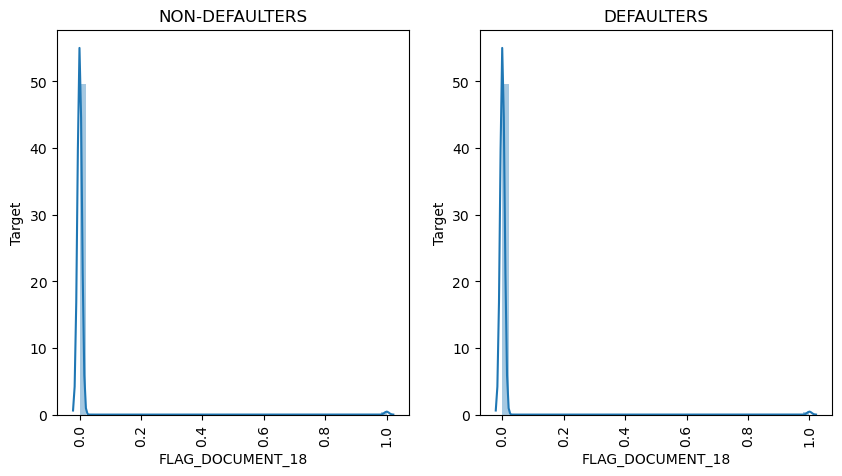

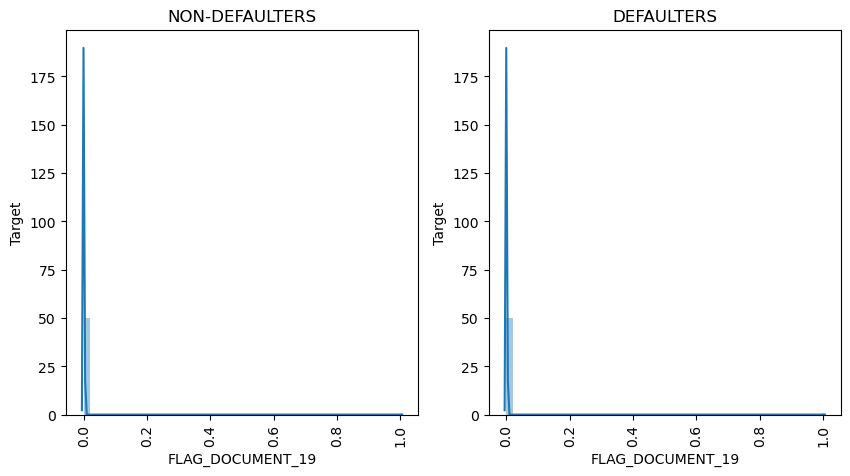

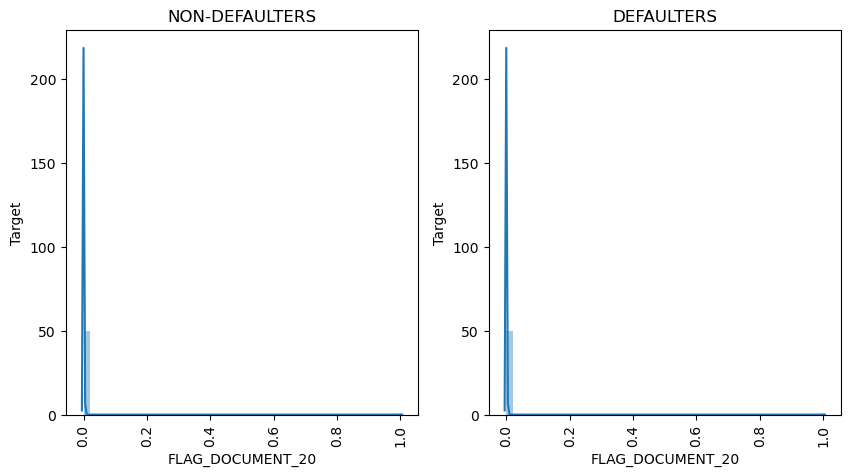

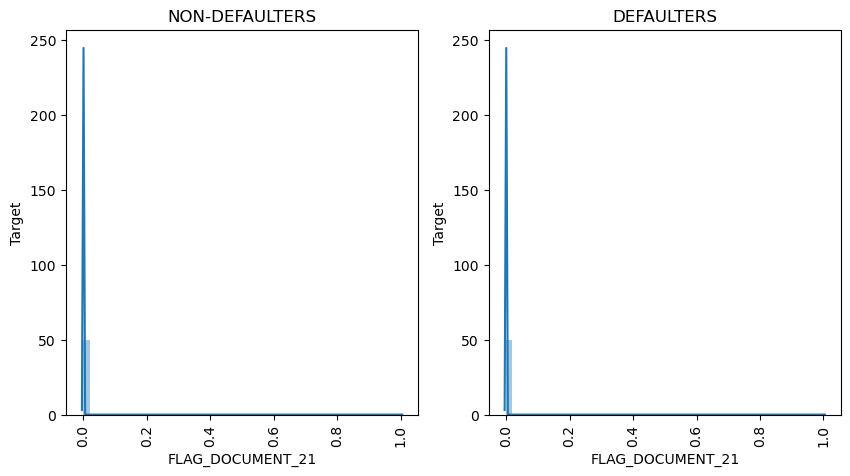

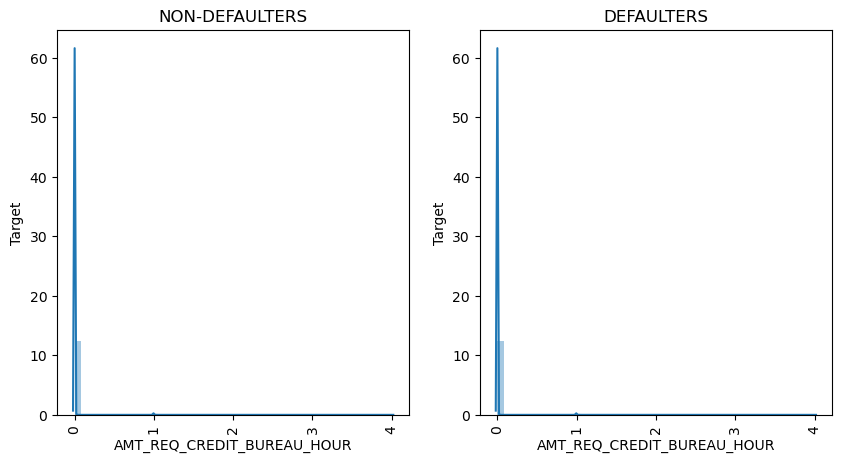

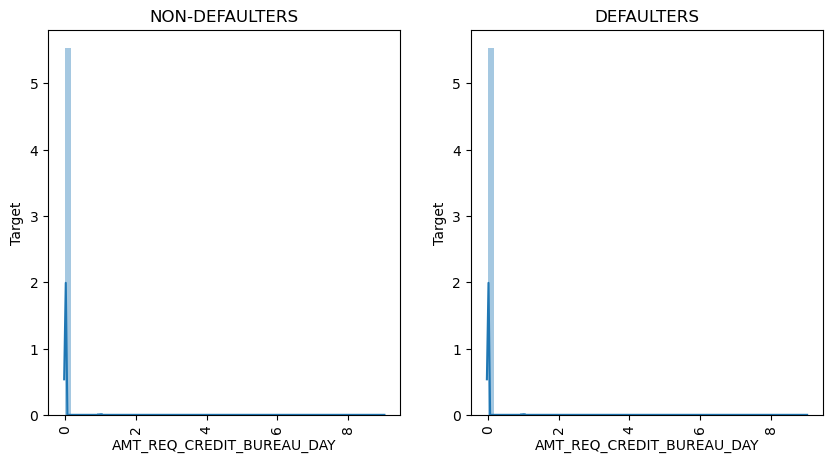

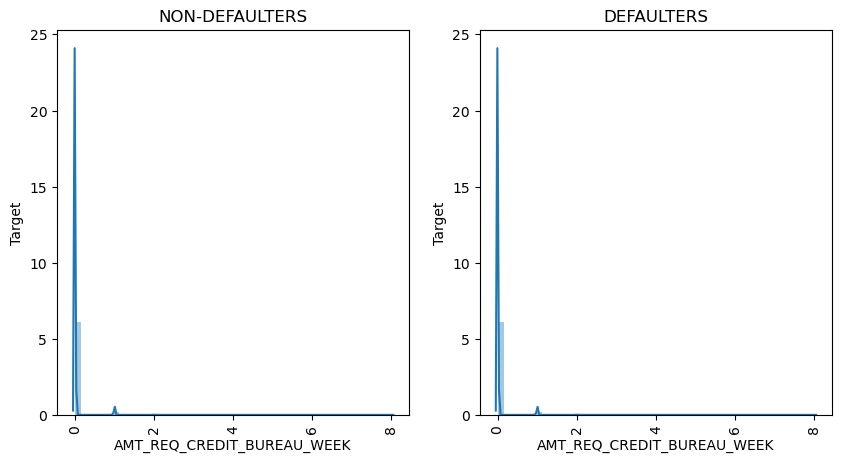

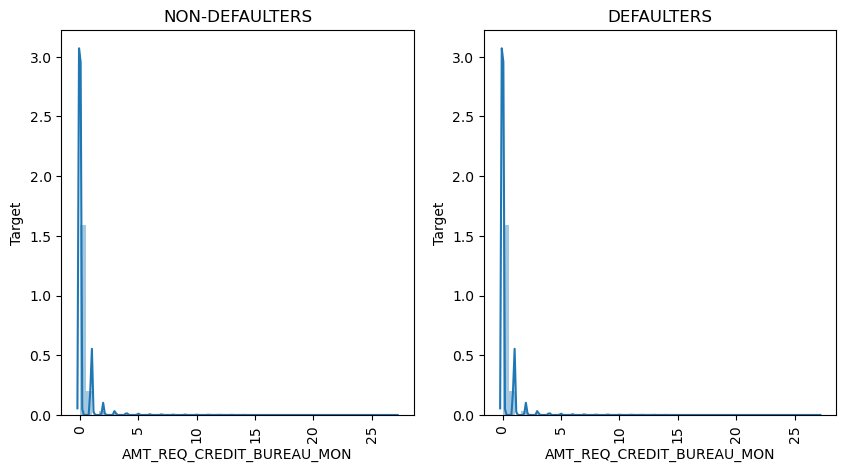

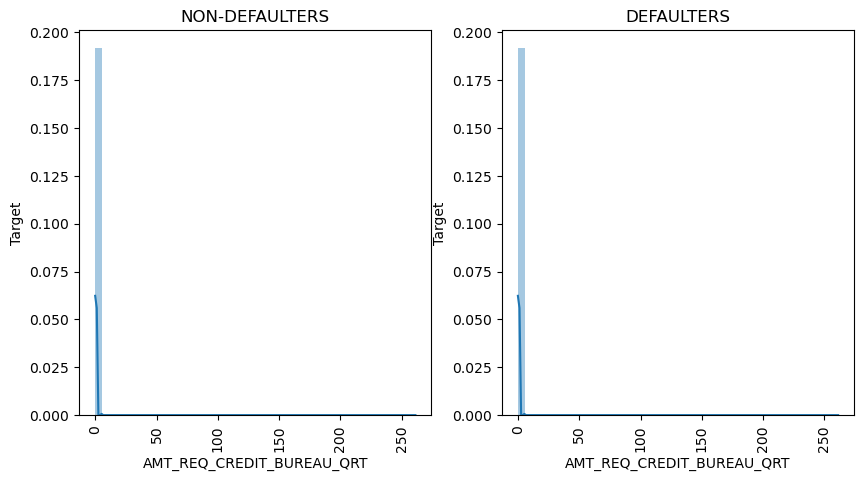

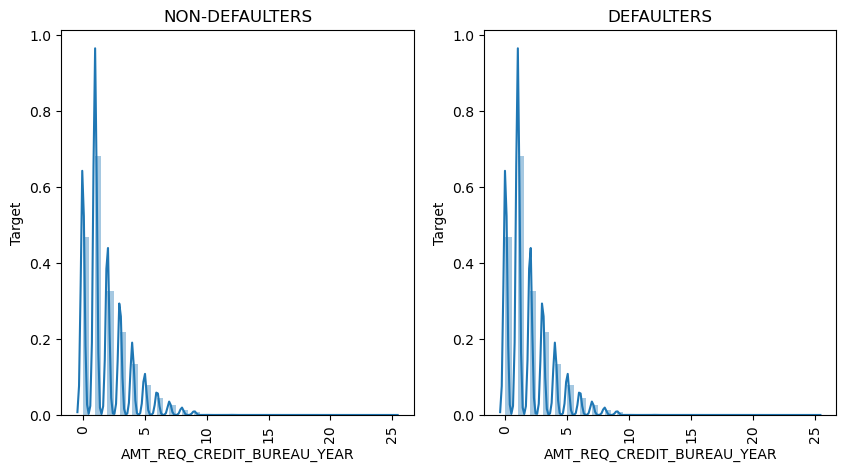

In [128]:
# plot a distplot of numerical columns with respect to TARGET variable

for i in num_cols:
    plt.figure(figsize = [10,5] )
    plt.subplot(1,2,1)
    sns.distplot(target_0 , x = application[i])
    plt.title("NON-DEFAULTERS")
    plt.xlabel(i)
    plt.ylabel("Target")
    plt.xticks(rotation = 90)
    plt.subplot(1,2,2)
    sns.distplot(target_1 , x = application[i])
    plt.title("DEFAULTERS")
    plt.xlabel(i)
    plt.ylabel("Target")
    plt.xticks(rotation = 90)
    plt.show()

bivariate analysis of categorical columns in application data

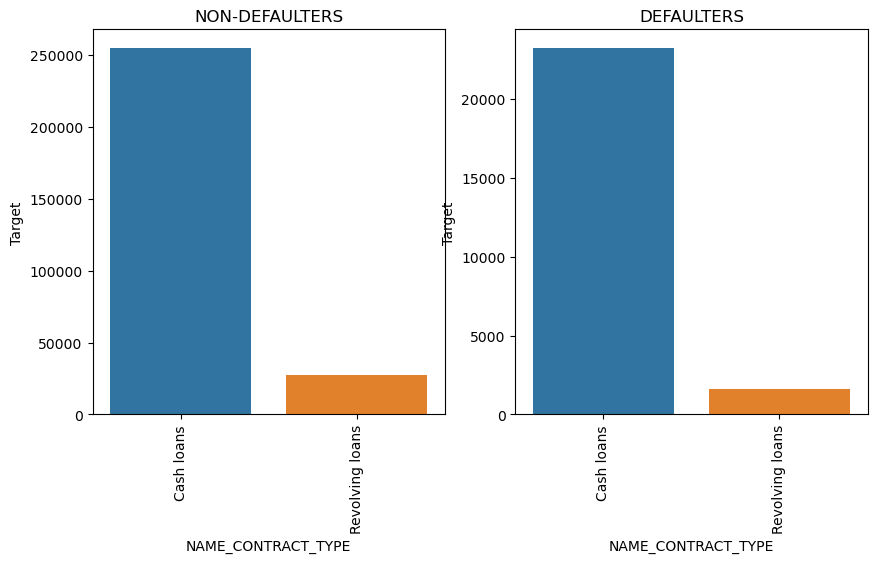

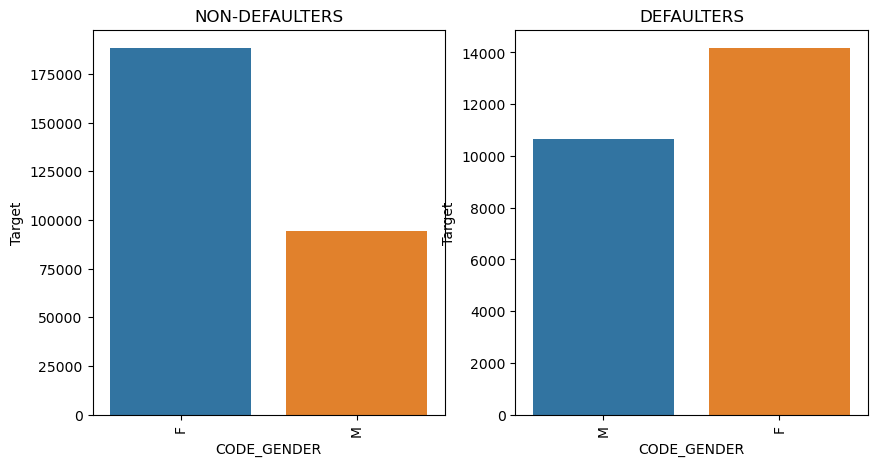

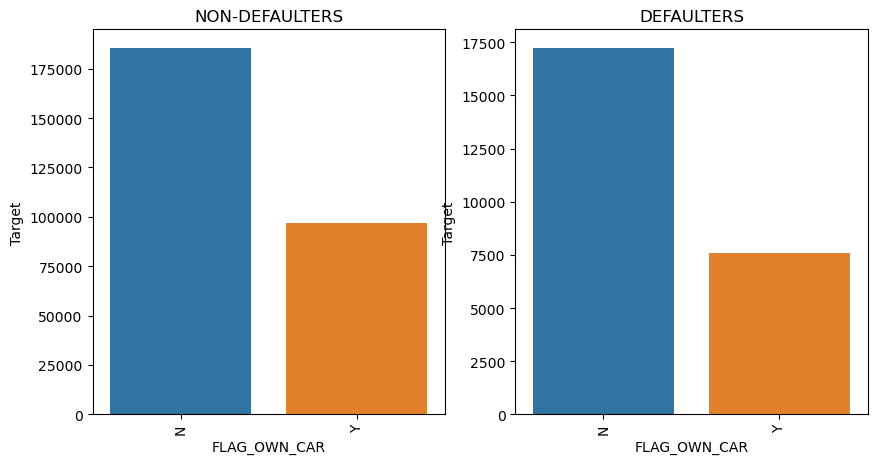

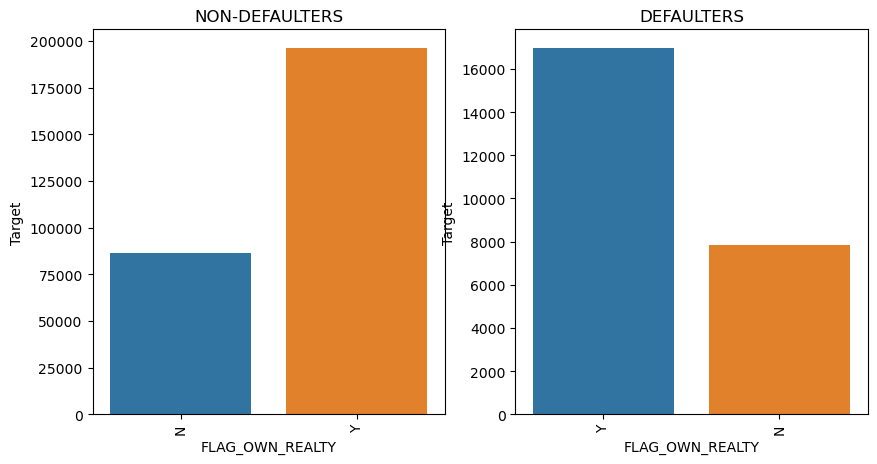

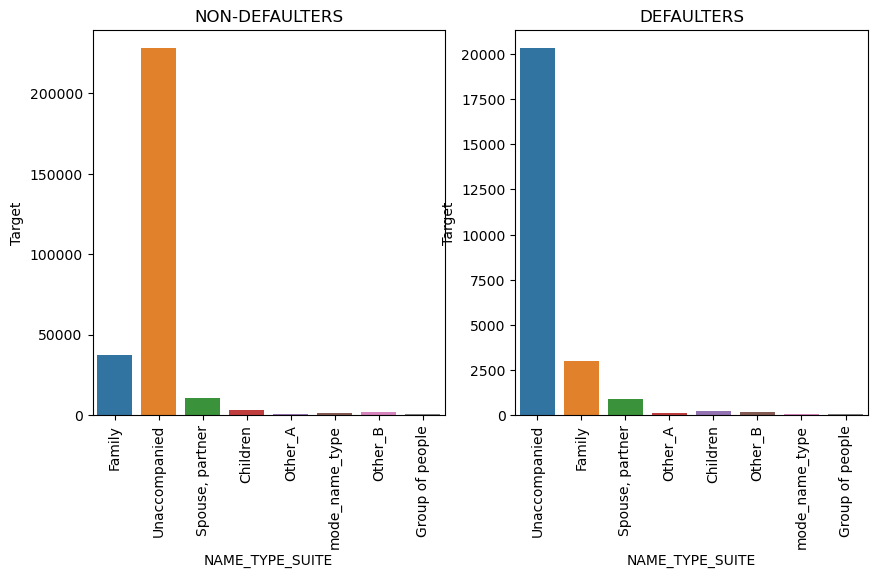

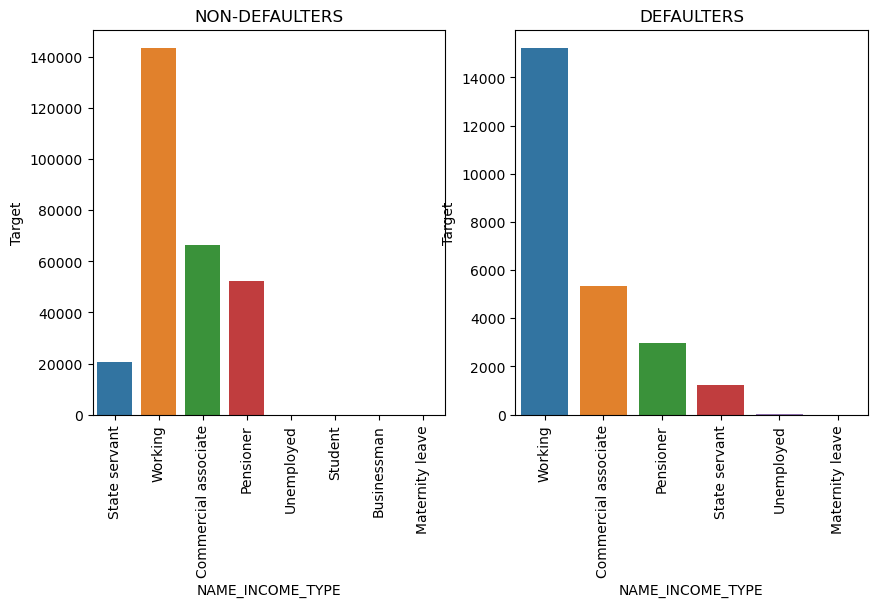

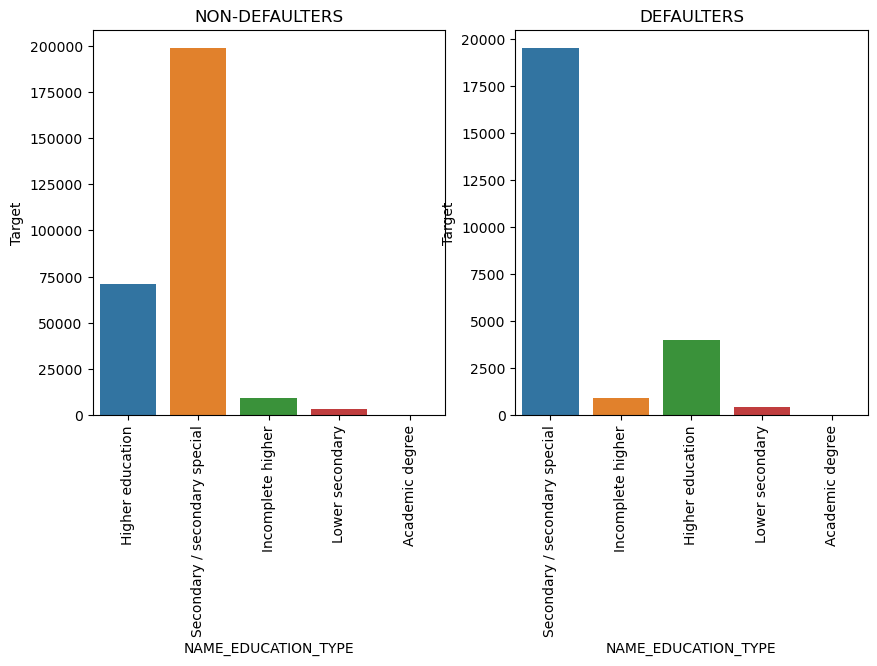

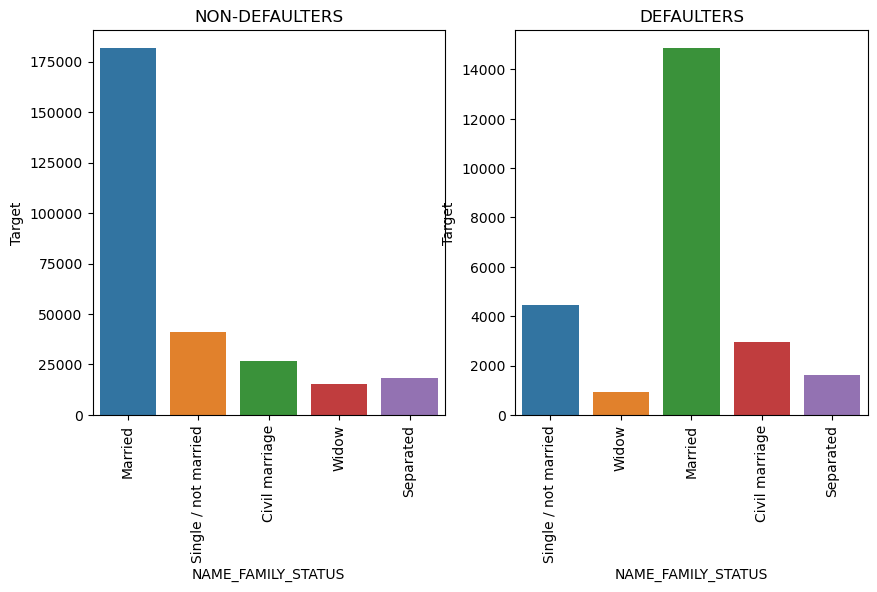

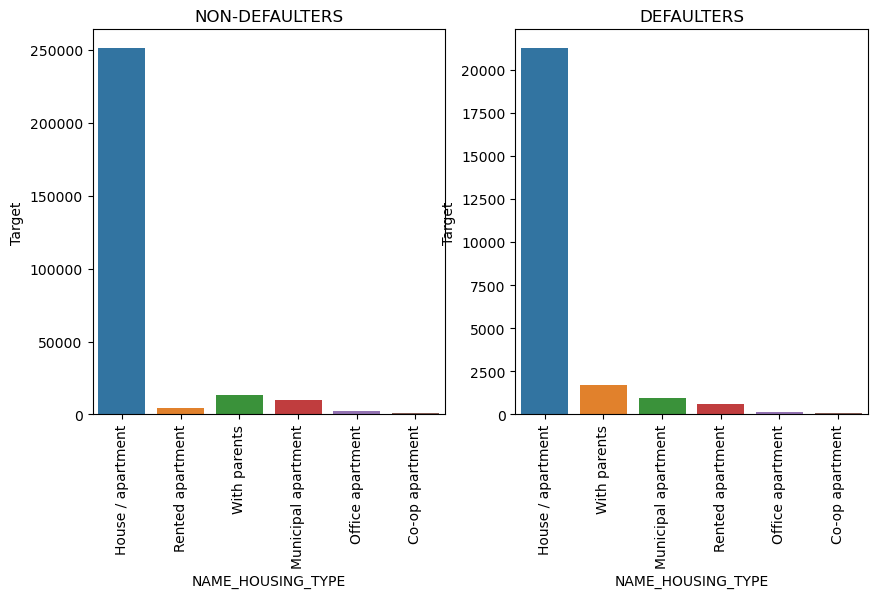

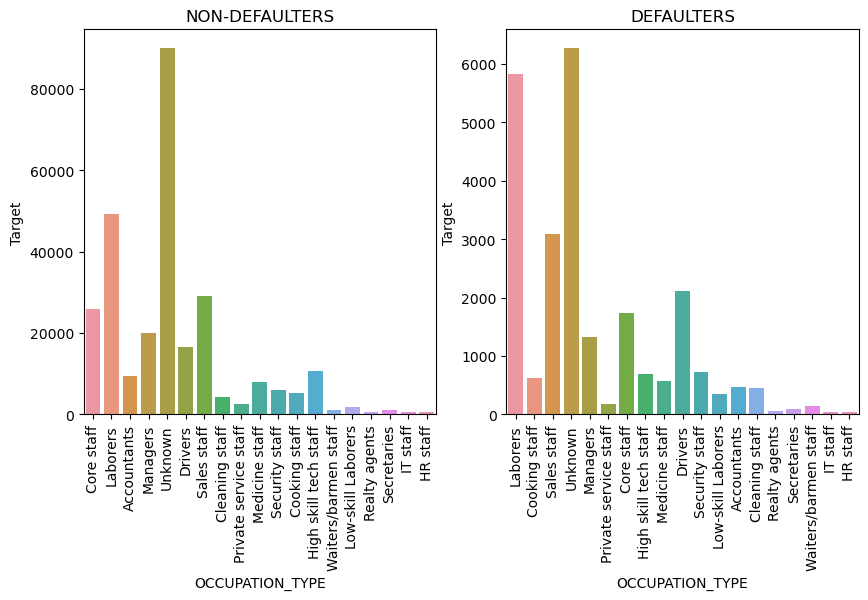

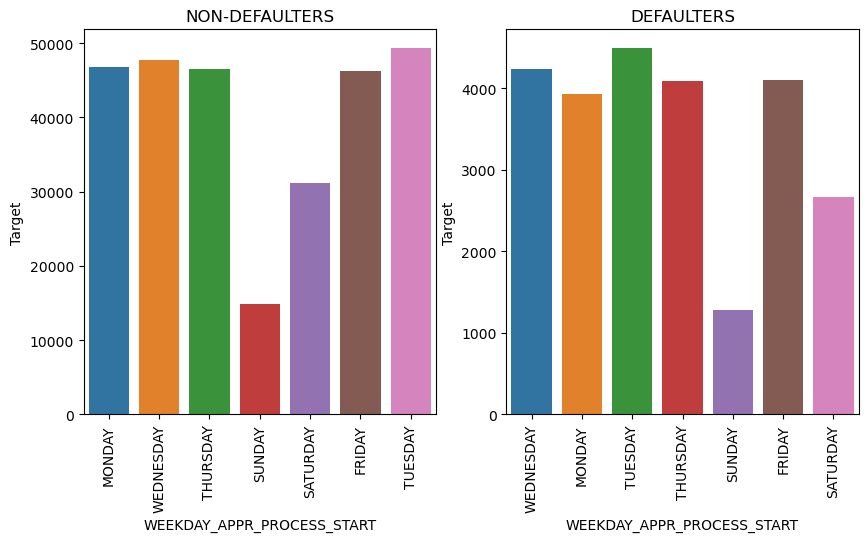

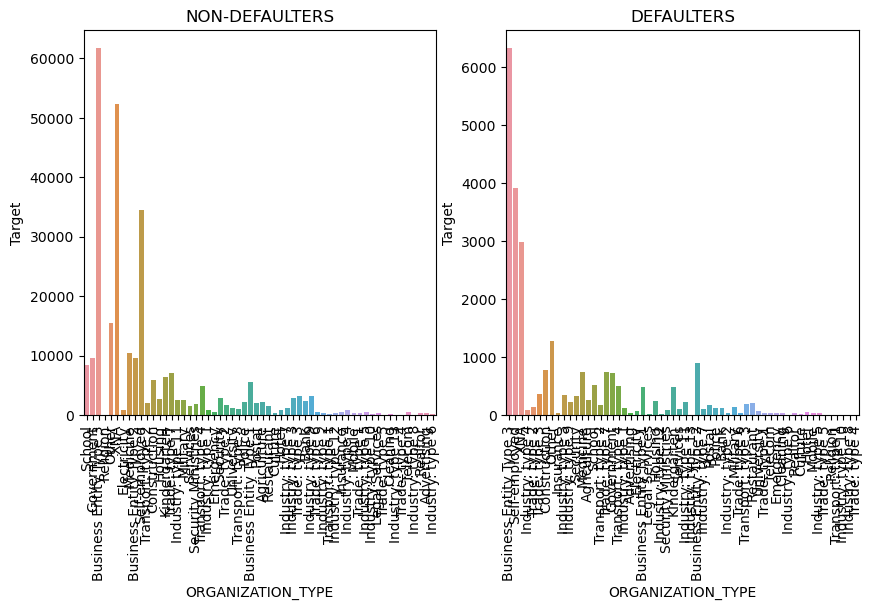

In [129]:
# plot countplot for categorical columns with respect to TARGET variable

for i in cat_cols:
    plt.figure(figsize = [10,5] )
    plt.subplot(1,2,1)
    sns.countplot(data = target_0 , x=target_0[i])
    plt.title("NON-DEFAULTERS")
    plt.xlabel(i)
    plt.ylabel("Target")
    plt.xticks(rotation = 90)
    plt.subplot(1,2,2)
    sns.countplot(data = target_1 , x=target_1[i])
    plt.title("DEFAULTERS")
    plt.xlabel(i)
    plt.ylabel("Target")
    plt.xticks(rotation = 90)
    plt.show()

## Previous Application dataframe

In [130]:
# print first few rows of previous application dataframe

previous_appln.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

### calculate null percentage from data

In [131]:
# Calculate null percentage from data 

previous_null_values = previous_appln.isnull().sum()/len(previous_appln)*100
previous_null_values

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [132]:
# sort values to get columns with high null percentage on top

previous_null_values.sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

#### Dropping the columns which have null values more than or equal to 40%

In [133]:
# Dropping the columns which have null values more than or equal to 40%

previous_appln.drop(["RATE_INTEREST_PRIVILEGED",
"RATE_INTEREST_PRIMARY",          
"AMT_DOWN_PAYMENT",               
"RATE_DOWN_PAYMENT",              
"NAME_TYPE_SUITE",                
"NFLAG_INSURED_ON_APPROVAL",      
"DAYS_TERMINATION",               
"DAYS_LAST_DUE",                  
"DAYS_LAST_DUE_1ST_VERSION",      
"DAYS_FIRST_DUE",                 
"DAYS_FIRST_DRAWING"], axis = 1 , inplace = True)

In [134]:
# check shape

previous_appln.shape

(1670214, 26)

In [135]:
previous_appln.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved            -73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved           -164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved           -301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved           -512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high

In [136]:
# calculate null percentage the columns after dropping the columns

previous_appln.isnull().sum()/len(previous_appln)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [205]:
# get null count

previous_appln.isnull().sum().sort_values(ascending = False)

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_YIELD_GROUP               0
CNT_PAYMENT                    0
NAME_SELLER_INDUSTRY           0
SELLERPLACE_AREA               0
CHANNEL_TYPE                   0
NAME_PRODUCT_TYPE              0
NAME_PORTFOLIO                 0
NAME_GOODS_CATEGORY            0
NAME_CLIENT_TYPE               0
CODE_REJECT_REASON             0
NAME_PAYMENT_TYPE              0
DAYS_DECISION                  0
NAME_CONTRACT_STATUS           0
NAME_CASH_LOAN_PURPOSE         0
NFLAG_LAST_APPL_IN_DAY         0
FLAG_LAST_APPL_PER_CONTRACT    0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
AMT_GOODS_PRICE                0
AMT_CREDIT                     0
AMT_APPLICATION                0
AMT_ANNUITY                    0
NAME_CONTRACT_TYPE             0
PRODUCT_COMBINATION            0
dtype: int64

### Handling Missing Values

#### Fixing columns after dropping

#### AMT_ANNUITY 

In [138]:
# get null count

previous_appln.AMT_ANNUITY.isnull().sum()

372235

In [139]:
# get describe

previous_appln.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

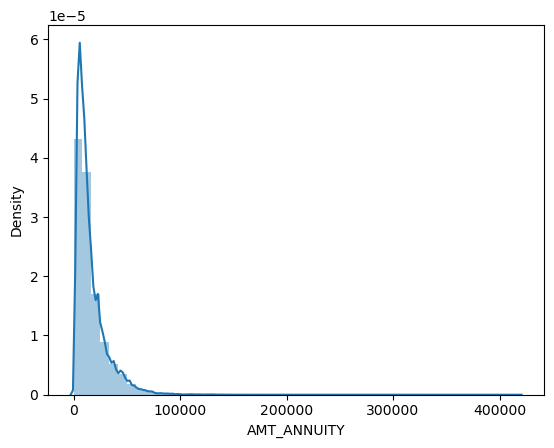

In [140]:
# plot distplot of the column

sns.distplot(previous_appln.AMT_ANNUITY)
plt.show()

As it is right skewed we can fill missing values with mean

In [141]:
# Average values of the column

avg_amt = previous_appln.AMT_ANNUITY.mean()
avg_amt

15955.120659452119

In [142]:
previous_appln["AMT_ANNUITY"] = previous_appln.AMT_ANNUITY.fillna(avg_amt)

In [143]:
# now check the null values after filling with mean

previous_appln.AMT_ANNUITY.isnull().sum()

0

#### AMT_GOODS_PRICE

In [144]:
# get null count

previous_appln.AMT_GOODS_PRICE.isnull().sum()

385515

In [145]:
# get describe

previous_appln.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

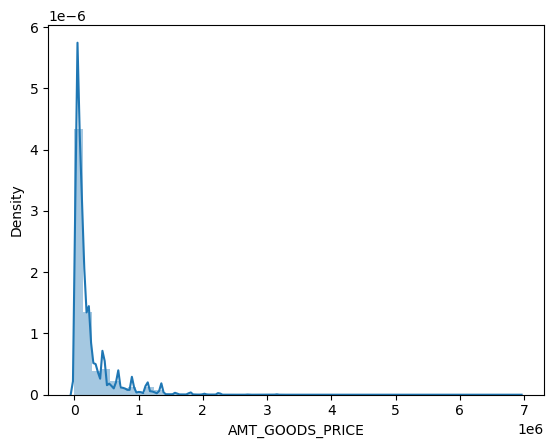

In [146]:
# plot distplot of the column

sns.distplot(previous_appln.AMT_GOODS_PRICE)
plt.show()

impute null values with median

In [147]:
# Calculating median

med_goods_price = previous_appln.AMT_GOODS_PRICE.median()
med_goods_price

112320.0

In [148]:
previous_appln["AMT_GOODS_PRICE"] = previous_appln.AMT_GOODS_PRICE.fillna(med_goods_price)

In [149]:
# now check the null values after filling with median

previous_appln.AMT_GOODS_PRICE.isnull().sum()

0

#### CNT_PAYMENT 

In [150]:
# get null count

previous_appln.CNT_PAYMENT.isnull().sum()

372230

In [151]:
# get describe

previous_appln.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

null values can fill with median

In [152]:
# Calculating median

med_payment = previous_appln.CNT_PAYMENT.median()
med_payment

12.0

In [153]:
previous_appln["CNT_PAYMENT"] = previous_appln.CNT_PAYMENT.fillna(med_payment)

In [154]:
# now check the null values after filling with median

previous_appln.CNT_PAYMENT.isnull().sum()

0

#### PRODUCT_COMBINATION

In [207]:
# get null count of the column
previous_appln.PRODUCT_COMBINATION.isnull().sum()

0

In [156]:
# get value count of the column

previous_appln.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

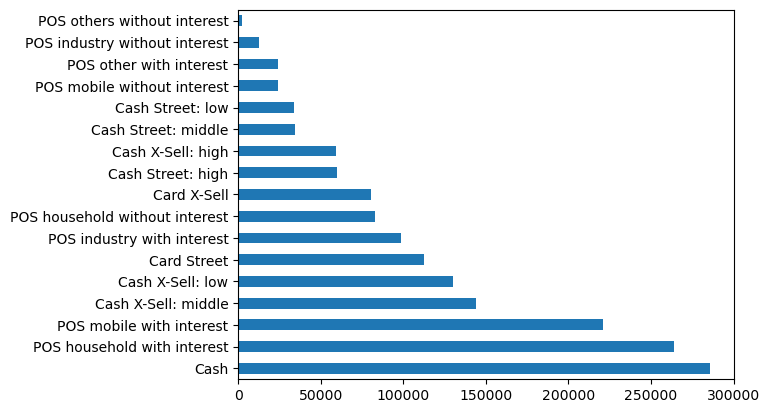

In [157]:
# plot a bar of distribution of PRODUCT_COMBINATION

previous_appln.PRODUCT_COMBINATION.value_counts().plot.barh()
plt.show()

as it is categorical variable u can fill null values with mode

In [158]:
# calculate mode

mode = previous_appln.PRODUCT_COMBINATION.mode()
mode

0    Cash
Name: PRODUCT_COMBINATION, dtype: object

In [159]:
# fill the null values with mode

previous_appln["PRODUCT_COMBINATION"] = previous_appln.PRODUCT_COMBINATION.fillna("mode")

In [160]:
# check null count

previous_appln.PRODUCT_COMBINATION.isnull().sum()

0

#### AMT_CREDIT 

In [161]:
# get null count

previous_appln.AMT_CREDIT.isnull().sum()

1

In [162]:
# get describe

previous_appln.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

impute null values with median

In [163]:
# calculate median

median = previous_appln.AMT_CREDIT.median()
median

80541.0

In [164]:
# fill missing values with median

previous_appln["AMT_CREDIT"] = previous_appln.AMT_CREDIT.fillna(median)

In [165]:
# check null values after imputing

previous_appln.AMT_CREDIT.isnull().sum()

0

In [167]:
# check null count after imputing missing values

previous_appln.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

#### And here we cleaned previous application dataframe

### Identify the outliers in Previous application data 

separate the numerical and categorical columns in previous application data

In [168]:
# print numerical columns from previous application data

pre_num_cols = previous_appln.select_dtypes(exclude = ["object"]).columns.tolist()
pre_num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT']

In [169]:
len(pre_num_cols)

11

In [170]:
# print categorical columns from previous application data
 
pre_cat_cols = previous_appln.select_dtypes(exclude = ["number"]).columns.tolist()
pre_cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [171]:
len(pre_cat_cols)

15

#### let's identify the outliers from numerical variables of previous application data

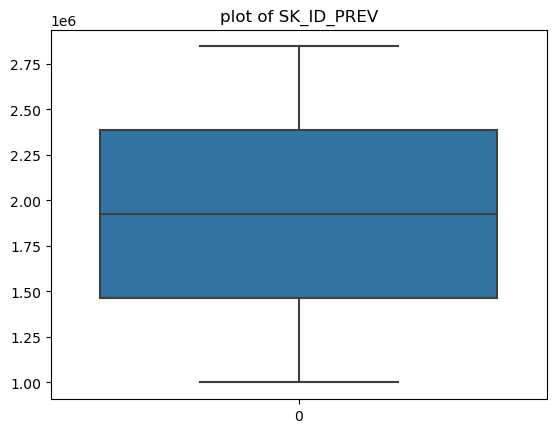

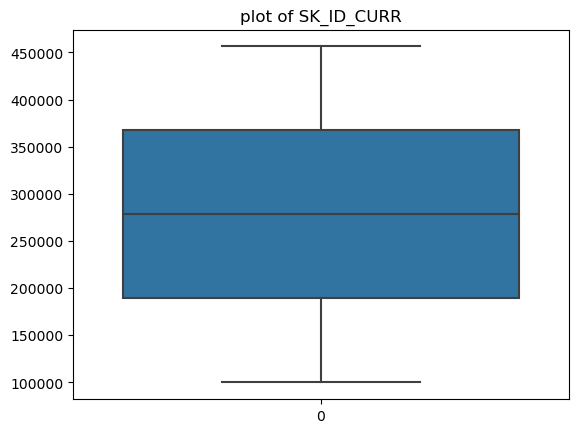

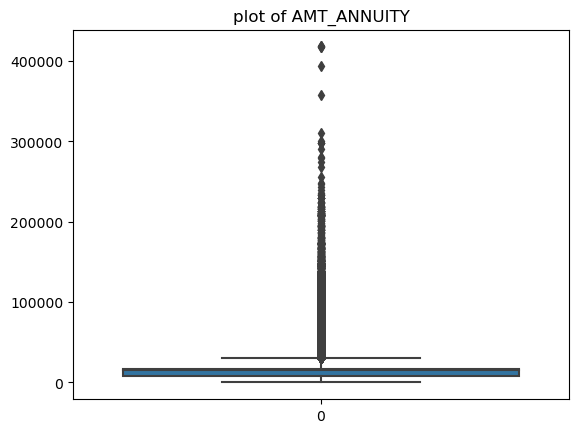

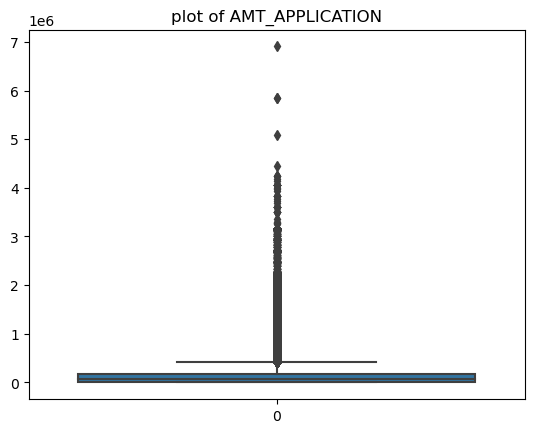

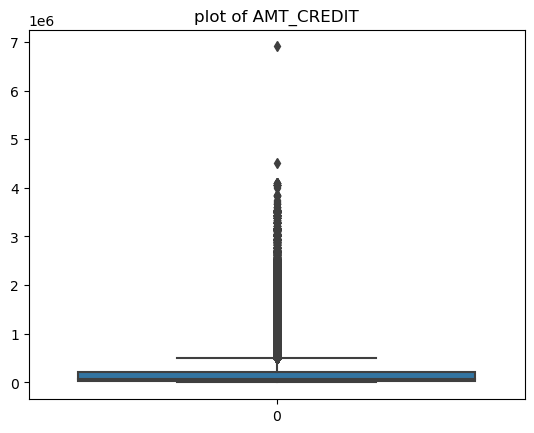

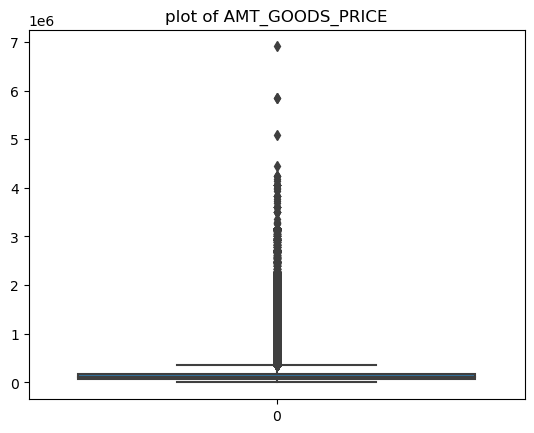

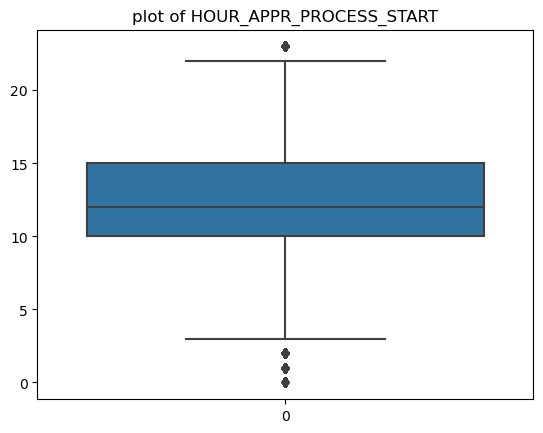

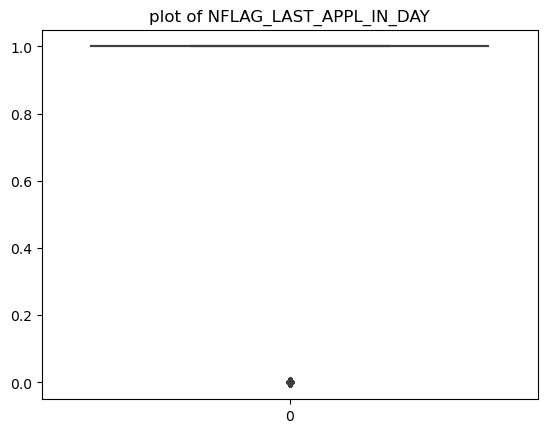

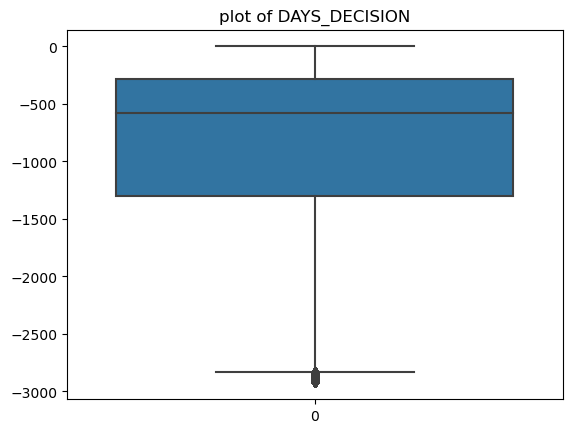

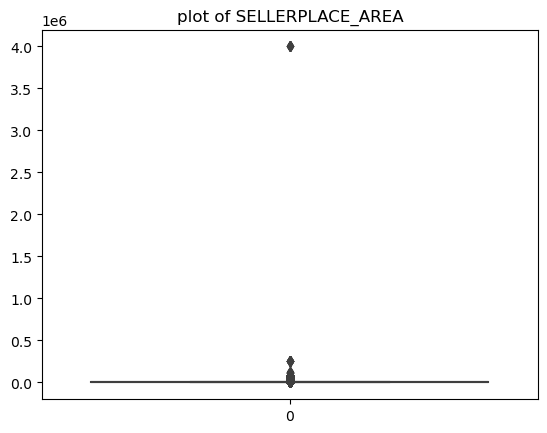

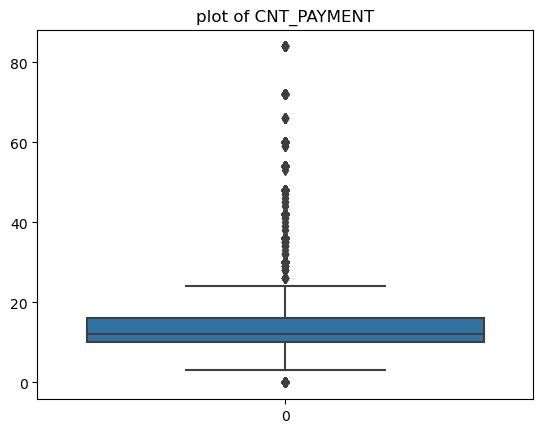

In [172]:
# plot boxplot to identify the presence of outliers in the dataset

for i in pre_num_cols:
    sns.boxplot(previous_appln[i])
    plt.title("plot of " + i)
    plt.show()

go through the box plots of each variable and check the outliers are present or not

we can easily identify the outlier by watching the box plot so here mentioning the variable names which have outliers  : 
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT'

# Univariate Analysis  

#### let's see distribution of numerical variables in the previous application data

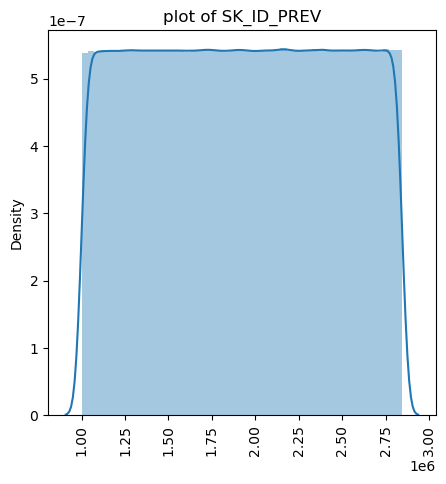

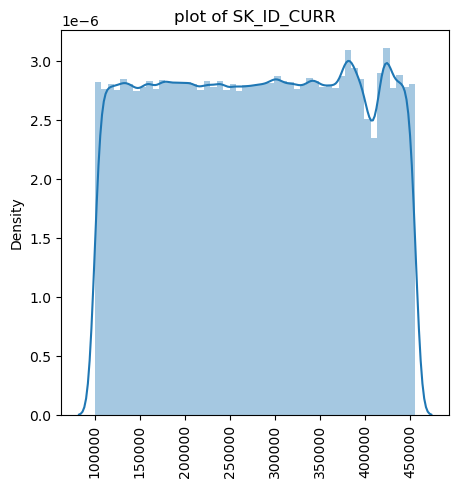

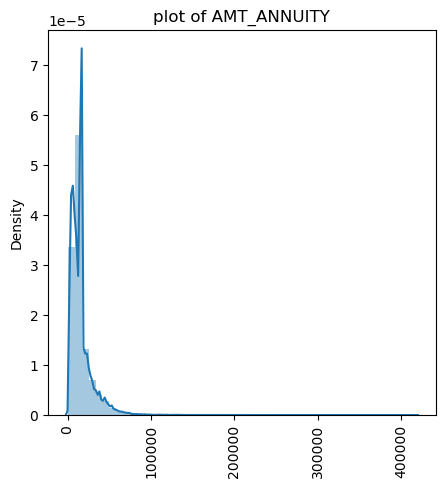

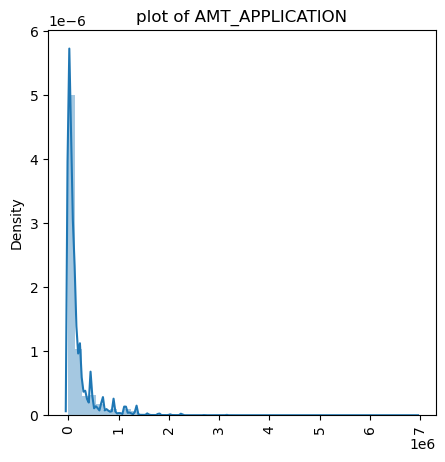

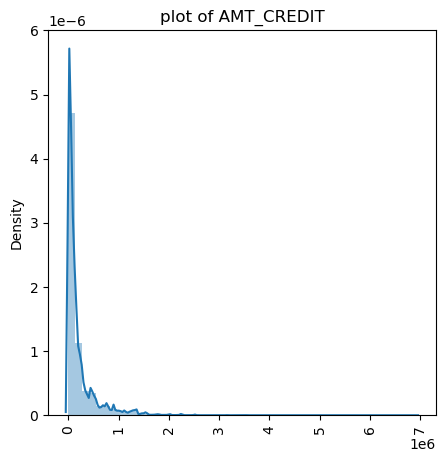

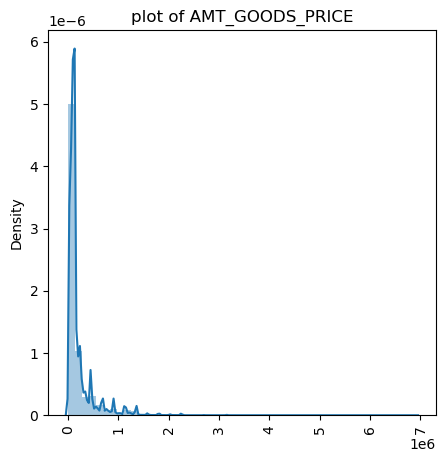

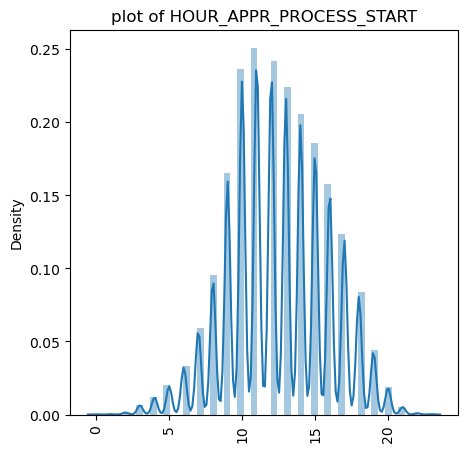

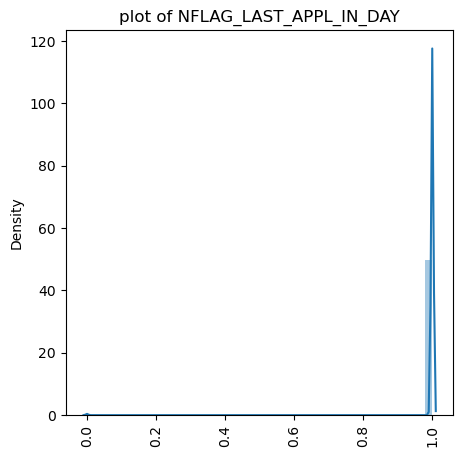

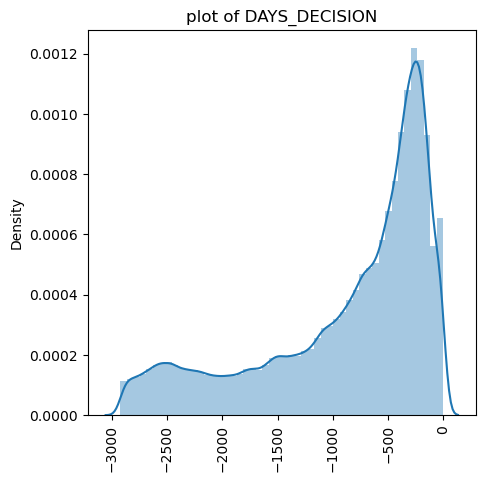

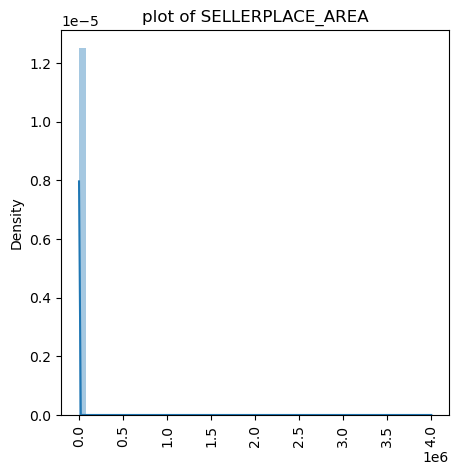

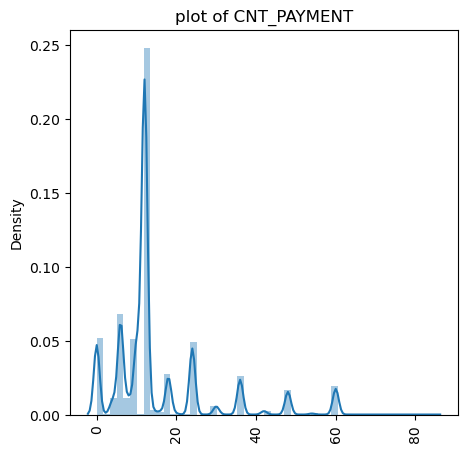

In [173]:
# plot dist plot to see distribution of numerical variables from previous application data

for i in pre_num_cols:
    plt.figure(figsize = (5,5))
    sns.distplot(previous_appln[[i]])
    plt.xticks(rotation = 90)
    plt.title("plot of " + i)
    plt.show()

here we can get insight that how data is distributed in which variables

Variables with Well Distribution : "SK_ID_PREV" , "SK_ID_CURR" , "HOUR_APPR_PROCESS_START"

Variables with Negative Distribution(left skewed data) : "NFLAG_LAST_APPL_IN_DAY" , "DAYS_DECISION"

Variables with Positive Distribution(right skewed data) : "AMT_ANNUITY" , "AMT_APPLICATION" , "AMT_CREDIT" , "AMT_GOODS_PRICE" , "SELLER_PLACE_AREA" , "CNT_PAYMENT"

#### let's see distribution of CATEGORICAL variables in the previous application data

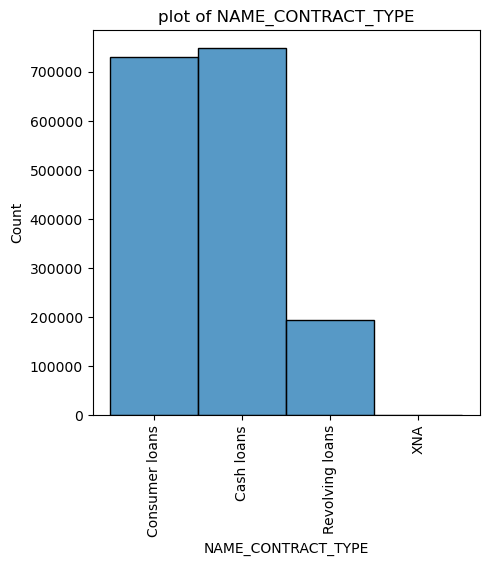

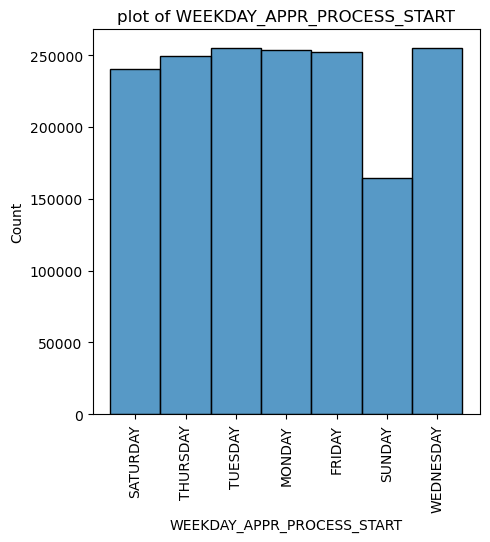

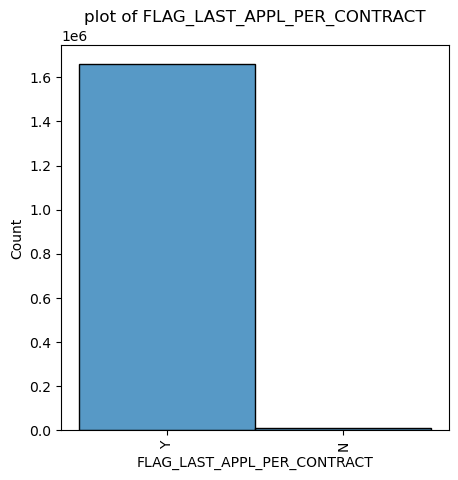

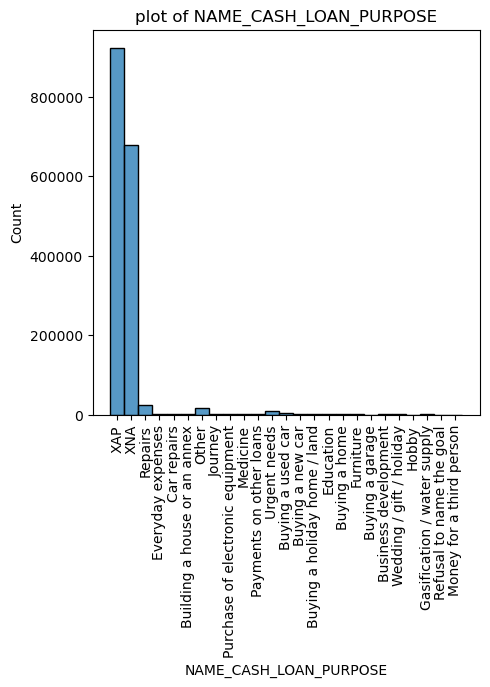

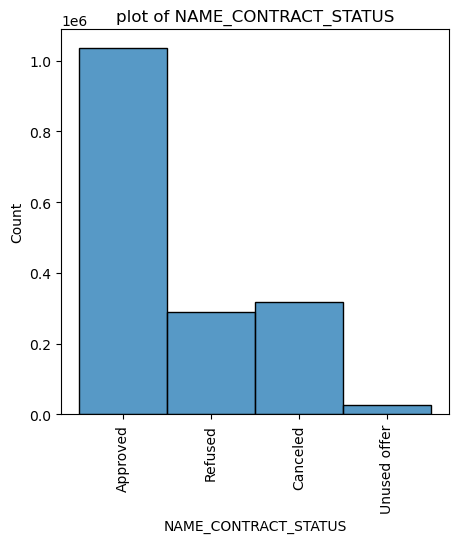

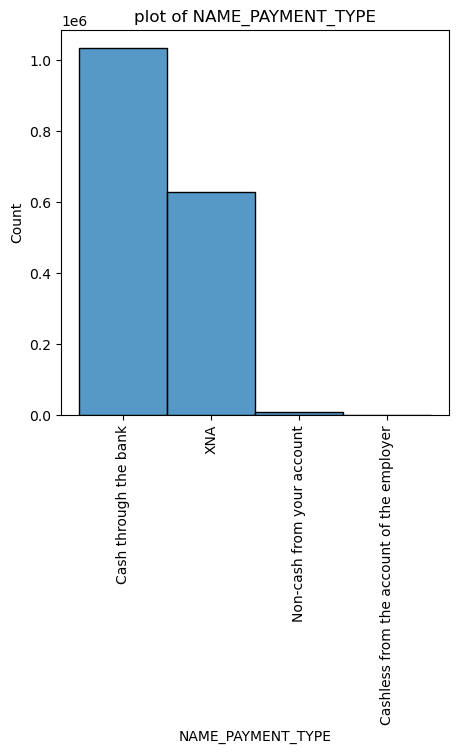

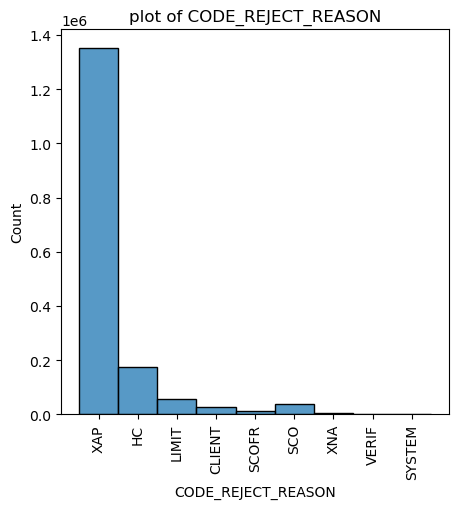

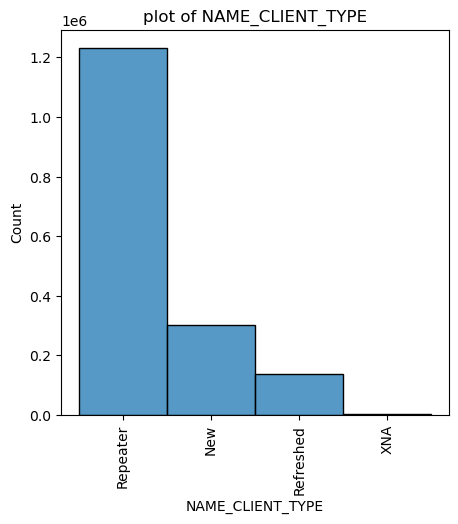

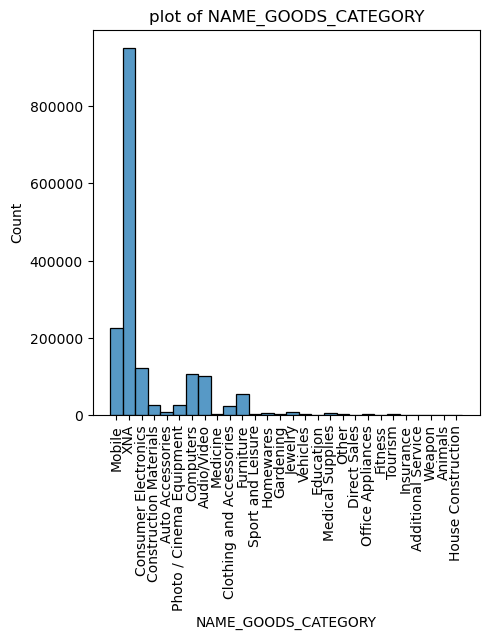

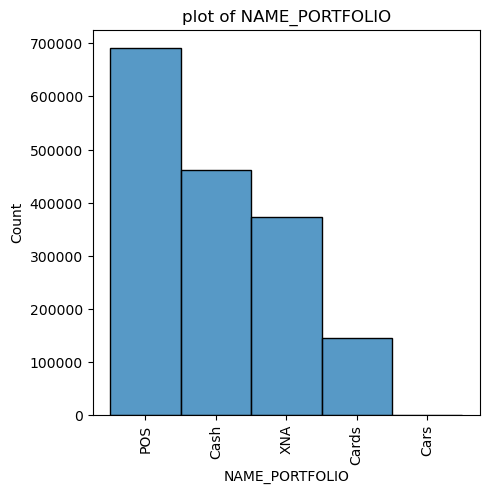

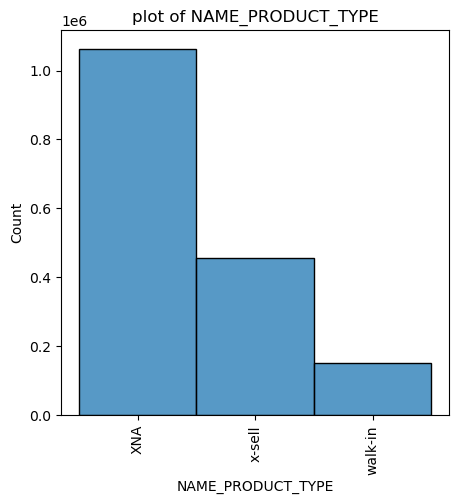

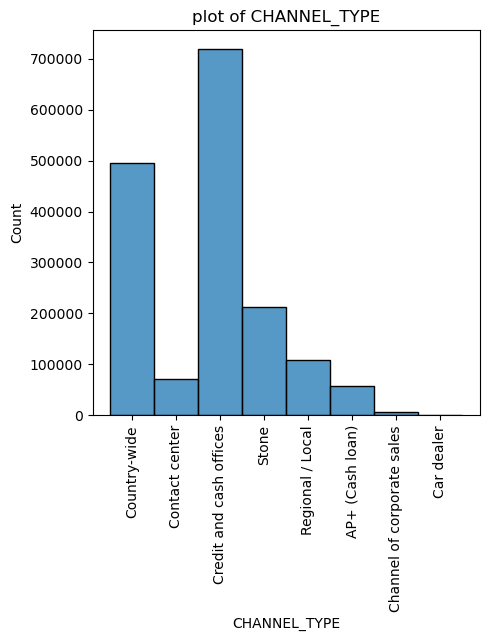

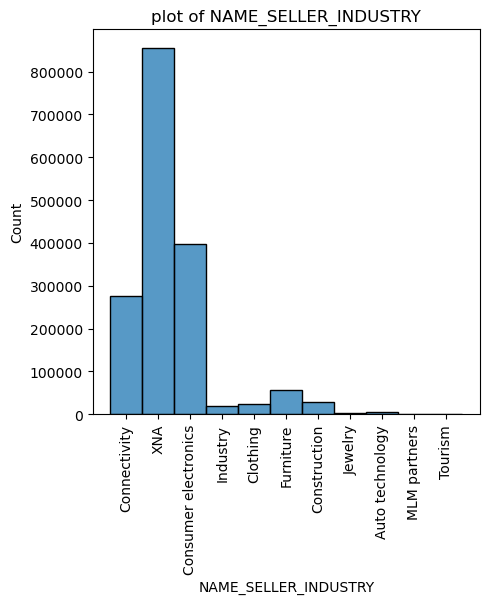

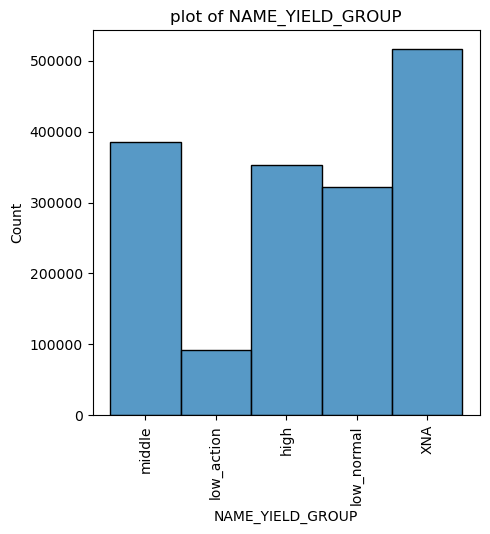

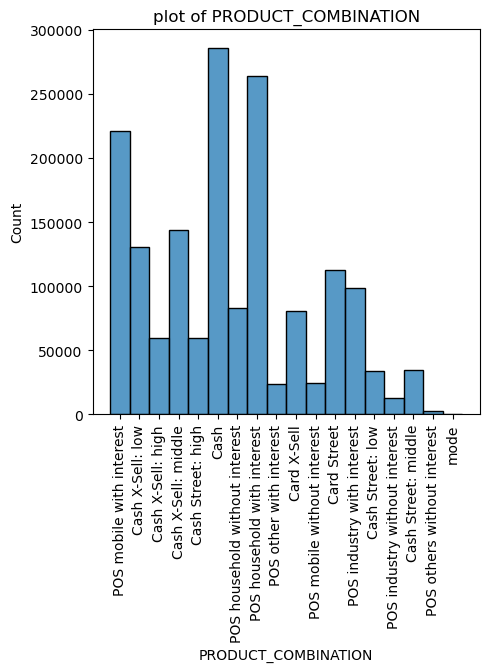

In [185]:
# plot histplots to see the distribution of categorical columns from previous application data

for i in pre_cat_cols:
    plt.figure(figsize = (5,5))
    sns.histplot(previous_appln[i])
    plt.xticks(rotation = 90)
    plt.title("plot of " + i)
    plt.show()

here we have XNA values in some variables so can consider them as missing records  

# Bivariate Analysis 

bivariate analysis of numerical and categorical variables with target variable NAME_CONTRACT_TYPE  from previous application data

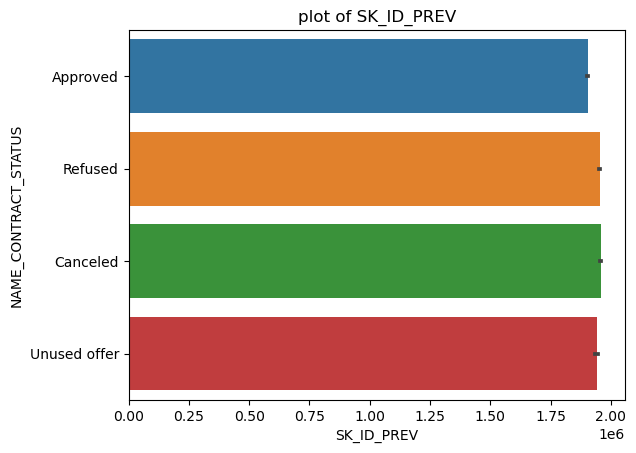

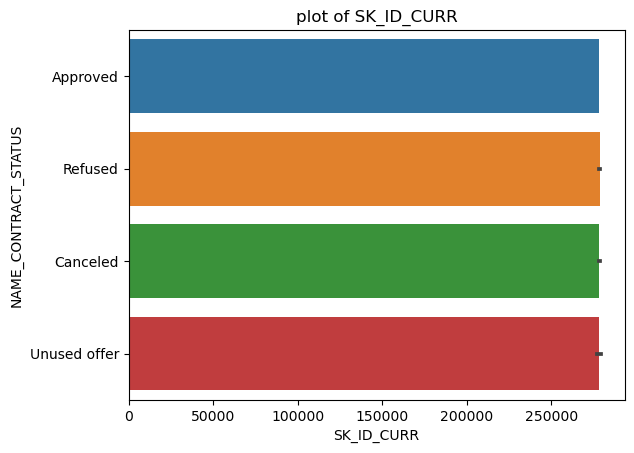

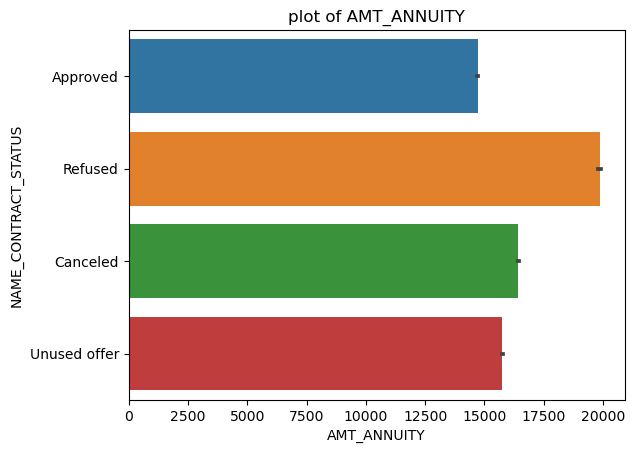

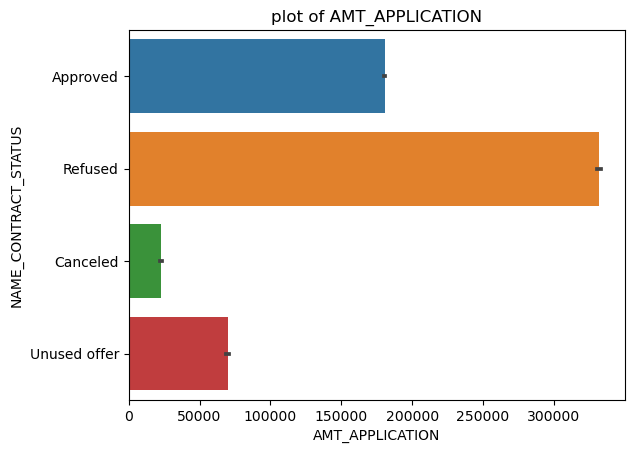

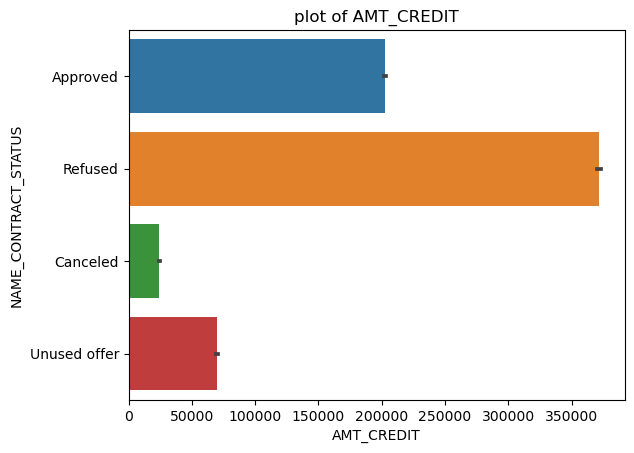

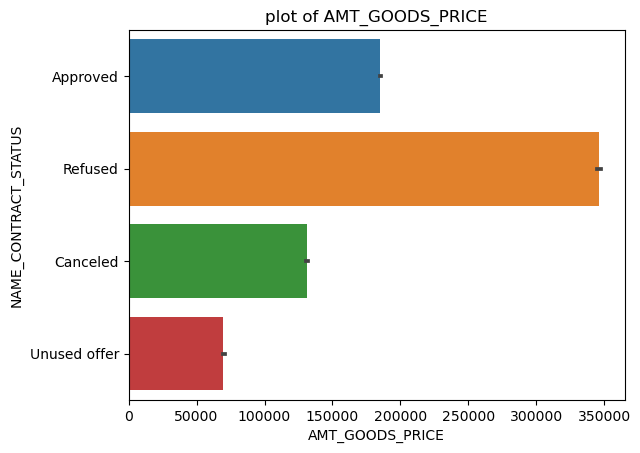

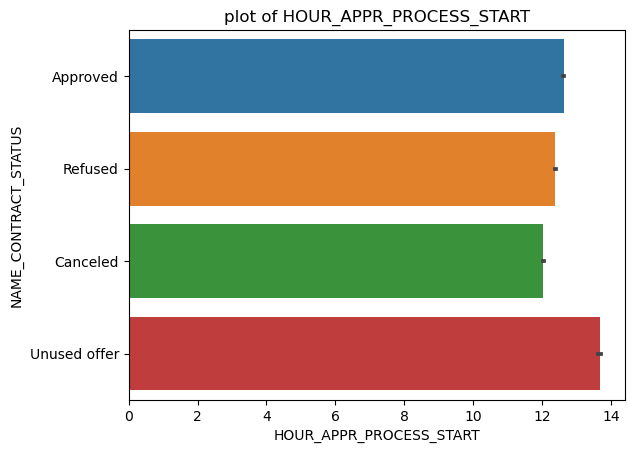

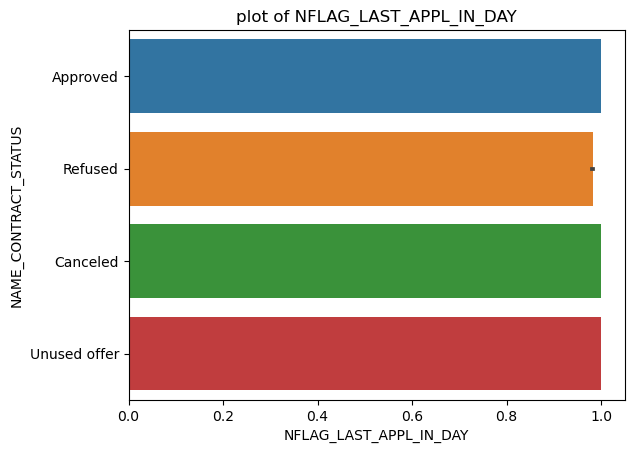

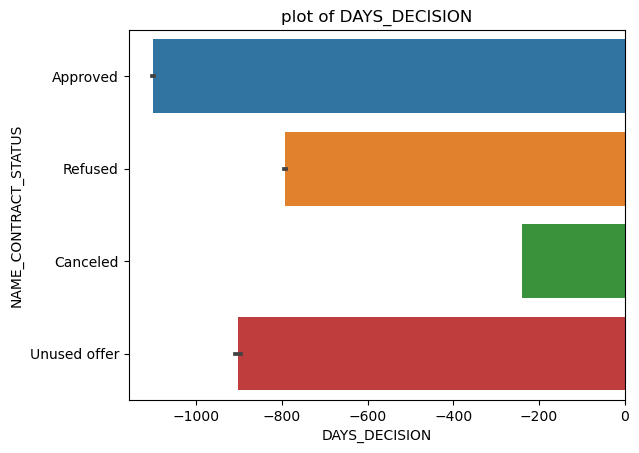

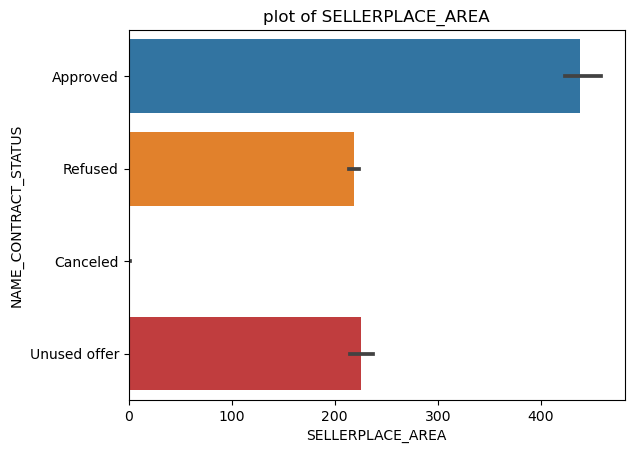

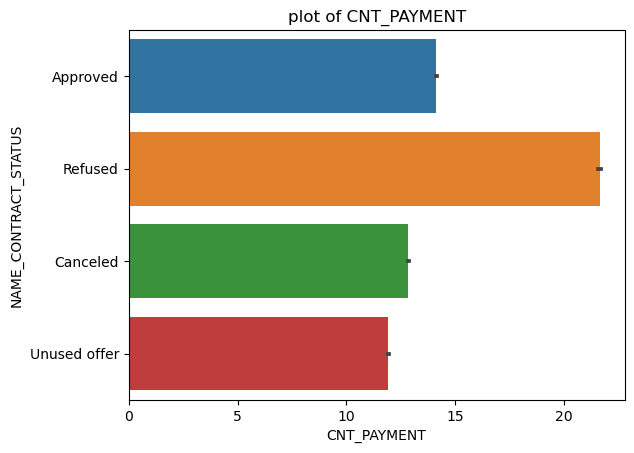

In [176]:
# plot barplot for numerical columns of previous application using for loop

for i in pre_num_cols:
    sns.barplot(data = previous_appln , x=previous_appln[i] , y=previous_appln.NAME_CONTRACT_STATUS)
    plt.title("plot of " + i)
    plt.xlabel(i)
    plt.ylabel("NAME_CONTRACT_STATUS")
    plt.show()

here we can eaaily see the distribution of application status with respect to the variables

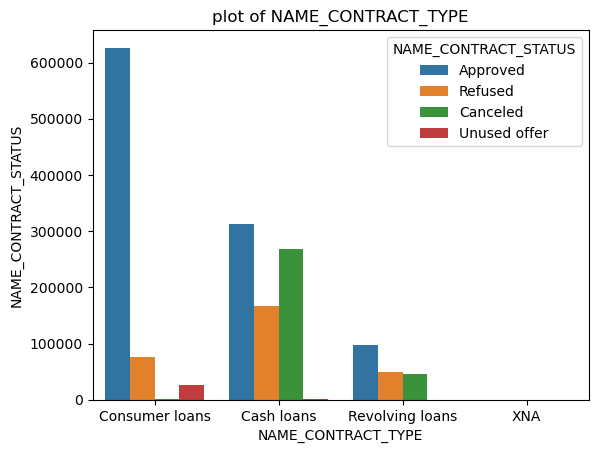

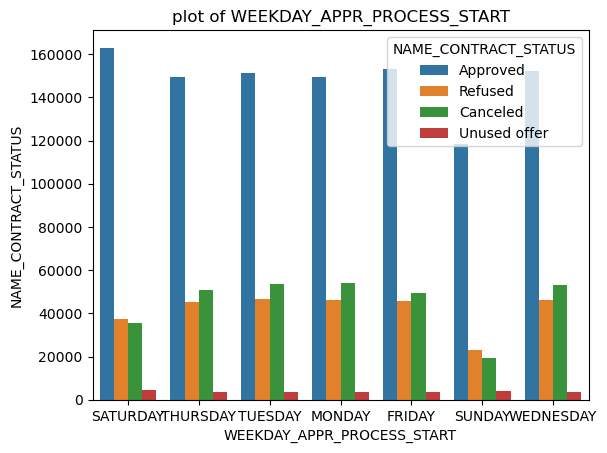

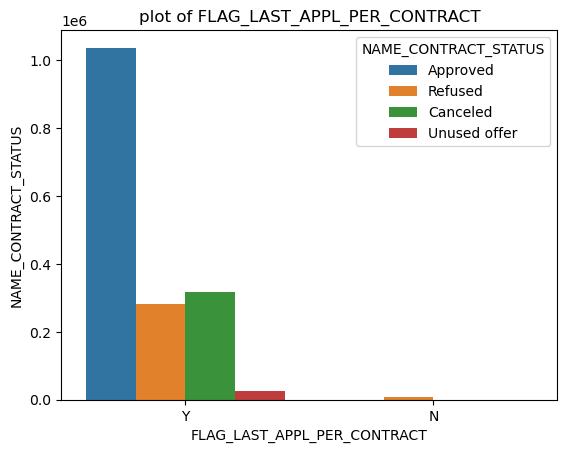

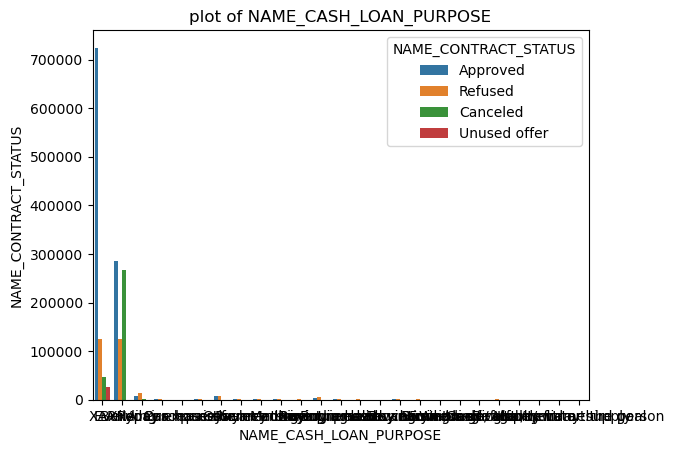

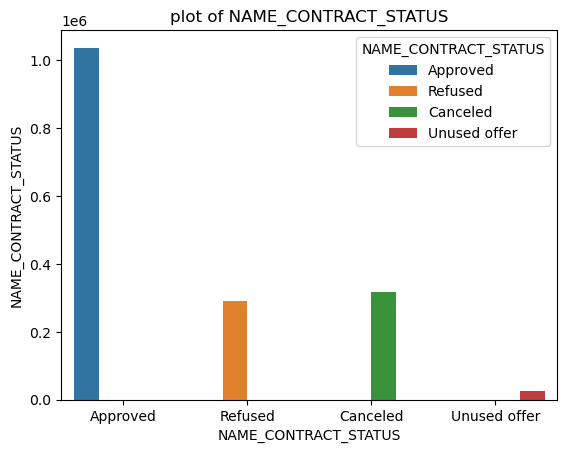

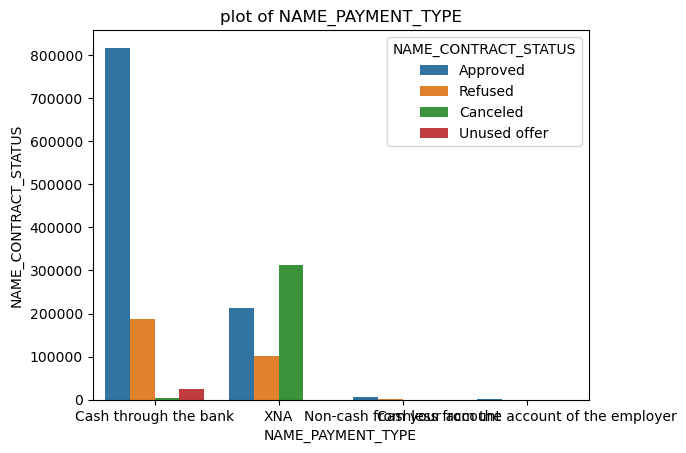

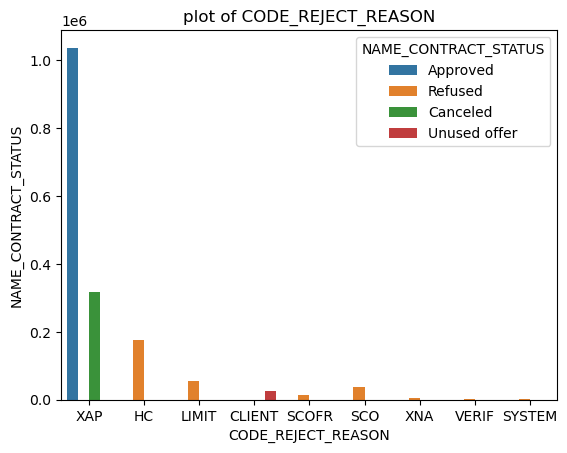

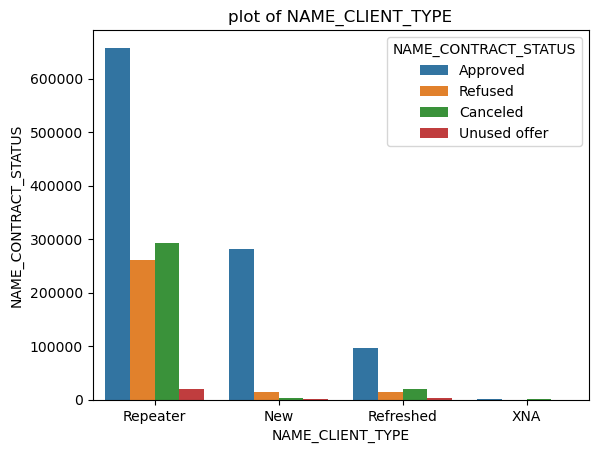

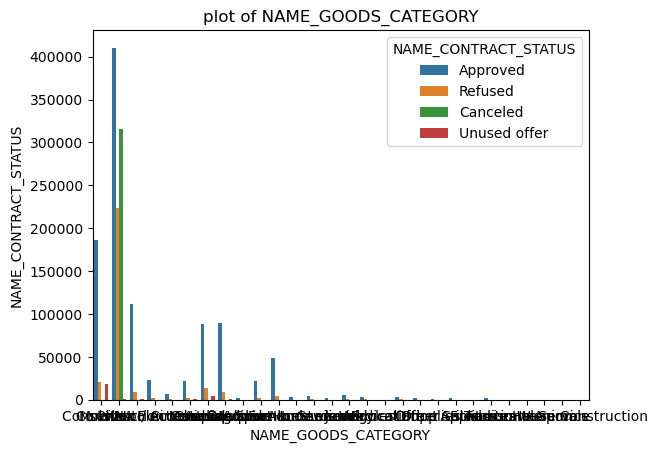

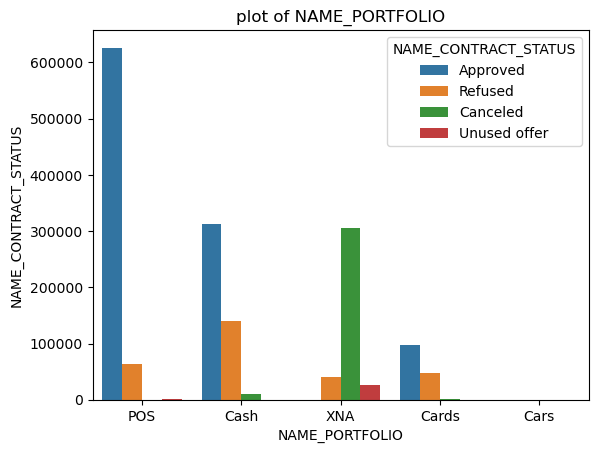

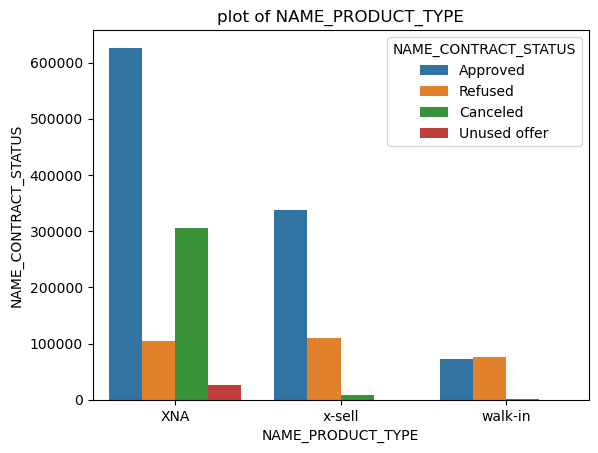

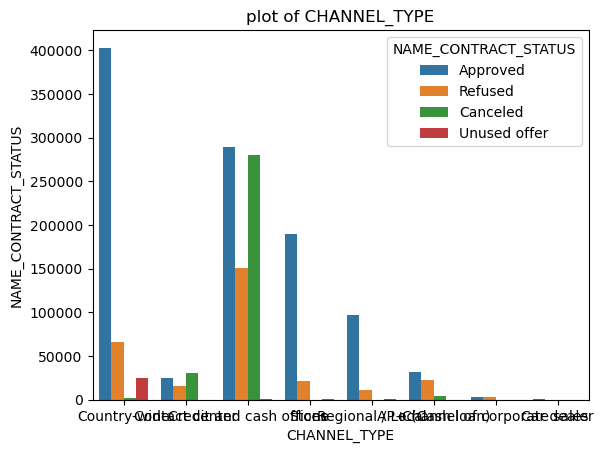

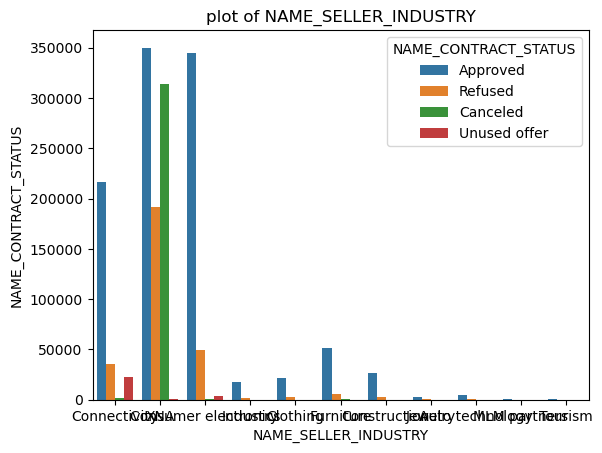

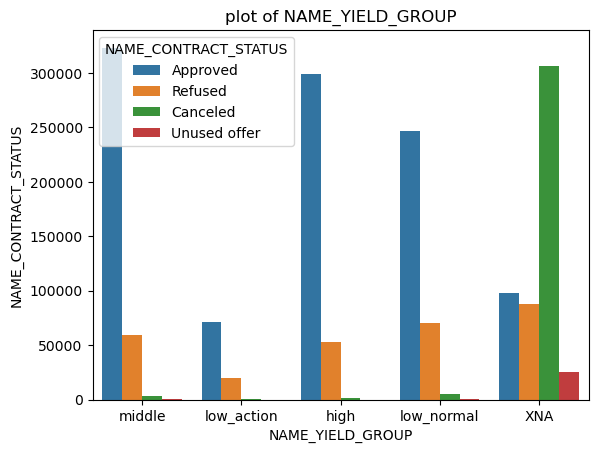

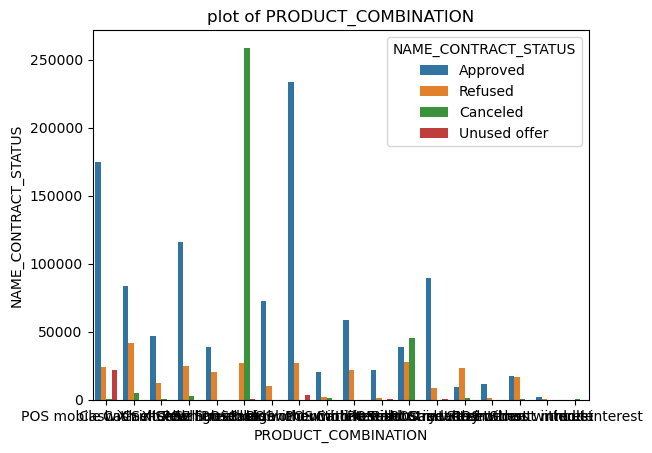

In [177]:
# plot countplot of categorical variables from previous application dataframe

for i in pre_cat_cols:
    sns.countplot(data = previous_appln , x = previous_appln[i] , hue= previous_appln.NAME_CONTRACT_STATUS)
    plt.title("plot of " + i)
    plt.xlabel(i)
    plt.ylabel("NAME_CONTRACT_STATUS")
    plt.show()

In [178]:
previous_appln.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved            -73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved           -164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved           -301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved           -512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high

### Merge Datasets 

In [179]:
# merge the application and previous application dataframe in df on the common column SK_ID_CURR

df = pd.merge(application , previous_appln , how = "inner" , left_on = "SK_ID_CURR" , right_on = "SK_ID_CURR" , copy = False)

In [180]:
# shape of merged df

df.shape

(1413638, 96)

In [181]:
application.shape

(307503, 71)

In [182]:
previous_appln.shape

(1670214, 26)

so the datasets has been merged successfully

In [183]:
# print first few rows of mergerd dataframe

df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
0      100002       1           Cash loans           M            N               Y             0          202500.0      406597.5        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                    WEDNESDAY                         10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                     SATURDAY                          9                           Y                       1                    XAP             Approved           -606                    XNA                XAP              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest
1      100003       0           Cash loans           F            N               N             0          270000.0     1293502.5        35698.5          1129500.0      

In [184]:
# print columns of merged dataframe

df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCU

## Correlation Between Variables

In [186]:
# calculate correlation of application dataframe

appln_corr = application.corr()

<Axes: >

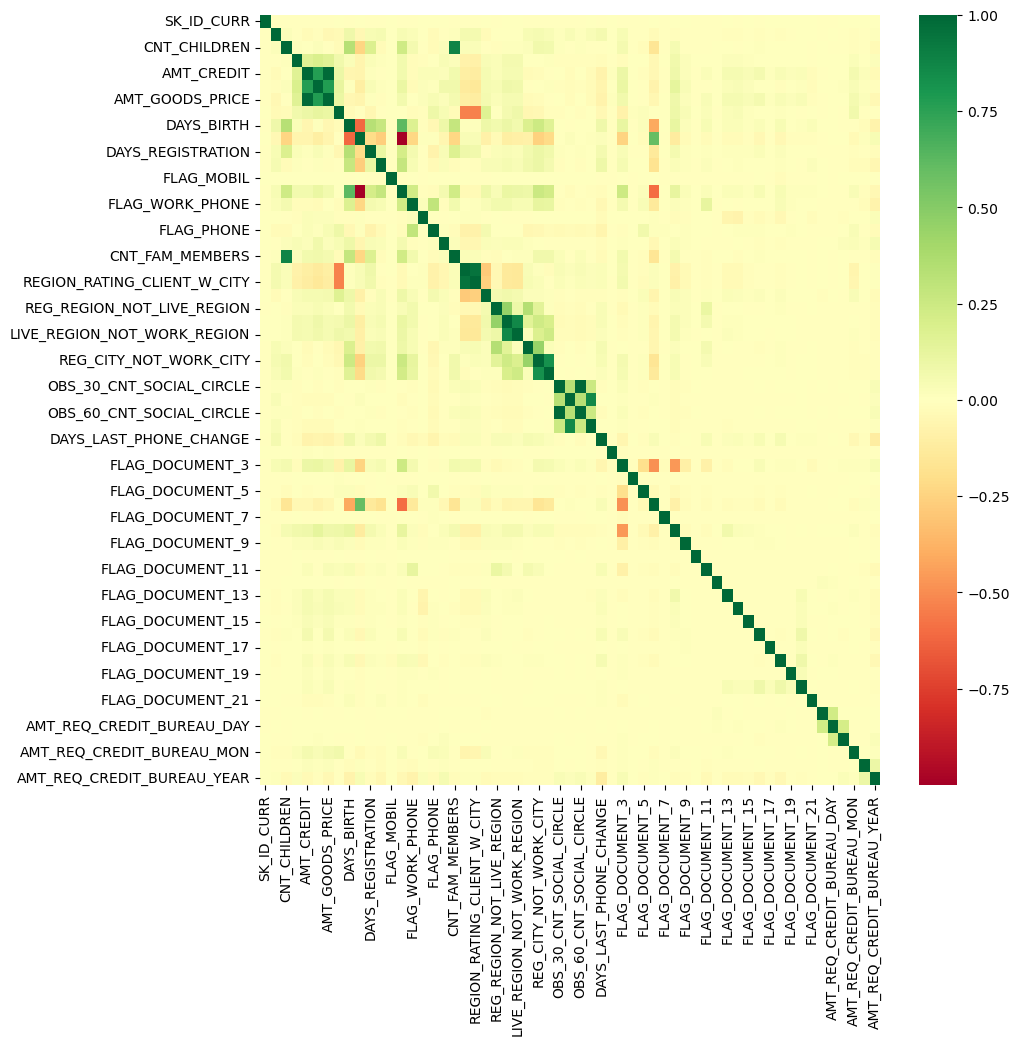

In [191]:
# plot heatmap to visualize correlation between variables of applocation data

f ,ax = plt.subplots(figsize = (10,10))

sns.heatmap(appln_corr ,ax = ax , cmap = "RdYlGn")

In [193]:
# calculate correlation of previous application

previous_appln_corr = previous_appln.corr()

<Axes: >

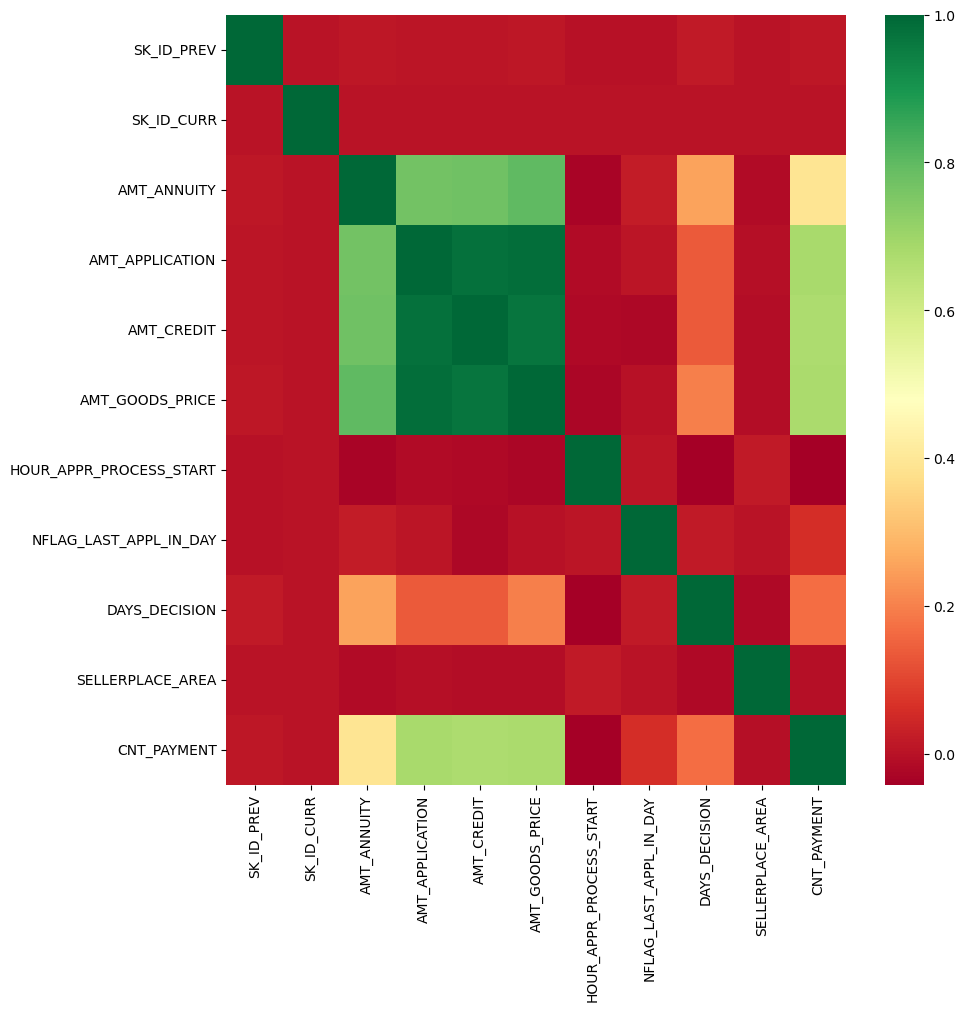

In [194]:
# plot heatmap to visualize correlation between variables of previous applocation data

f ,ax = plt.subplots(figsize = (10,10))

sns.heatmap(previous_appln_corr ,ax = ax , cmap = "RdYlGn")

In [195]:
df_corr = df.corr()

<Axes: >

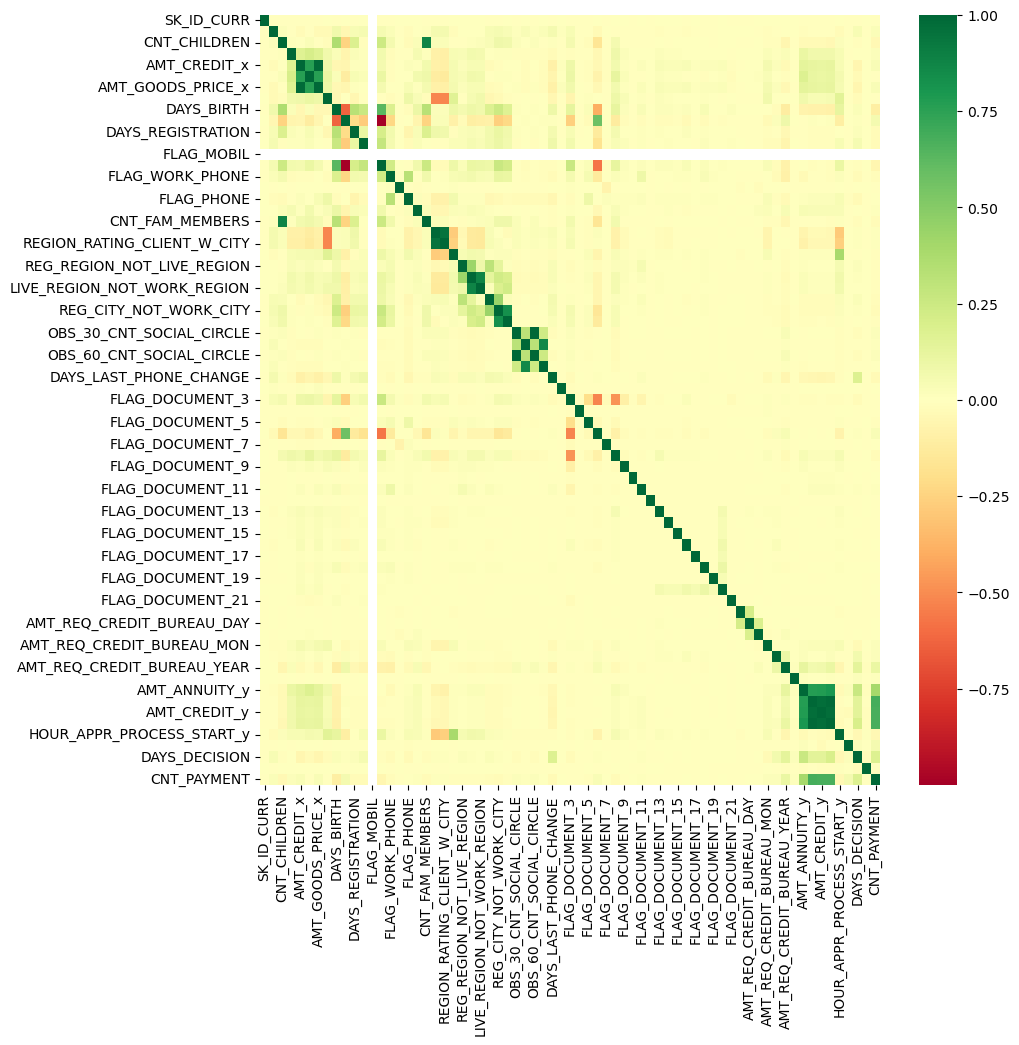

In [196]:
# plot heatmap to visualize correlation between variables of previous applocation data

f ,ax = plt.subplots(figsize = (10,10))

sns.heatmap(df_corr ,ax = ax , cmap = "RdYlGn")